# House Prices: 

This project was completed as a part of Kaggle competition 'House Prices'. 

In this project, we've uncleaned data, we will clean it and do feature engineering, then we will use data in train file to creat regression model, evaluate the performance of the model and use it to predict prices for data in test file. 

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew
from math import ceil
from scipy.stats import skewtest
from scipy.stats import norm
from scipy import stats
import scipy.stats as ss


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
train = pd.read_csv('train.csv') 
print('training data consists of {} rows and {} columns'.format(train.shape[0], train.shape[1]))
train.head()

training data consists of 1460 rows and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('test.csv')
print('testing data consists of {} rows and {} columns'.format(test.shape[0], test.shape[1]))
test.head()

testing data consists of 1459 rows and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Note** that we have 80 features for each training and testing data, training data has extra column (the SalePrice column), which in this dataset is the dependent variable we are trying to predict.

In [4]:
print('first id in training data is {}, and last one is {}'.format(train['Id'].min(), train['Id'].max()))
print('first id in testing data is {}, and last one is {}'.format(test['Id'].min(), test['Id'].max()))
print('there is {} duplicates in data'.format(((train.shape[0]+ test.shape[0]) - 
                                                (train['Id'].unique().shape[0] + test['Id'].unique().shape[0]))))

first id in training data is 1, and last one is 1460
first id in testing data is 1461, and last one is 2919
there is 0 duplicates in data


now we will drop price column, we will combine the training and testing data to perform analysis on both data sets at once, then split the data when we are ready to train the model.

In [5]:
all_data = pd.concat([train.drop(['SalePrice'], axis=1), test], ignore_index=True)
all_data.set_index('Id', inplace=True)
print(all_data.shape)
all_data.head()

(2919, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Now we will check columns with missing values then decide how we will fill them. 

In [6]:
for col in all_data.columns:
    if all_data[col].isnull().any():
        print(col, all_data[col].isnull().sum())

MSZoning 4
LotFrontage 486
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
MasVnrArea 23
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1


we will drop any column has more than 1000 missing values.

In [7]:
cols_before_drop = all_data.shape[1]

for col in all_data.columns:
    if all_data[col].isnull().sum() > 1000:
        all_data.drop(col, axis=1, inplace=True)

cols_after_drop = all_data.shape[1]

print('we have dropped {} columns, now data consists of {} rows and {} columns'.format((cols_before_drop - cols_after_drop),
                                                                                        all_data.shape[0],
                                                                                        all_data.shape[1]))

we have dropped 5 columns, now data consists of 2919 rows and 74 columns


In [8]:
for col in all_data.columns:
    if all_data[col].isnull().any():
        print(col, all_data[col].isnull().sum())

MSZoning 4
LotFrontage 486
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
MasVnrArea 23
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
SaleType 1


In [9]:
all_data[all_data['GarageYrBlt'] == all_data['YearBuilt']].shape[0]

2216

In [10]:
all_data[all_data['YearRemodAdd'] == all_data['YearBuilt']].shape[0]

1560

## Note 
most dada points have same date for *YearBuilt*, *YearRemodAdd* and *GarageYrBlt* and that makes sense, so will keep just *YearBuilt* column.

In [11]:
all_data.drop(['GarageYrBlt', 'YearRemodAdd'], axis=1, inplace=True)

In [12]:
all_data.loc[all_data['GarageCond'].isnull(), 
             ['GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,
40,NaN,NaN,0.0,0.0,NaN,NaN
49,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,0.0,0.0,NaN,NaN
90,NaN,NaN,0.0,0.0,NaN,NaN
100,NaN,NaN,0.0,0.0,NaN,NaN
109,NaN,NaN,0.0,0.0,NaN,NaN
126,NaN,NaN,0.0,0.0,NaN,NaN
128,NaN,NaN,0.0,0.0,NaN,NaN


we notice that all garage columns with missing values have zero area so they didn't have garage, except 2 rows which have garage type detached,so we will fill those 2 rows with mode values for categorical columns and the mean for garage area, and we will fill other rows with 'None'.

In [13]:
all_data.loc[all_data['GarageType'] == 'Detchd',
             ['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']].mode()

,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond
0,Detchd,Unf,2.0,TA,TA


In [14]:
all_data.loc[all_data['GarageType'] == 'Detchd', :] = \
all_data.loc[all_data['GarageType'] == 'Detchd', :].fillna({'GarageCond':'TA', 'GarageFinish': 'Unf', 'GarageQual':'TA'})

all_data.loc[all_data['GarageType'] == 'Detchd', :] = \
all_data.loc[all_data['GarageType'] == 'Detchd', :].fillna({'GarageCars':2,
                                                            'GarageArea': ceil(all_data.loc[all_data['GarageType'] == 'Detchd', 'GarageArea'].mean())})
all_data.loc[:, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = \
all_data.loc[:, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

In [15]:
all_data.loc[all_data['BsmtExposure'].isnull(), 
             ['BsmtFinType1', 'BsmtFinSF1', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
              'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinType1,BsmtFinSF1,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual,BsmtCond,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
40,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
91,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
103,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
157,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
183,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
260,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
343,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0
363,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0


**Note** that missing values for columns related to basement means there's no basement, except some rows have missing value for 
`BsmtExposure` (Refers to walkout or garden level walls) and all of them have unfinished basement so we will fill them with most frequent value.

In [16]:
BsmtExposure_mode = all_data.loc[all_data['BsmtFinType1'] == 'Unf','BsmtExposure'].mode()
all_data.loc[all_data['BsmtFinType1'] == 'Unf', 'BsmtExposure'] = \
all_data.loc[all_data['BsmtFinType1'] == 'Unf', 'BsmtFinType1'].fillna(BsmtExposure_mode)
all_data.loc[:, ['BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']] = \
all_data.loc[:, ['BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond']].fillna('None')
all_data.loc[:, ['BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']] = \
all_data.loc[:, ['BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']].fillna(0)

for `LotFrontage` column (Linear feet of street connected to property) we will fill missing values with median Lotfrontage value for all building in the same neighborhood.

In [17]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for missing values in `MasVnrType` (Masonry veneer type) and `MasVnrArea` (Masonry veneer area), we will suppose that it has no Masonry veneer so we will fill them with 'None' and 0.

In [18]:
all_data.fillna({'MasVnrType': 'None', 'MasVnrArea': 0}, inplace=True)

In [19]:
all_data.loc[all_data['BsmtFullBath'].isnull(), ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinType1']]

,BsmtFullBath,BsmtHalfBath,BsmtFinType1
Id,,,
2121,NaN,NaN,None
2189,NaN,NaN,None


missing values in basement bathrooms columns have no basement, so we will fill them with 0.

In [20]:
all_data.fillna({'BsmtFullBath': 0, 'BsmtHalfBath': 0}, inplace=True)

for rest columns with missing values it seems reasonable choice to fill them with mode value for this column.

In [21]:
for col in all_data.columns:
    if all_data[col].isnull().any():
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)

now after cleaning our data from missing values we will choose features based on their relations with each other\SalePrice, so we will add sale price column. 

first we will check if there's any outliers:

In [22]:
train.set_index('Id', inplace=True)
all_data['SalePrice'] = train['SalePrice']


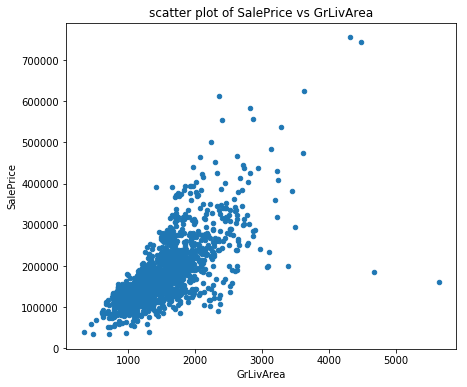

In [23]:
def scatter_plot(dataset, cols, y_col='SalePrice', alpha=1.0):
    for col in cols:
        figure = plt.figure(figsize=(7, 6))
        ax = figure.gca()
        dataset.plot.scatter(x=col, y=y_col, ax=ax, alpha=alpha)
        ax.set_title('scatter plot of ' + y_col + ' vs ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel(y_col)
        plt.show()

        
scatter_plot(all_data, ['GrLivArea'])

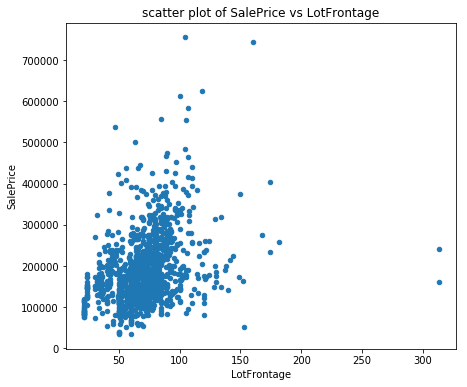

In [24]:
scatter_plot(all_data, ['LotFrontage'])

scatter plots suggest that data points with `GrLivArea` (Above ground living area ) bigger than 4000 and price less than 300000, or `LotFrontage` (Linear feet of street connected to property) > 300, is an outlier so we will remove this points.

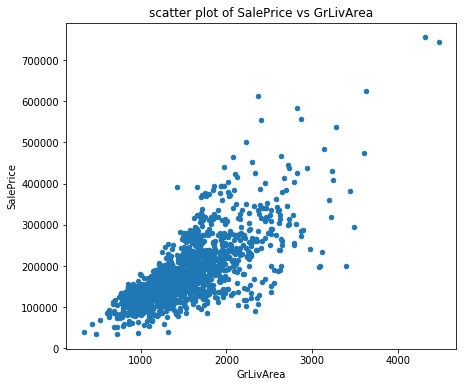

In [25]:
all_data = all_data.drop(all_data[(all_data['GrLivArea']>4000) & (all_data['SalePrice']<300000)].index)
scatter_plot(all_data, ['GrLivArea'])

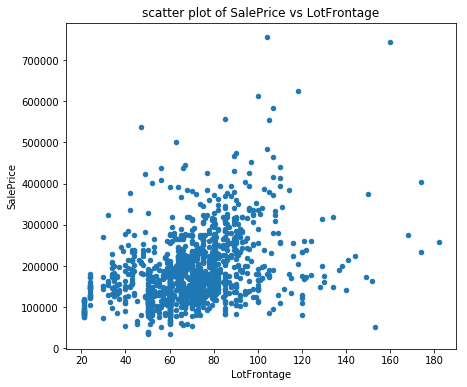

In [26]:
all_data = all_data.drop(all_data[all_data['LotFrontage']>300].index)
scatter_plot(all_data, ['LotFrontage'])

In [27]:
#check data types:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


there's some categorical features has numerical values so we will convert it's type to be object.

In [28]:
all_data.MSSubClass = all_data.MSSubClass.astype('object')
all_data.OverallQual = all_data.OverallQual.astype('object')
all_data.OverallCond = all_data.OverallCond.astype('object')
all_data.GarageCars = all_data.GarageCars.astype('object')
all_data.Fireplaces = all_data.Fireplaces.astype('object')
all_data.BedroomAbvGr = all_data.BedroomAbvGr.astype('object')
all_data.KitchenAbvGr = all_data.KitchenAbvGr.astype('object')
all_data.BsmtFullBath = all_data.BsmtFullBath.astype('object')
all_data.BsmtHalfBath = all_data.BsmtHalfBath.astype('object')
all_data.FullBath = all_data.FullBath.astype('object')
all_data.HalfBath = all_data.HalfBath.astype('object')
all_data.YearBuilt = all_data.YearBuilt.astype('object')


we will use heat map to figure out the correlation between numeric values and label 'SalePrice'.

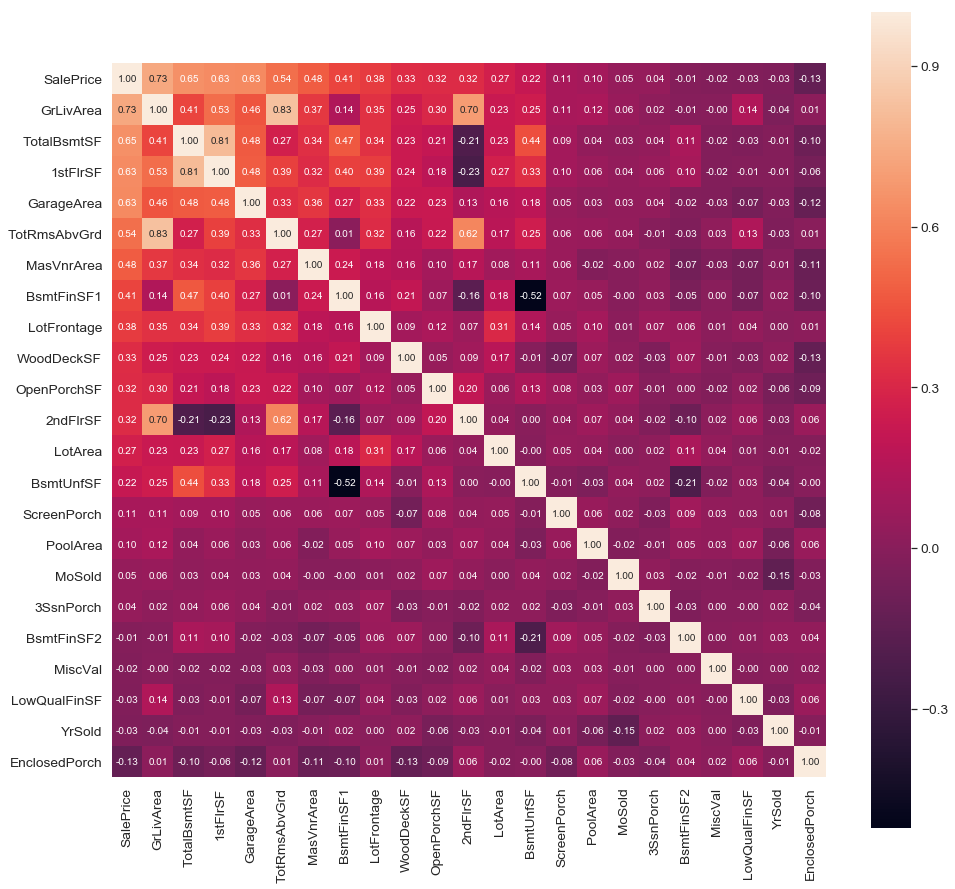

In [29]:
plt.figure(figsize=(16,15))
corrmat = all_data.loc[:1460, :].corr()
cols = corrmat.nlargest(len(all_data.columns), 'SalePrice')['SalePrice'].index
cm = np.corrcoef(all_data.loc[:1460, cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Note** for correlation:

- 0 to 0.1 is trivial 

- 0.1 to 0.3 is small

- 0.3 to 0.5 is medium

- bigger than 0.5 is large

based on this , we will keep feature if it has a medium or large correlation with SalePrice and small or trivial correlation with other features.

In [30]:
all_data.drop(['EnclosedPorch', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtFinSF2', '3SsnPorch',
               'MoSold', 'PoolArea', 'ScreenPorch', 'BsmtUnfSF', 'LotArea', '2ndFlrSF',
               '1stFlrSF', 'TotRmsAbvGrd', 'BsmtFinSF1', 'GarageArea', 'OpenPorchSF', 'LotFrontage',
               'MasVnrArea', 'WoodDeckSF'], axis=1, inplace=True)

now we will check the distribution for the numeric features that we've by now, we will use descriptive statistics and histograms.

TotalBsmtSF 
 count    1457.000000
mean     1052.857927
std       414.943813
min         0.000000
25%       796.000000
50%       991.000000
75%      1297.000000
max      3206.000000
Name: TotalBsmtSF, dtype: float64


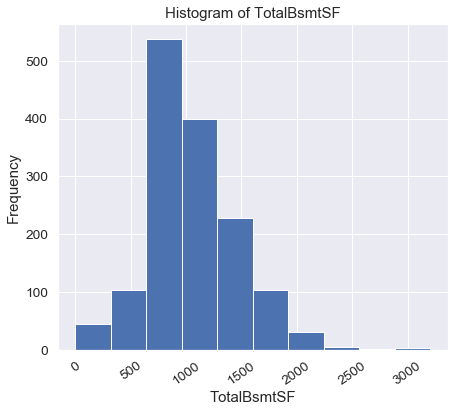

GrLivArea 
 count    1457.000000
mean     1510.082361
std       507.841835
min       334.000000
25%      1128.000000
50%      1459.000000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64


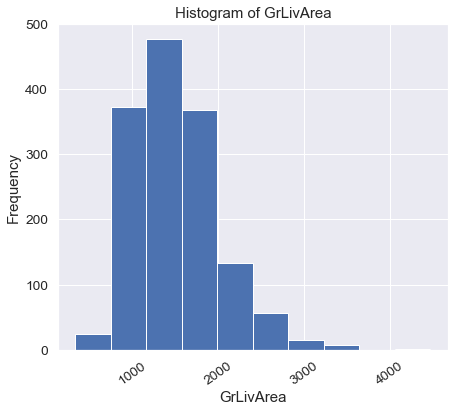

SalePrice 
 count      1457.000000
mean     180891.006177
std       79506.233040
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


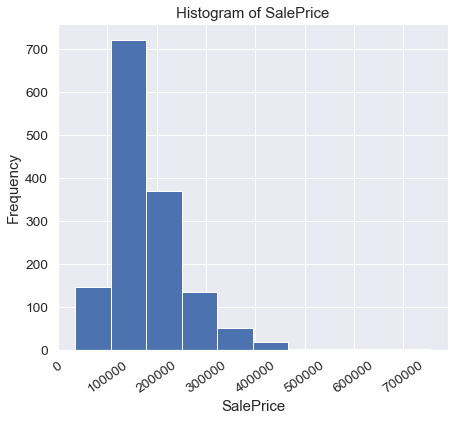

In [31]:
num_cols = all_data.select_dtypes(exclude='object').columns

def plot_hist(dataset, cols, bins=10):
    for col in cols:
        print(col , '\n' , dataset[col].describe())
        figure = plt.figure(figsize=(7, 6))
        ax = figure.gca()
        dataset[col].plot.hist(ax=ax, bins=bins)
        ax.set_title('Histogram of '+col)
        ax.set_xlabel(col)
        plt.xticks(rotation=35)
        plt.show()
        
plot_hist(all_data.loc[:1460, :], num_cols)

* we can notice that our featuters have fairly positive skewness, so we will use log transformation to make our data more normally distriputed, for *TotalBsmtSF* it has zero values so we will apply transformation on just non zero values.


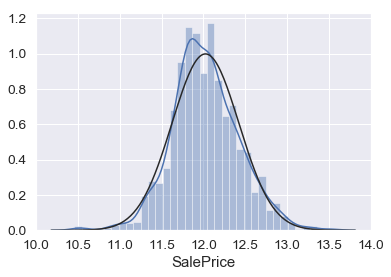

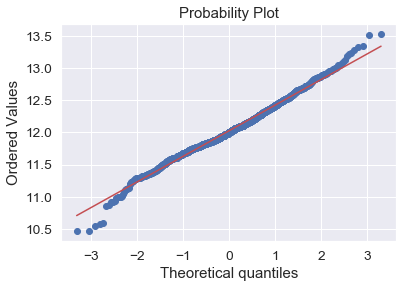

In [32]:
all_data[:1457]['SalePrice'] = all_data[:1457]['SalePrice'].apply(lambda x: np.log1p(x))
sns.distplot(all_data[:1457]['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data[:1457]['SalePrice'], plot=plt)


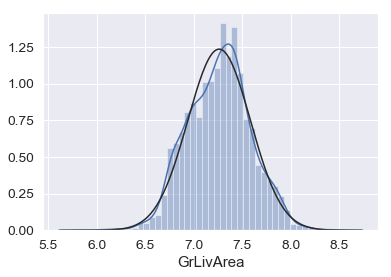

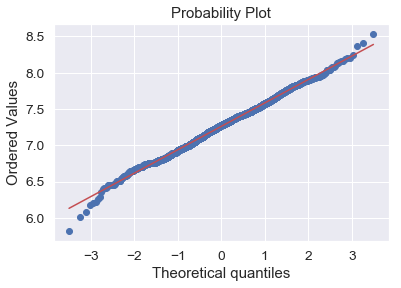

In [33]:
all_data['GrLivArea'] = all_data['GrLivArea'].apply(lambda x: np.log1p(x))
sns.distplot(all_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['GrLivArea'], plot=plt)


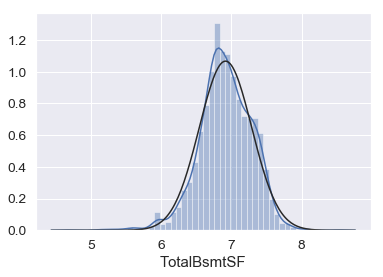

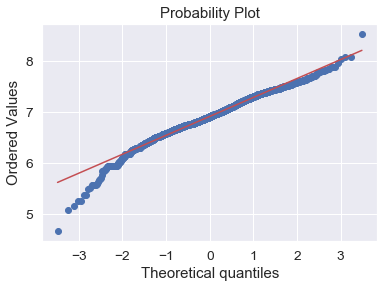

In [34]:
all_data.loc[all_data['TotalBsmtSF'] > 0, 'TotalBsmtSF'] = all_data.loc[all_data['TotalBsmtSF'] > 0, 
                                                                        'TotalBsmtSF'].apply(lambda x: np.log1p(x))

sns.distplot(all_data[all_data['TotalBsmtSF']> 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(all_data[all_data['TotalBsmtSF']> 0]['TotalBsmtSF'], plot=plt)


* now we will explore our categorical features, we will use box plots for relations with Sale Price, and bar plot to see its distribution.

In [35]:
def plot_bars(dataset, cols):
    for col in cols:
        figure = plt.figure(figsize=(15,20))
        ax = figure.gca()
        counts = dataset[col].value_counts()
        counts.plot.barh(ax=ax, color='blue')
        ax.set_title(col)
        ax.set_xlabel(col)
        plt.show()

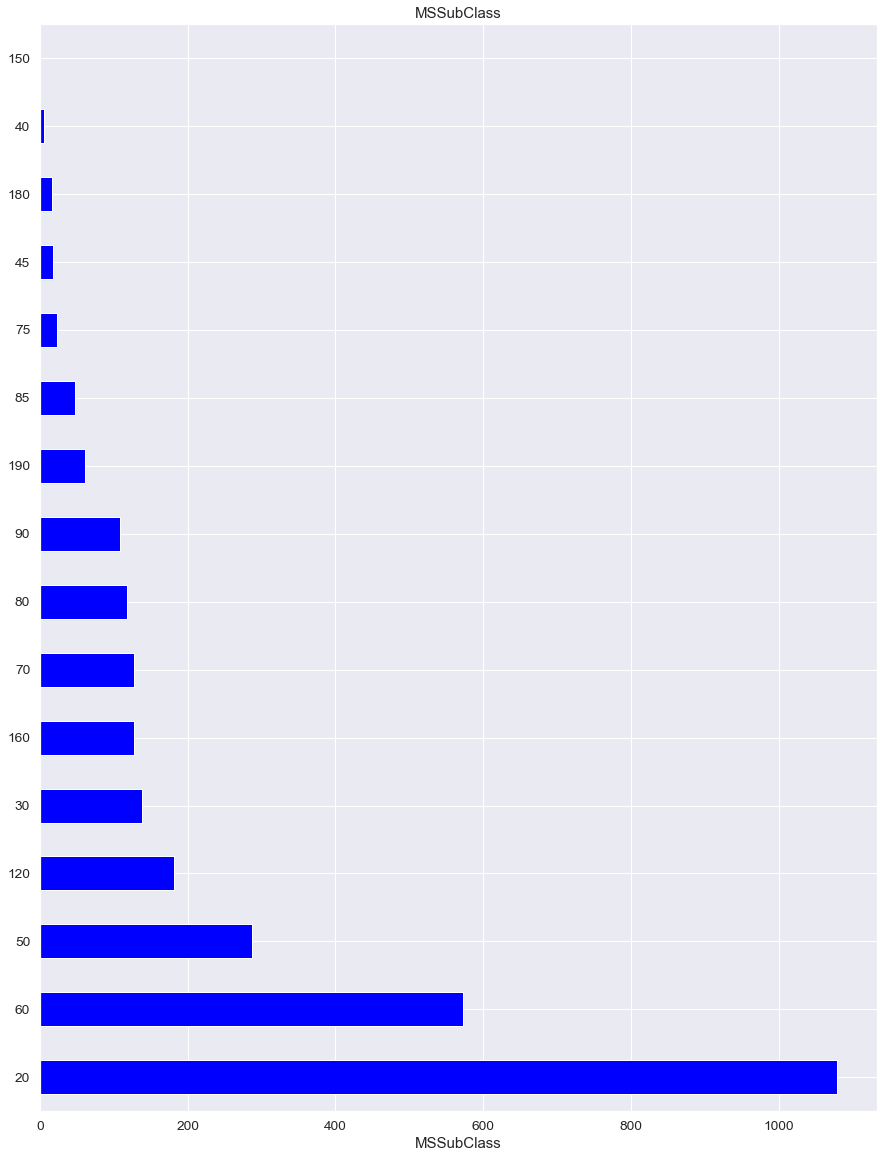

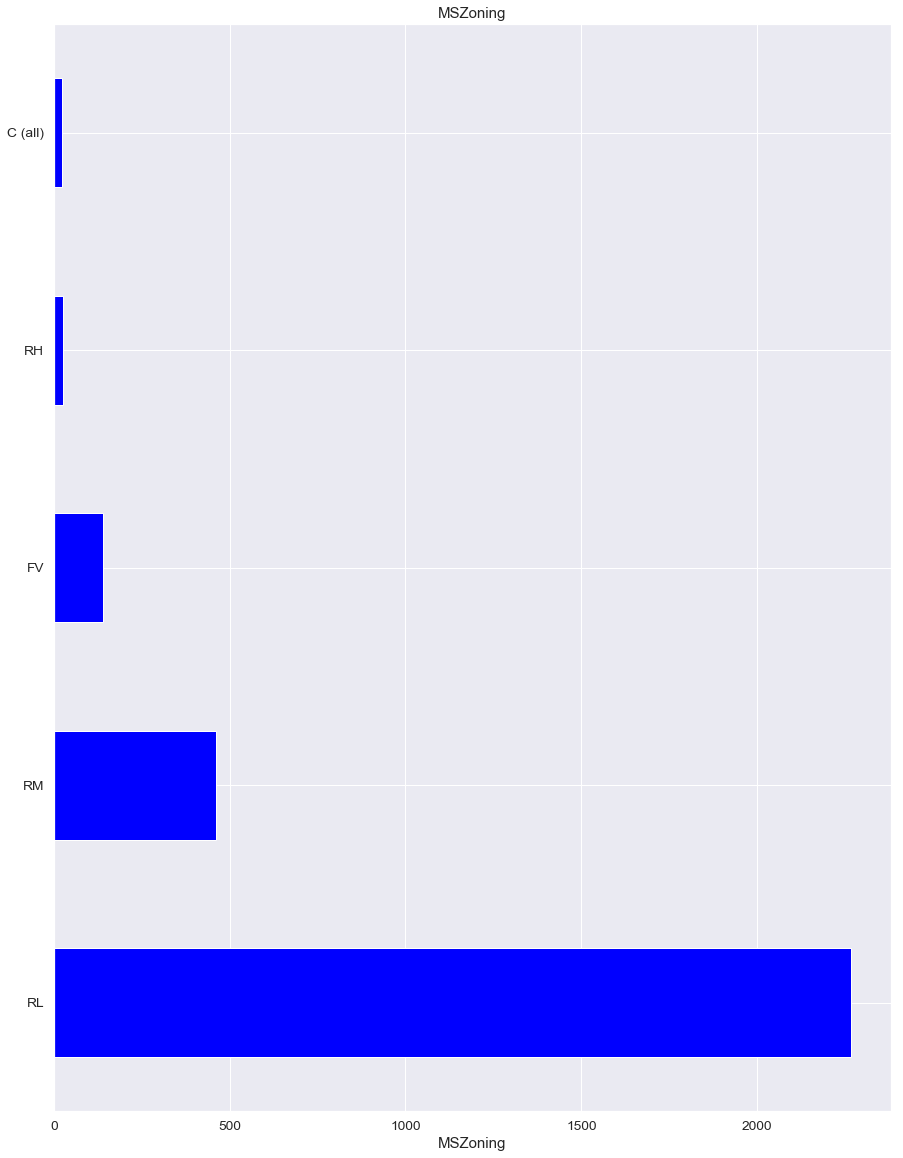

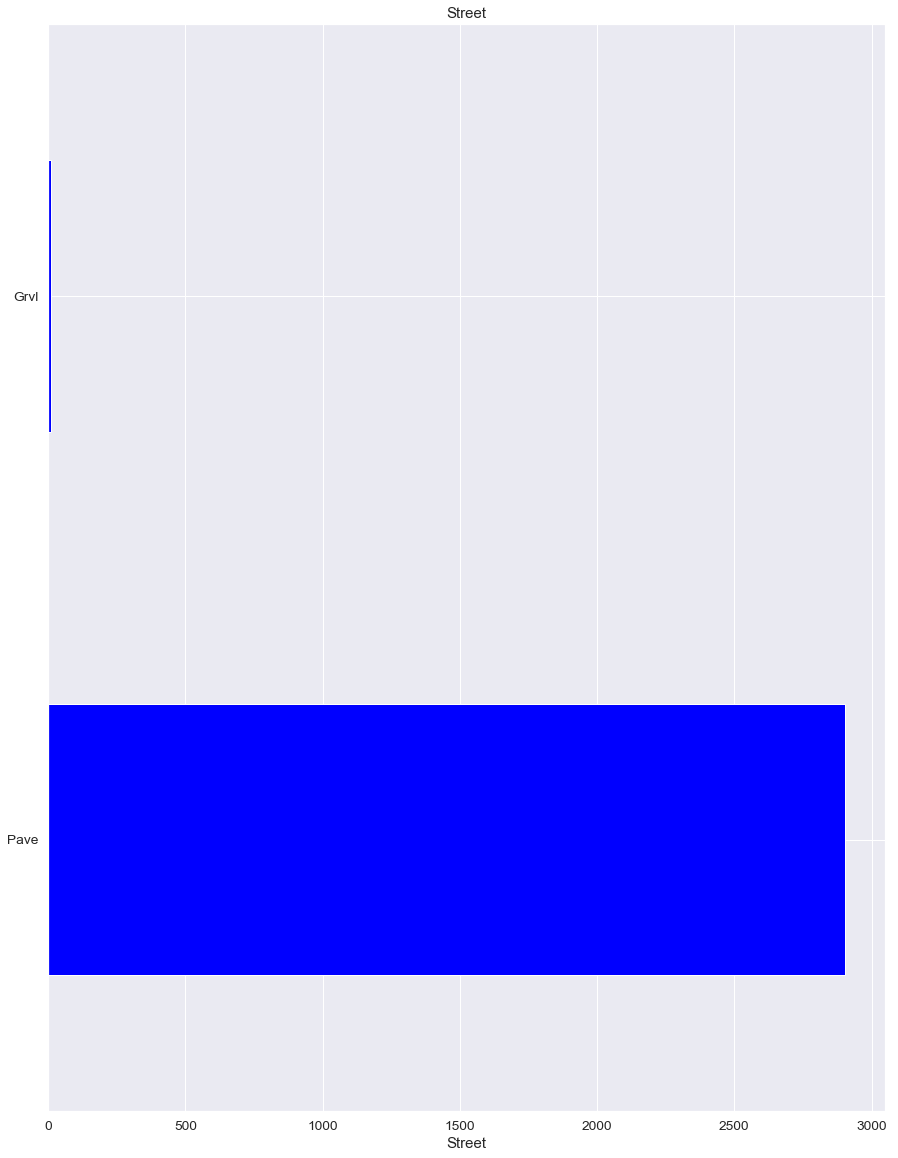

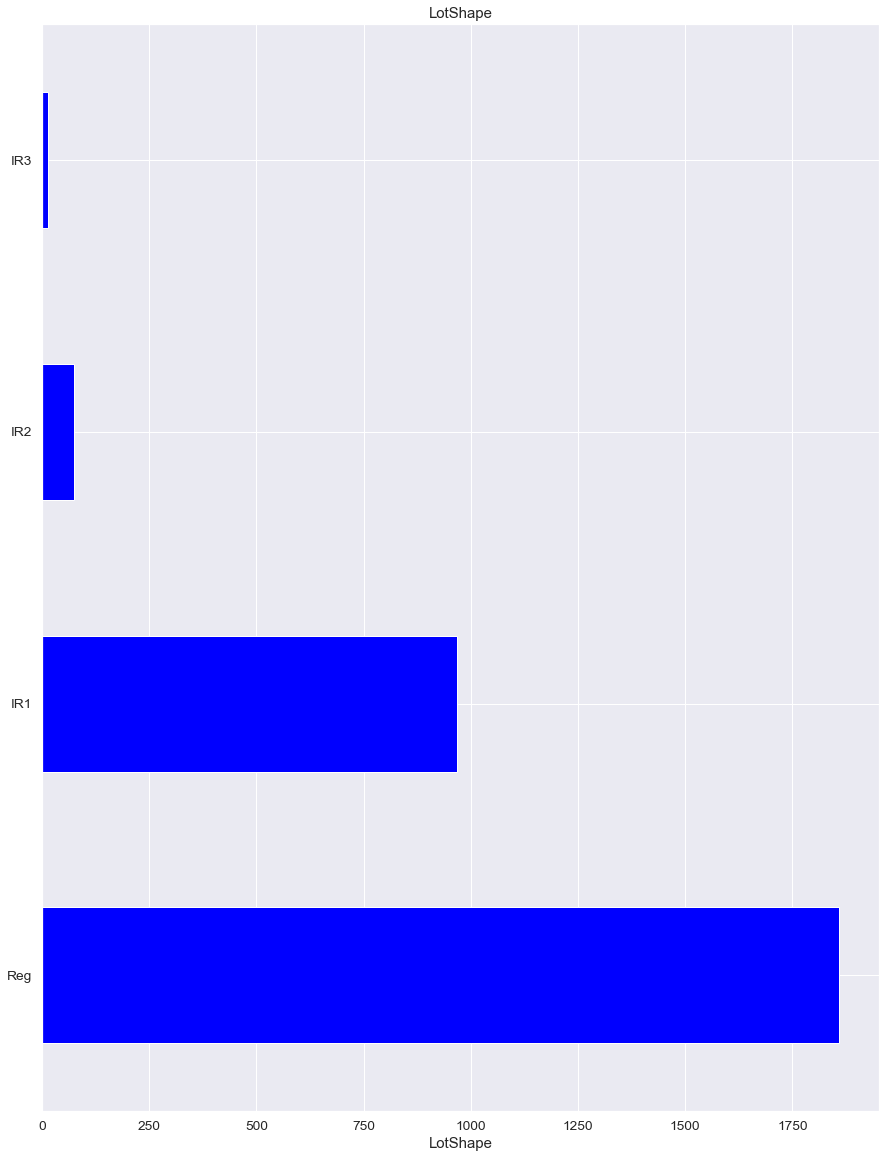

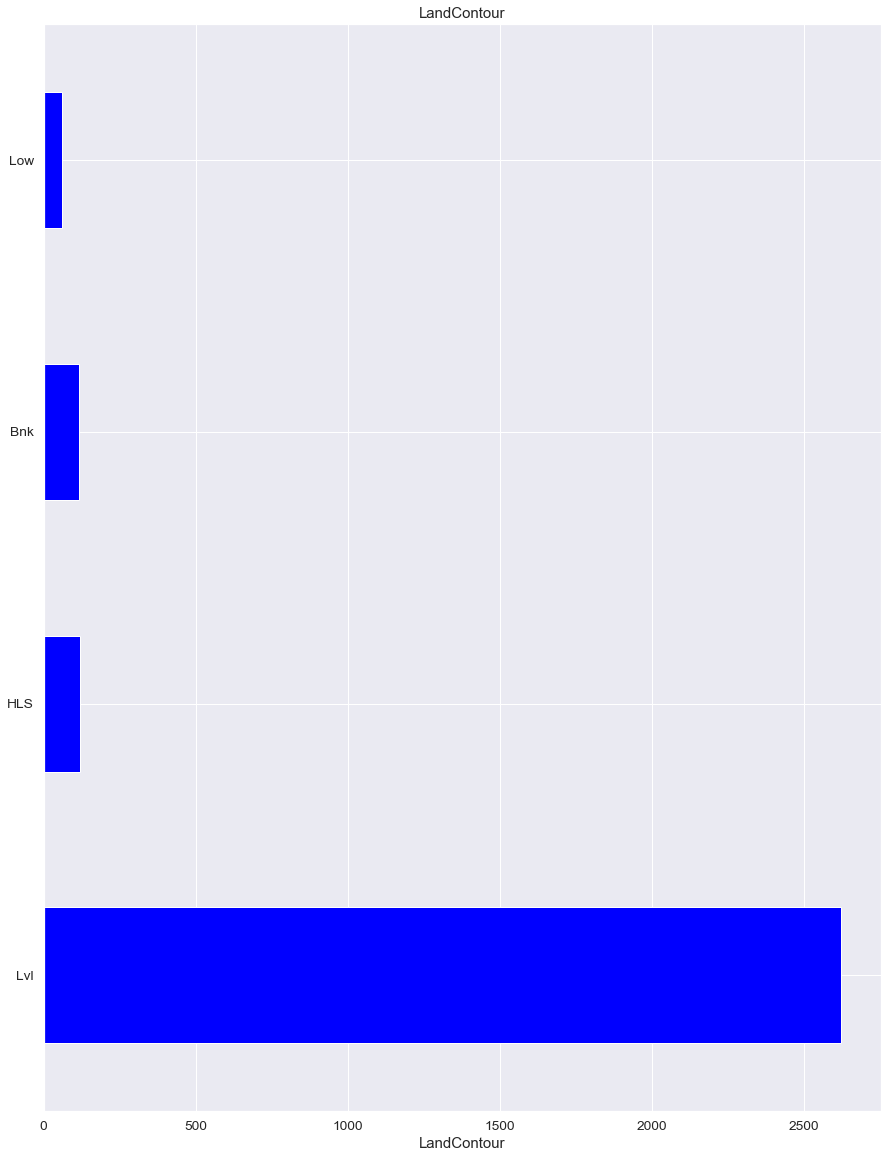

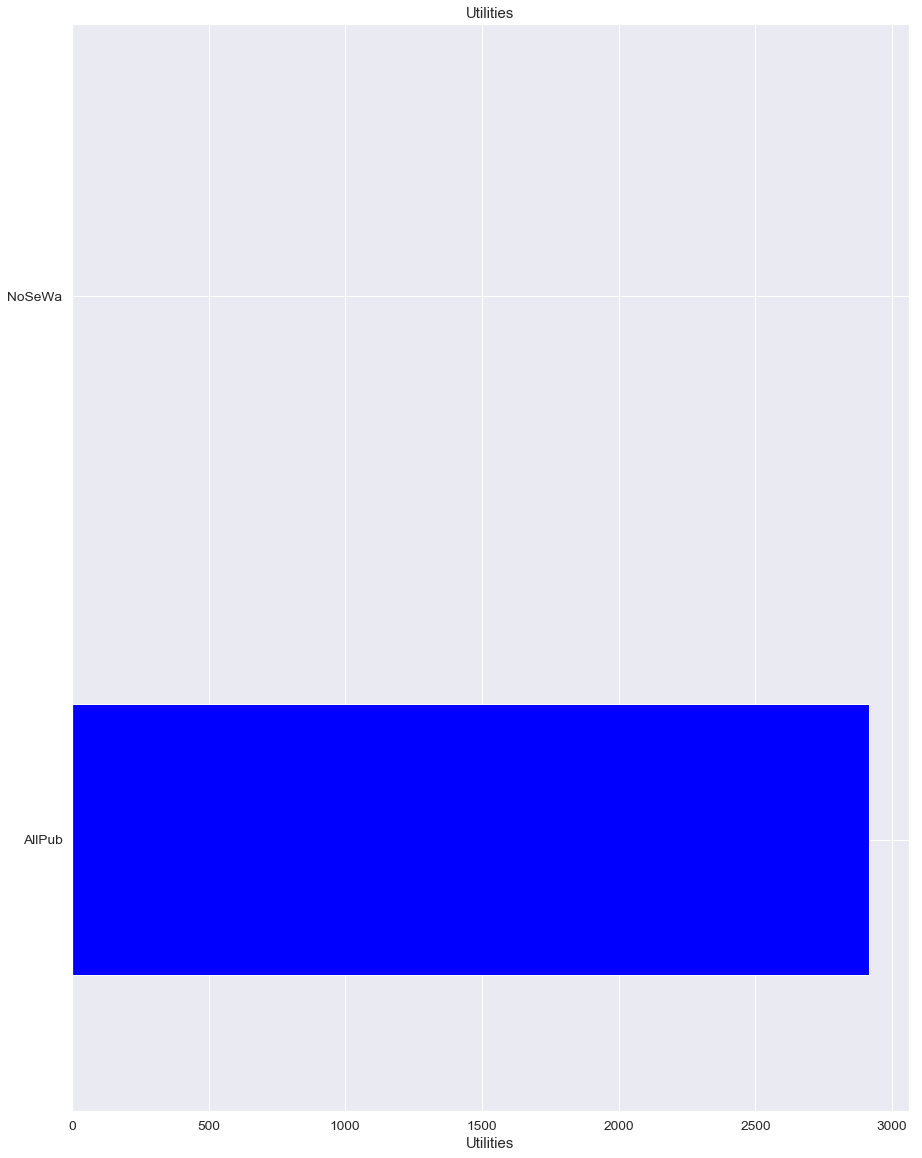

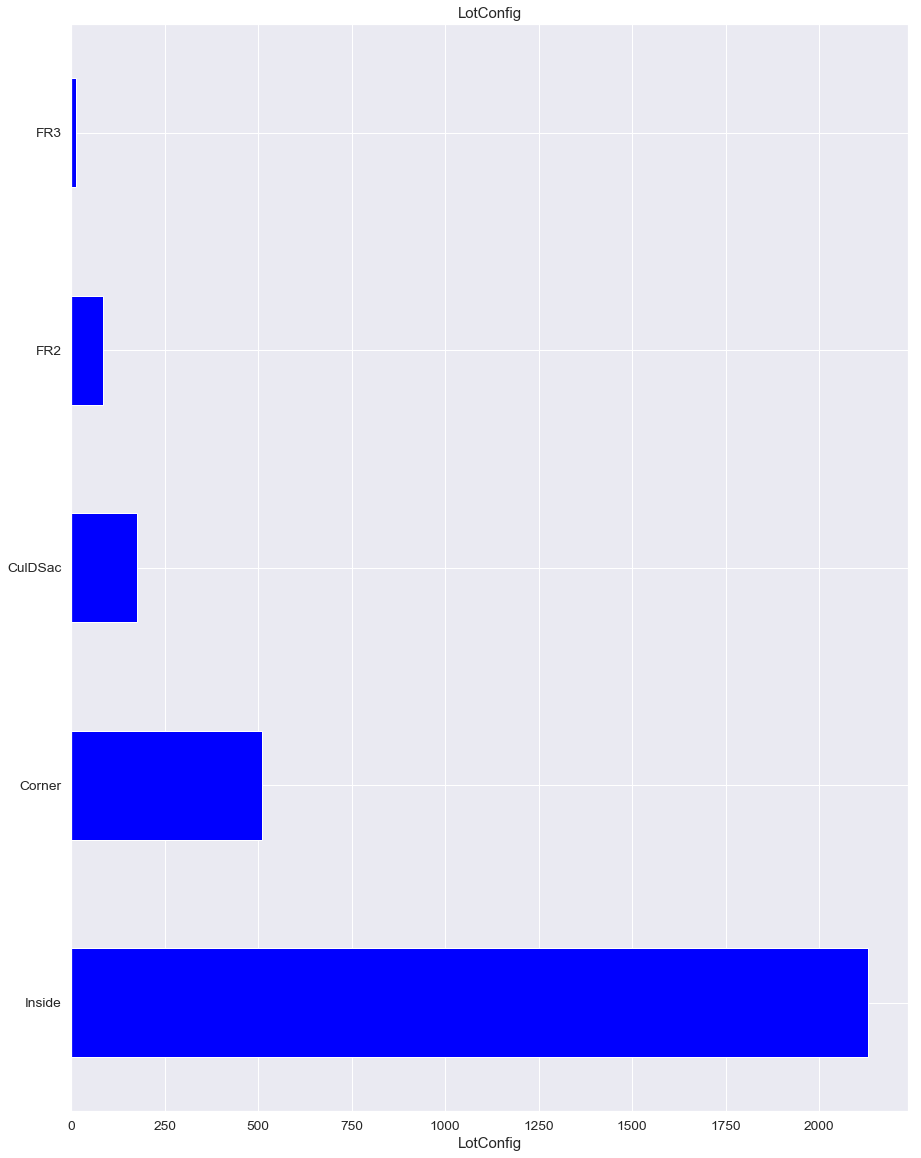

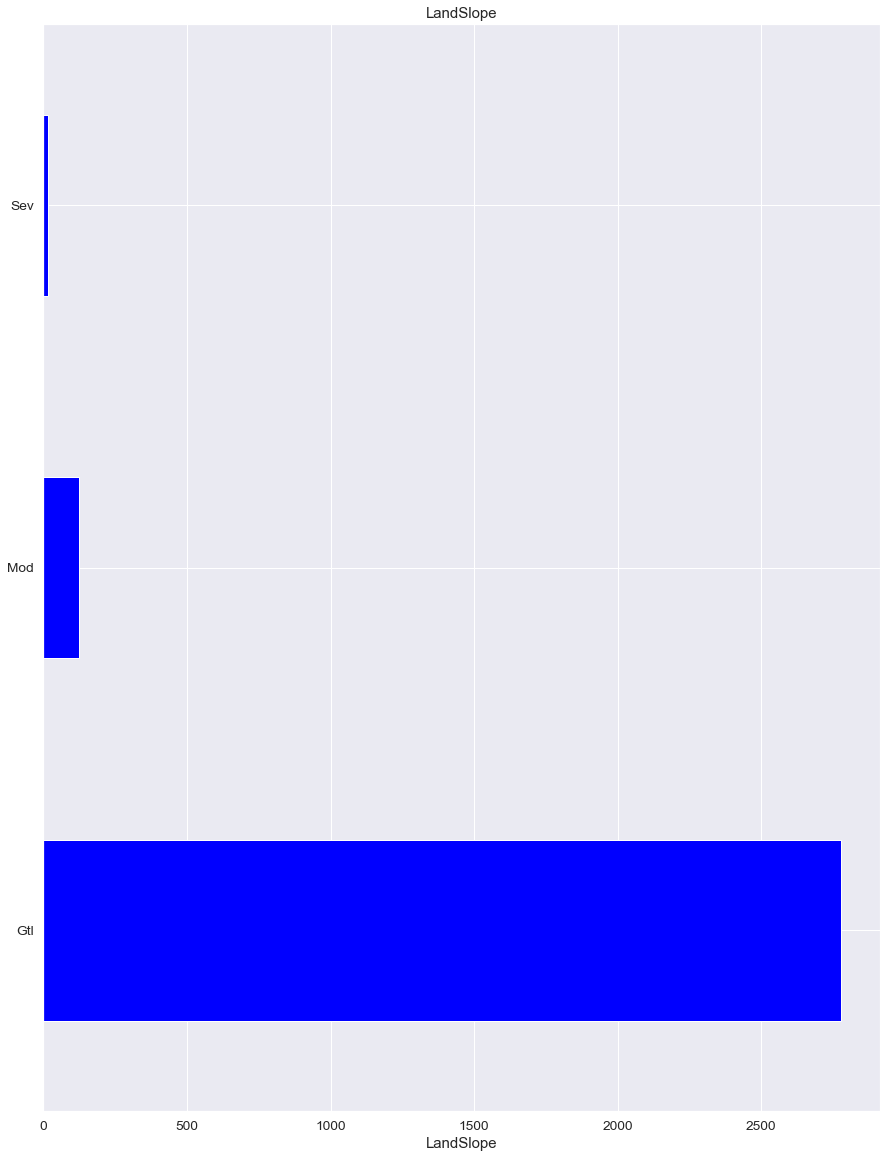

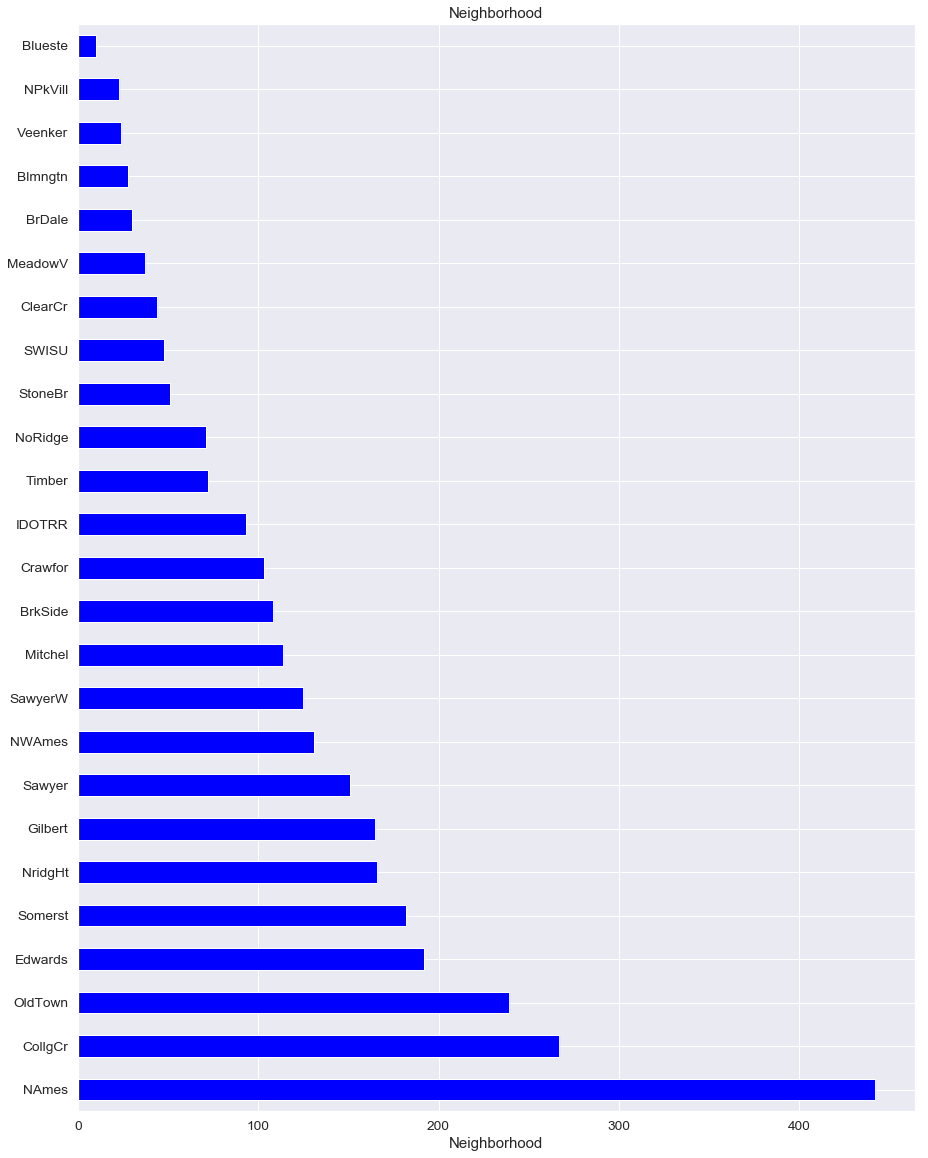

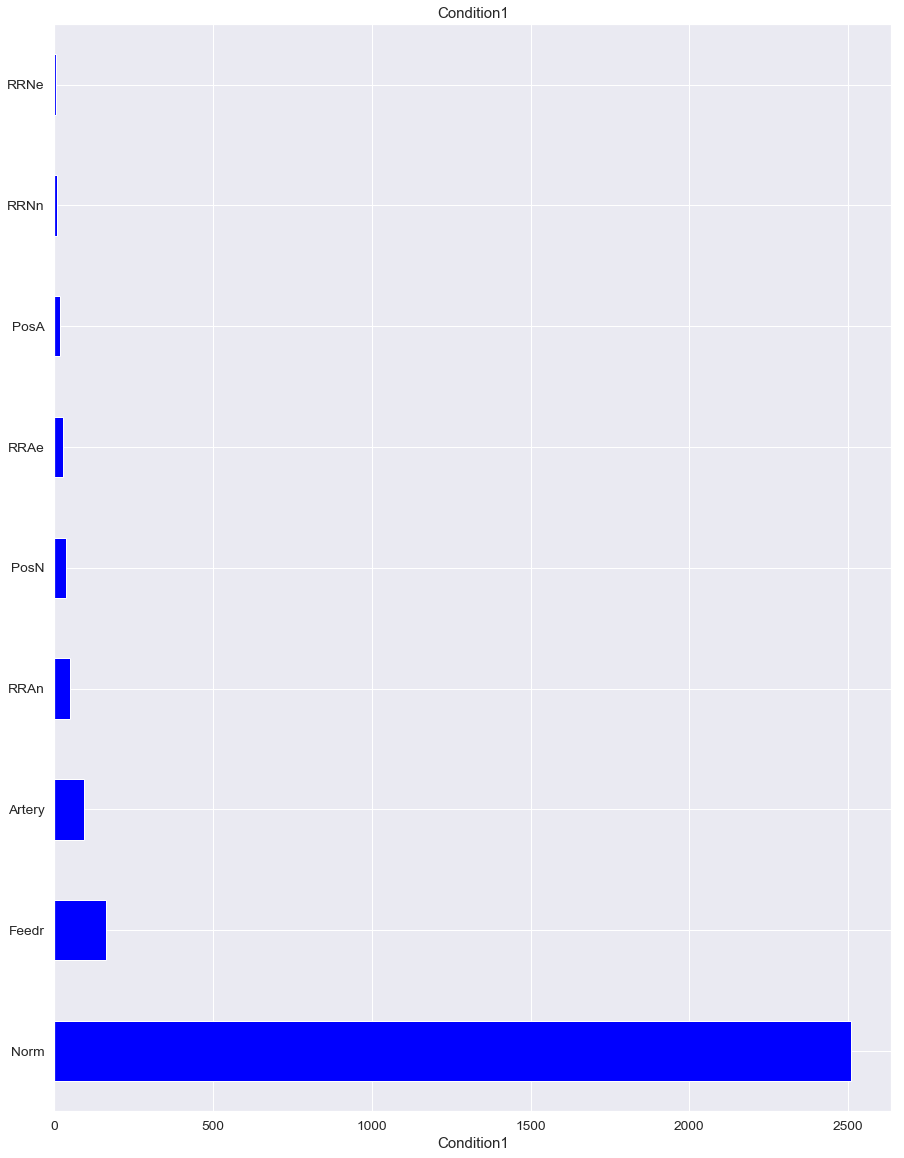

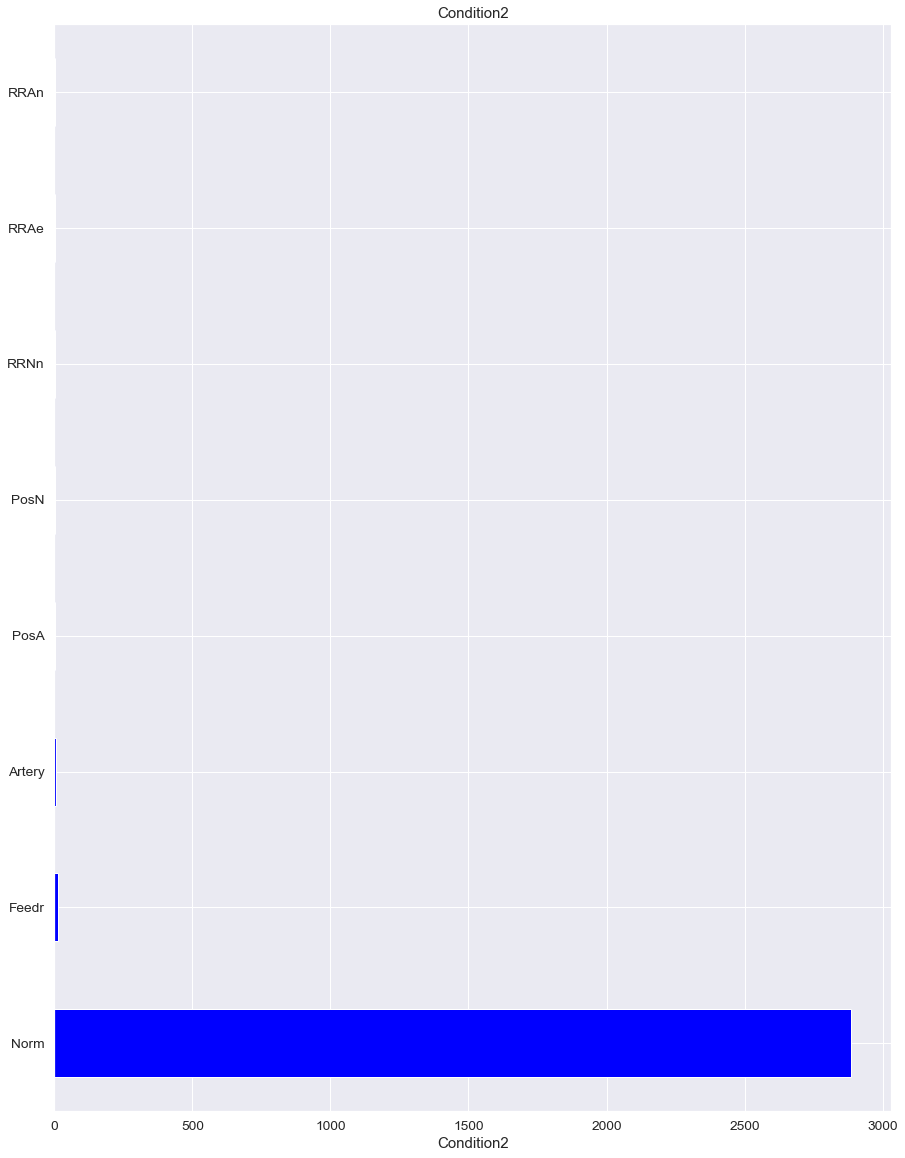

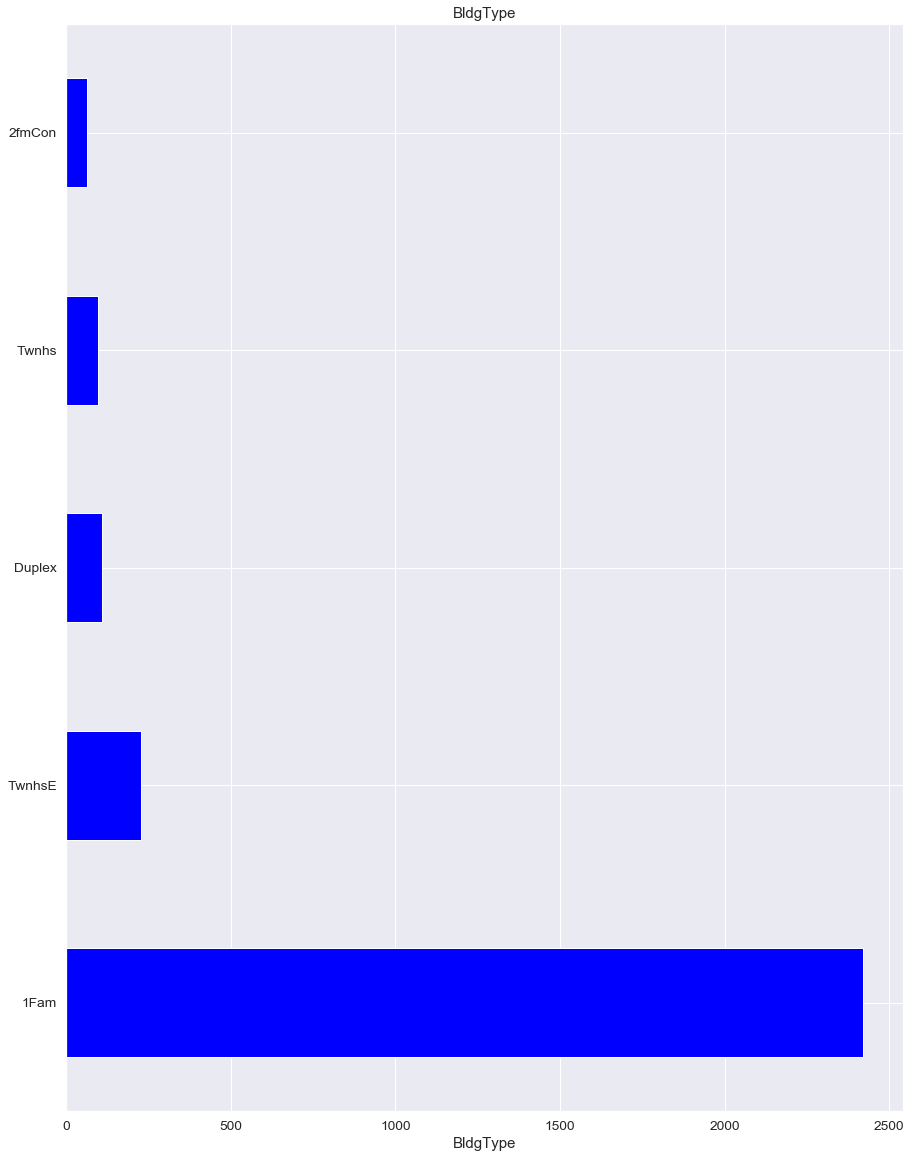

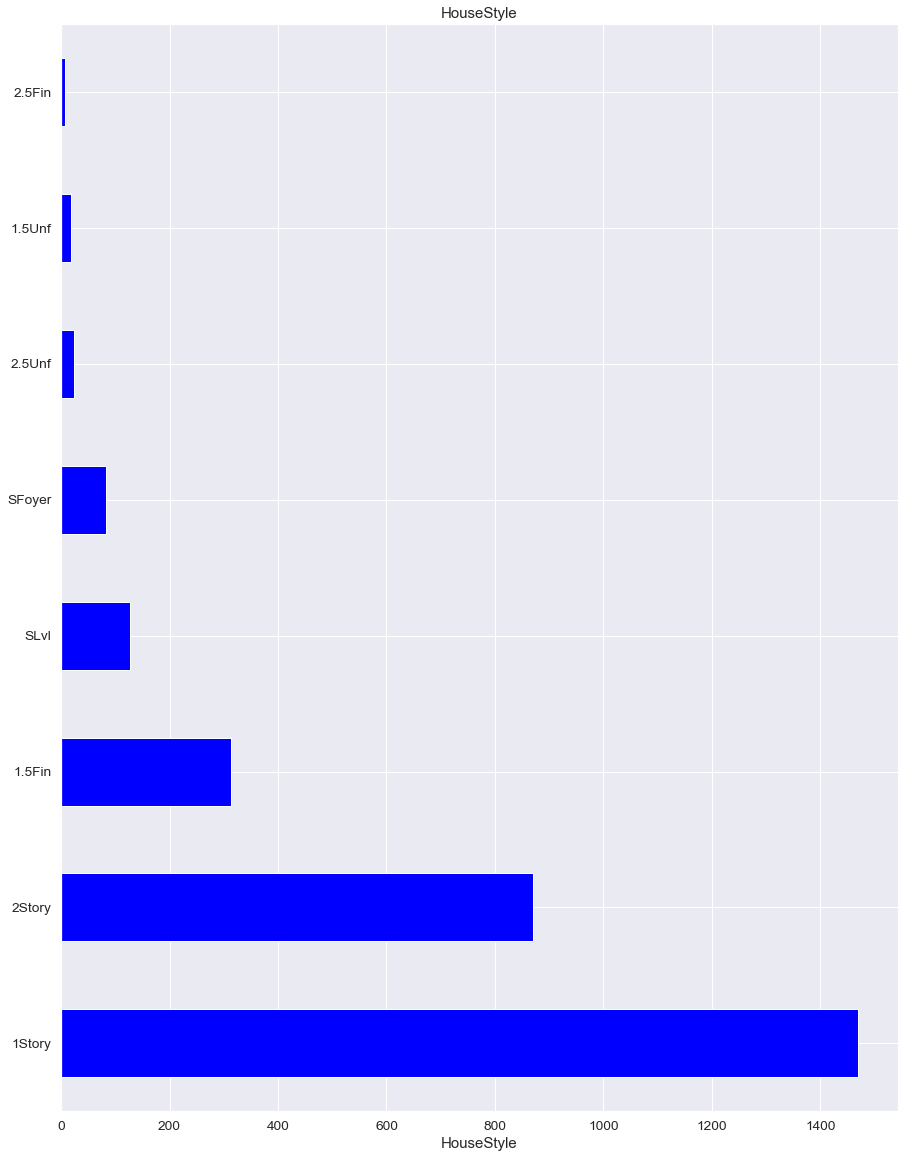

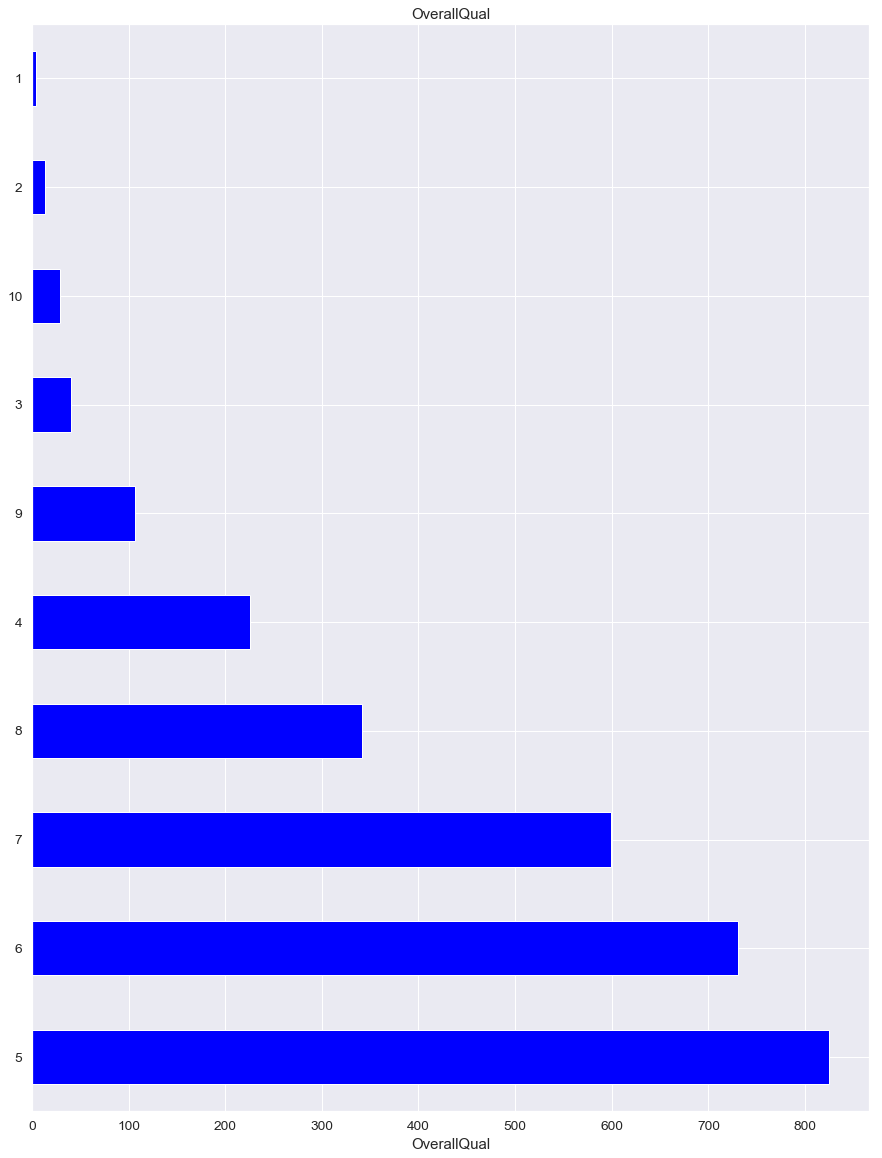

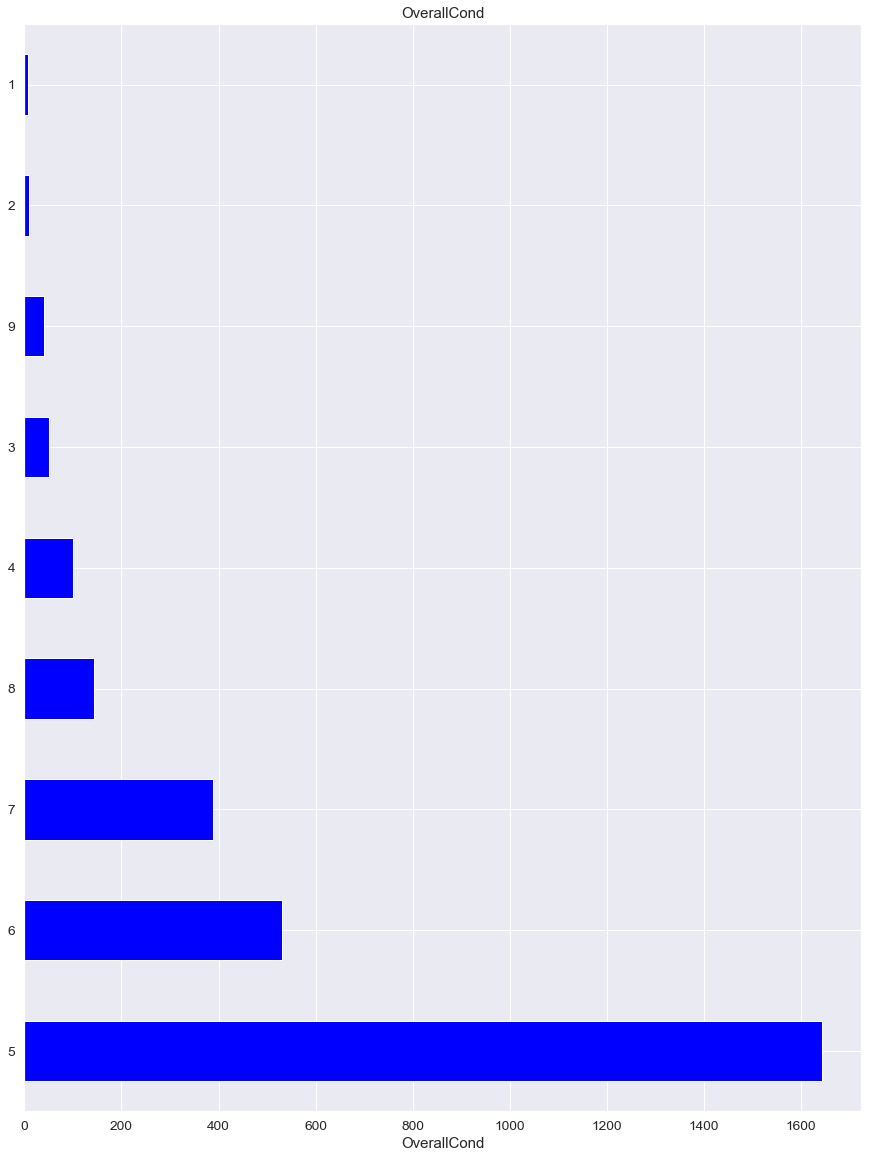

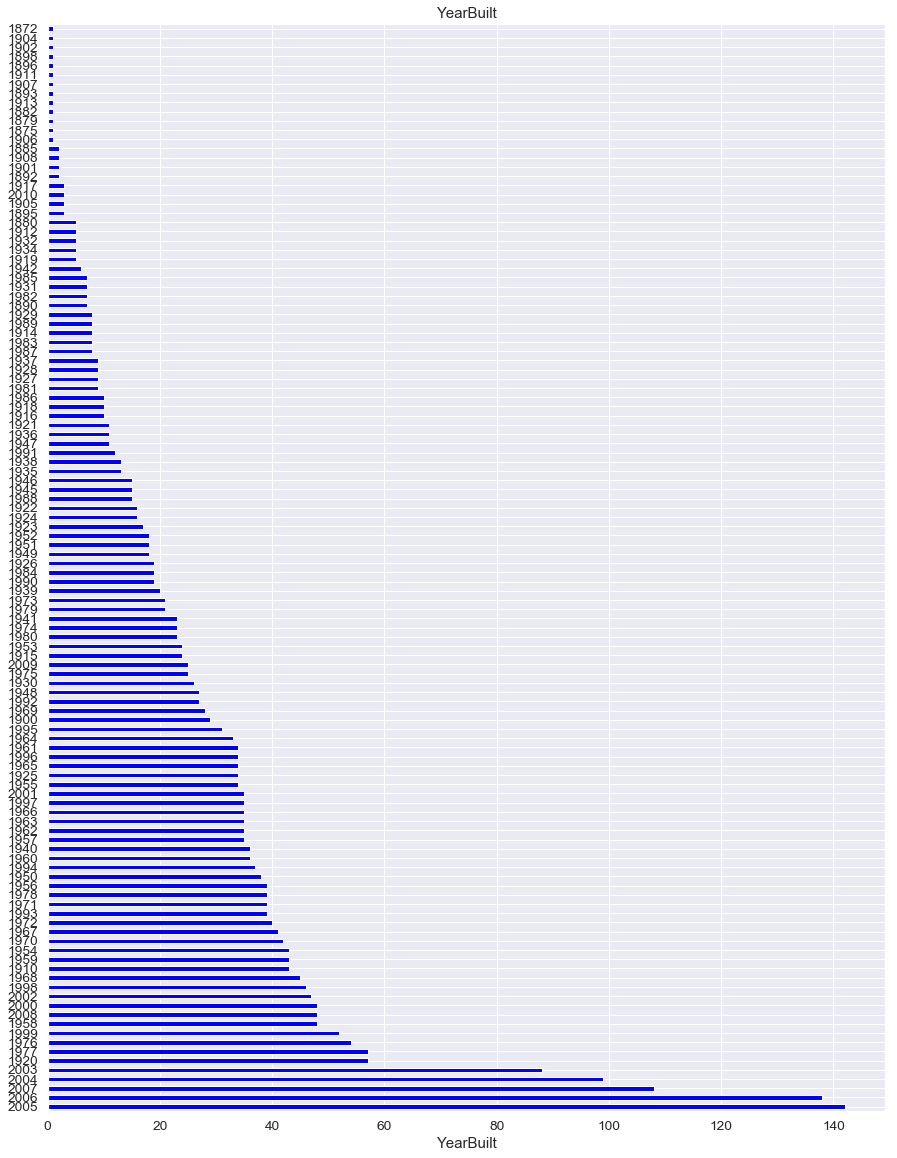

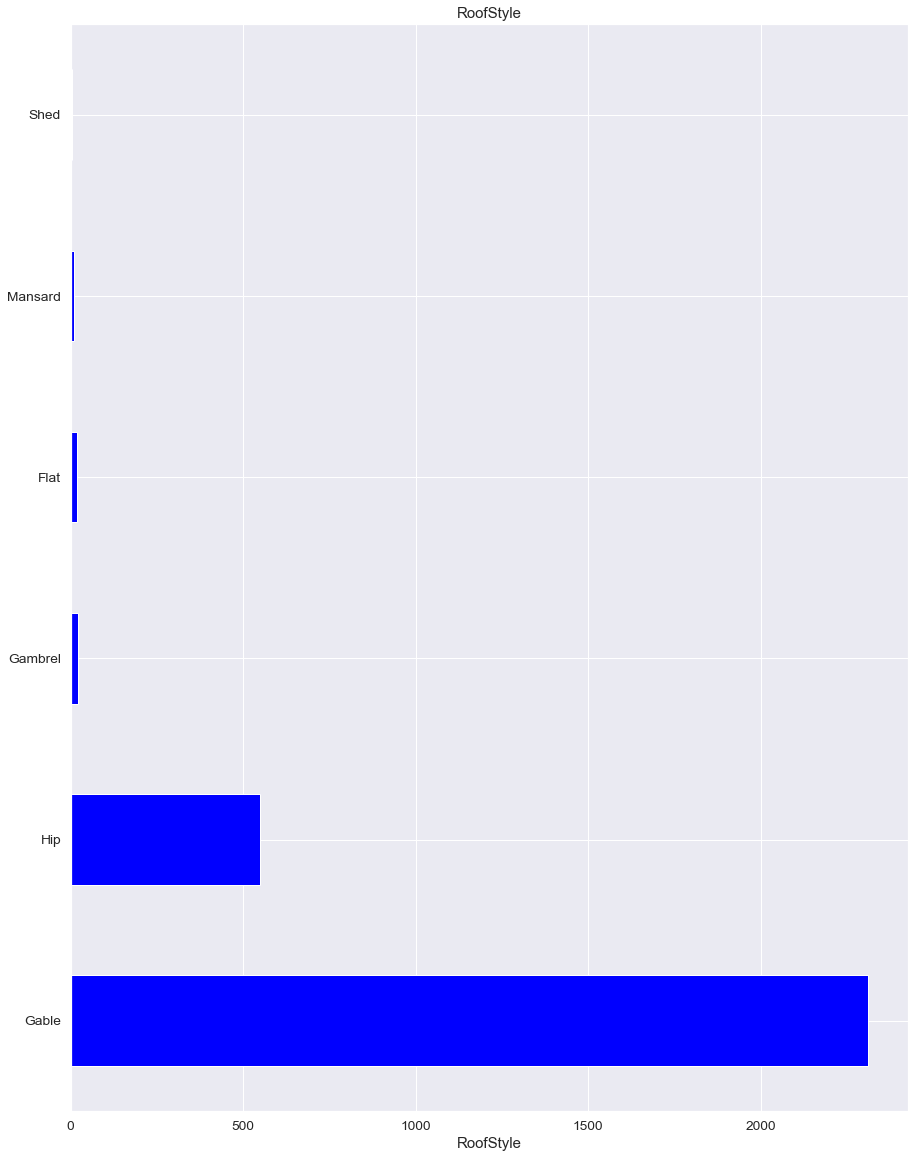

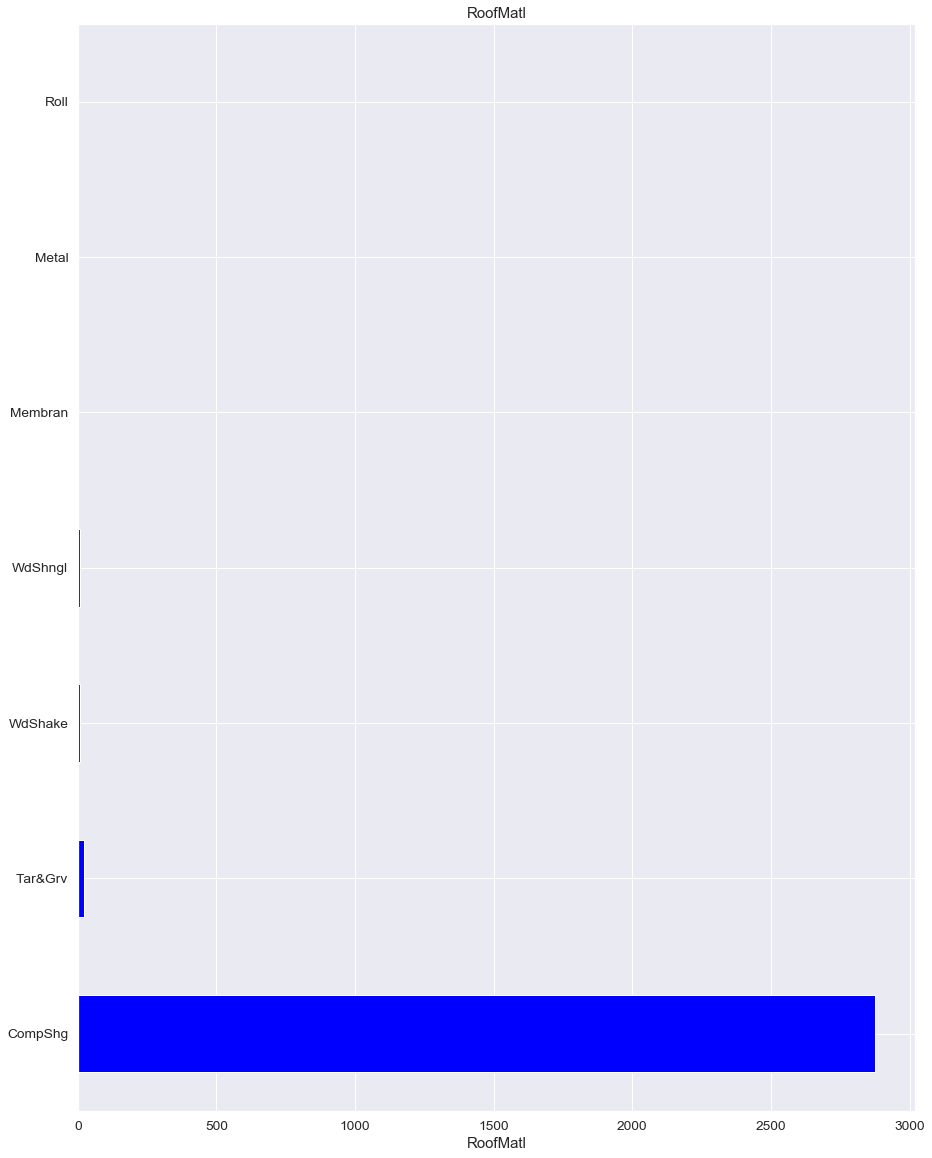

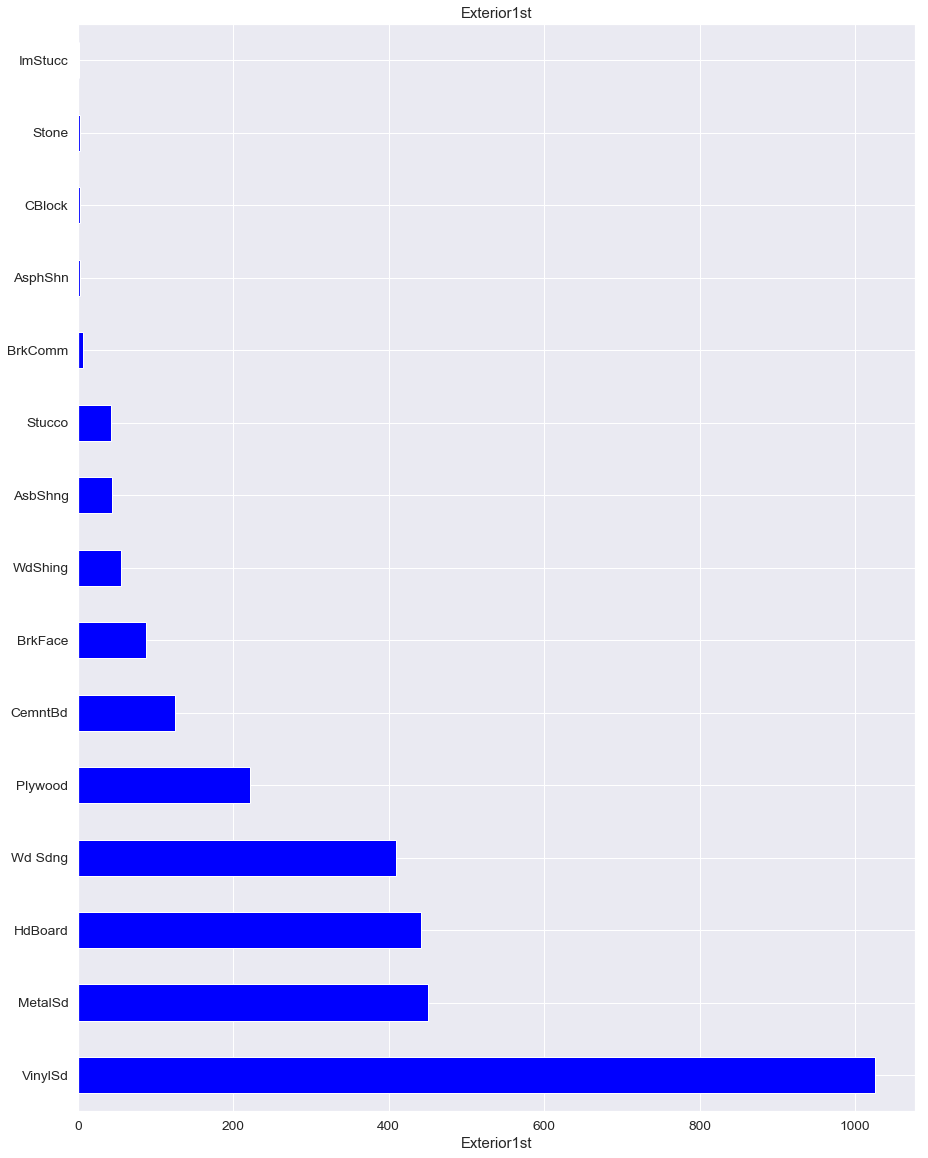

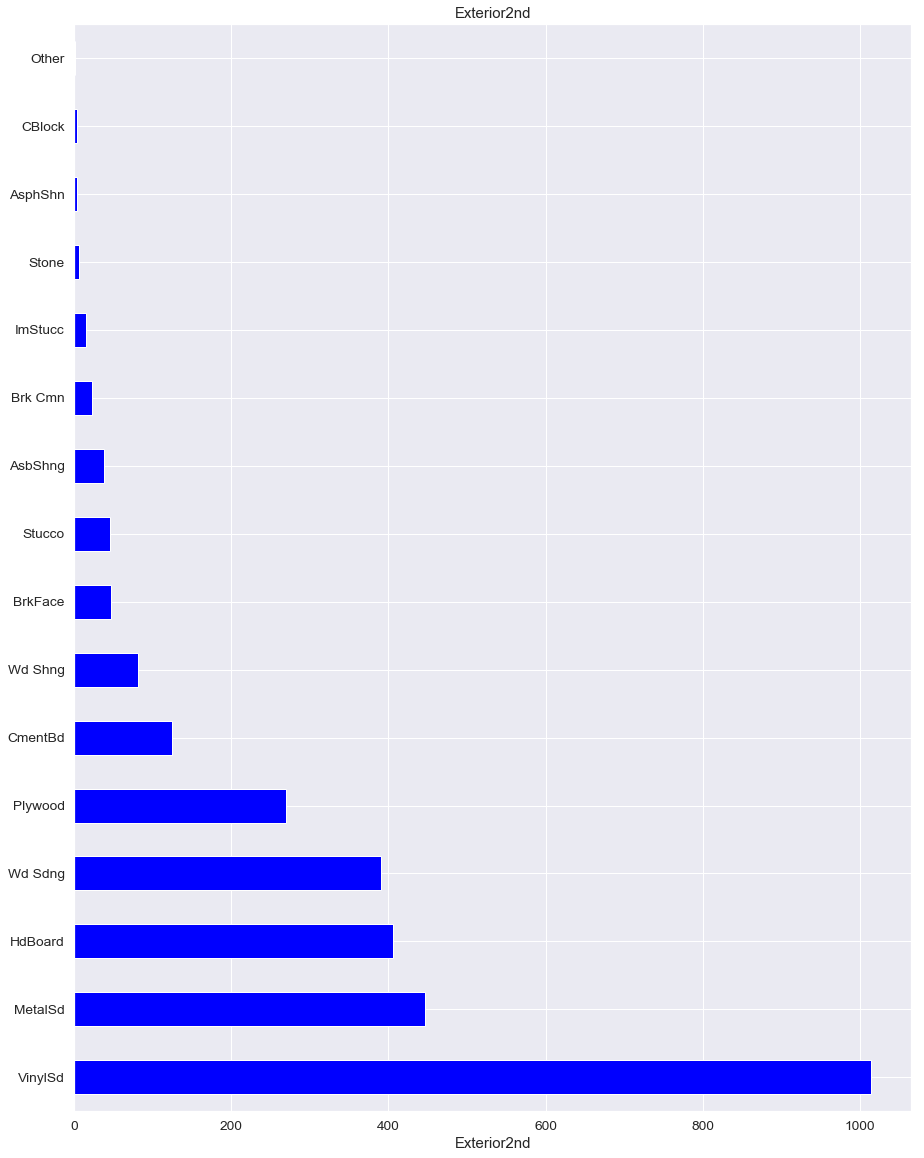

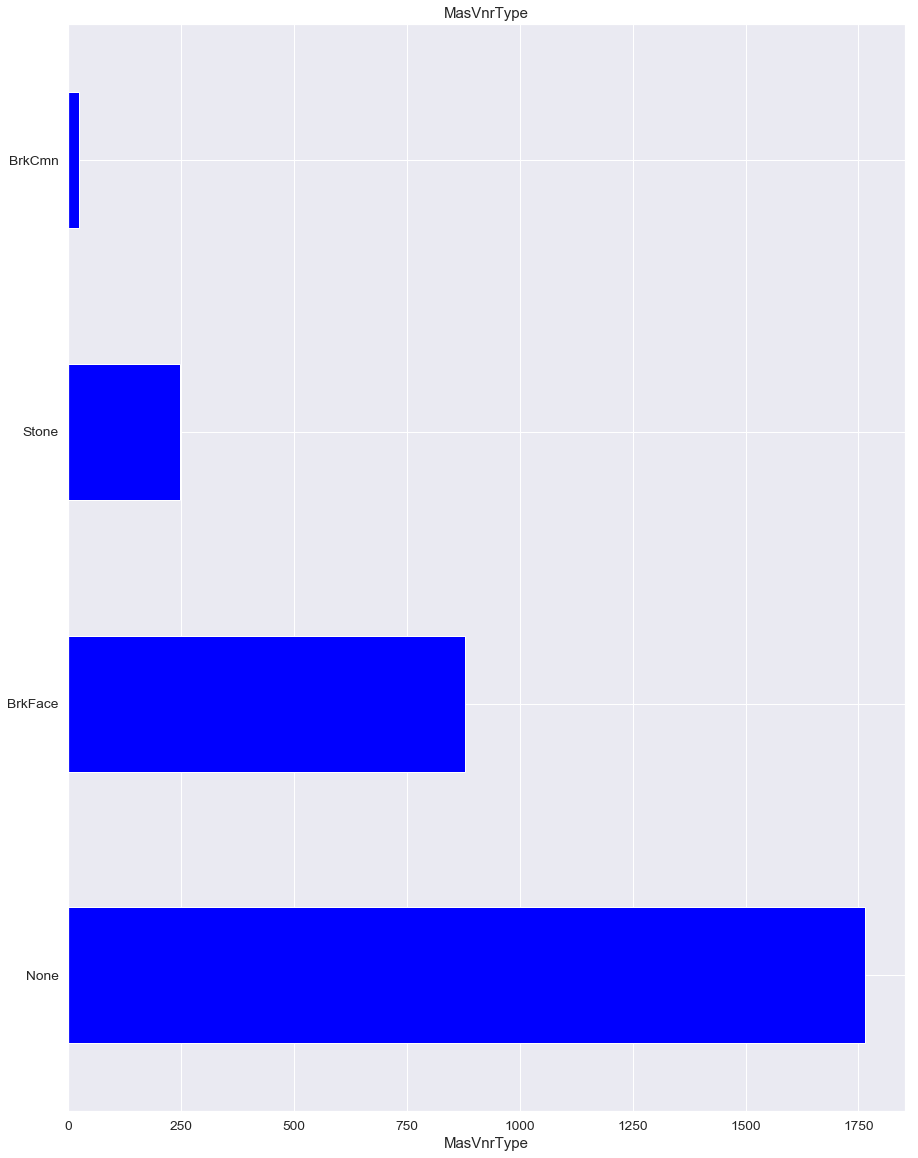

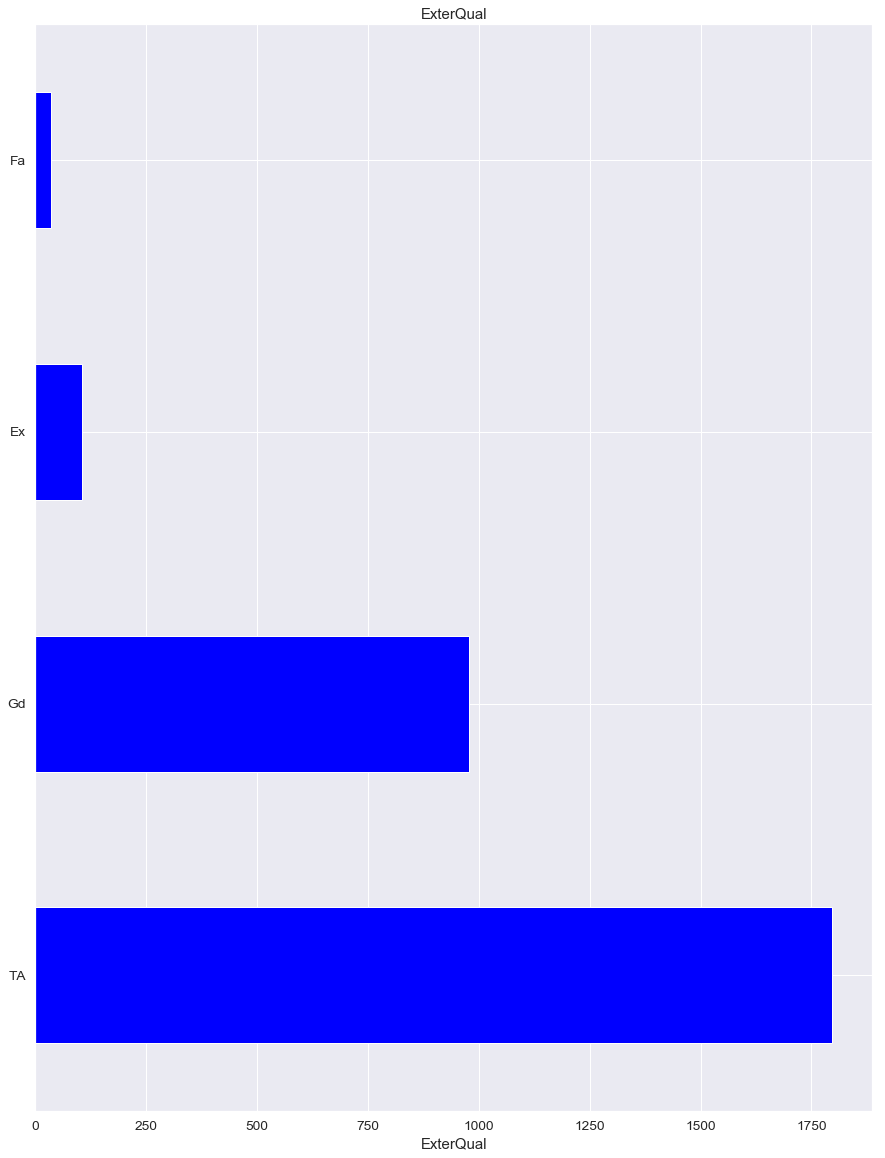

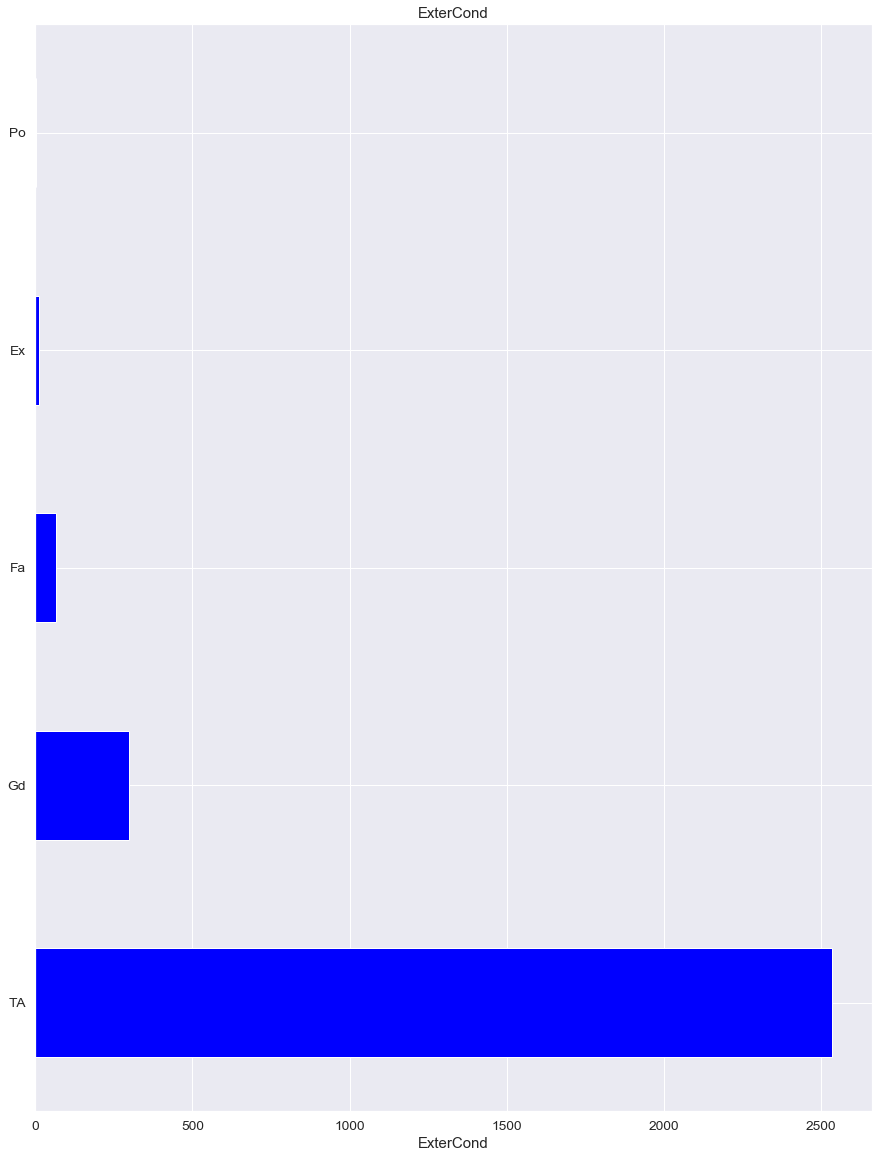

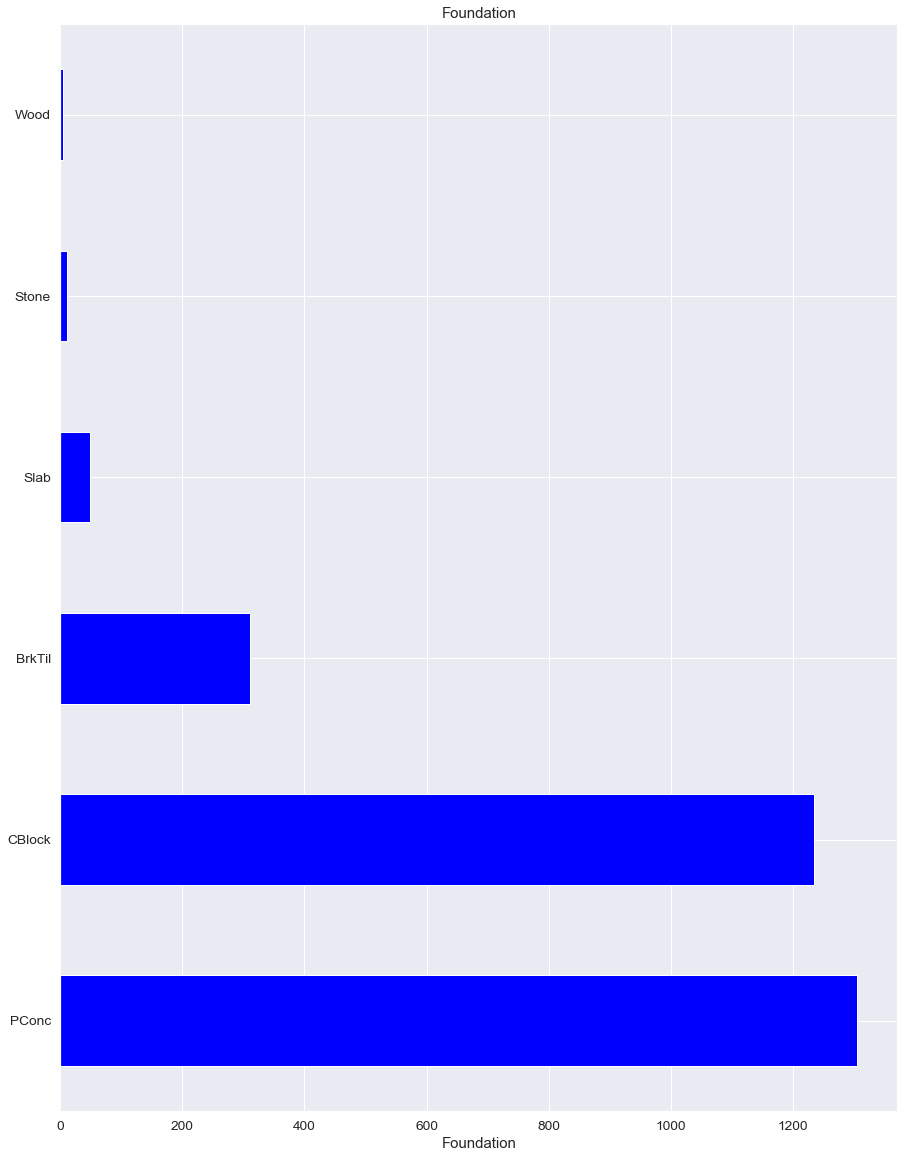

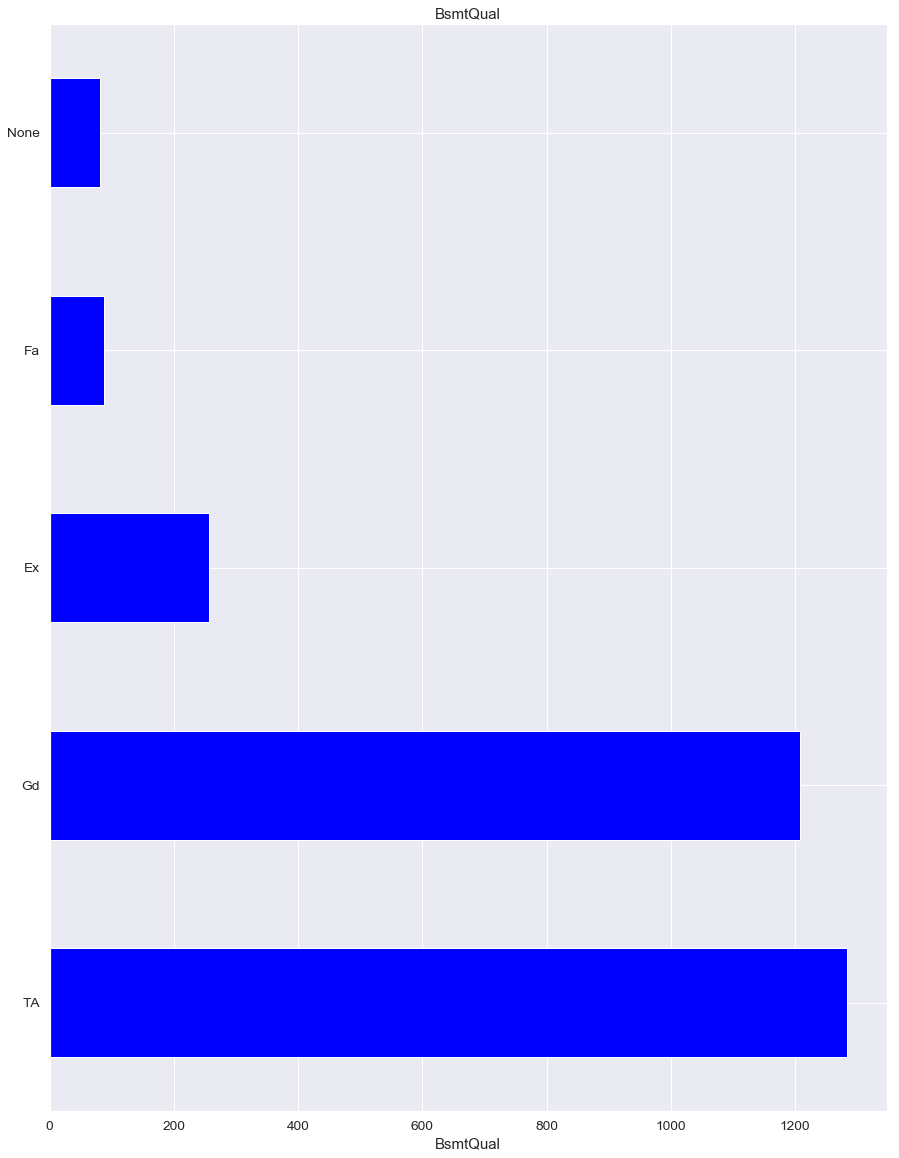

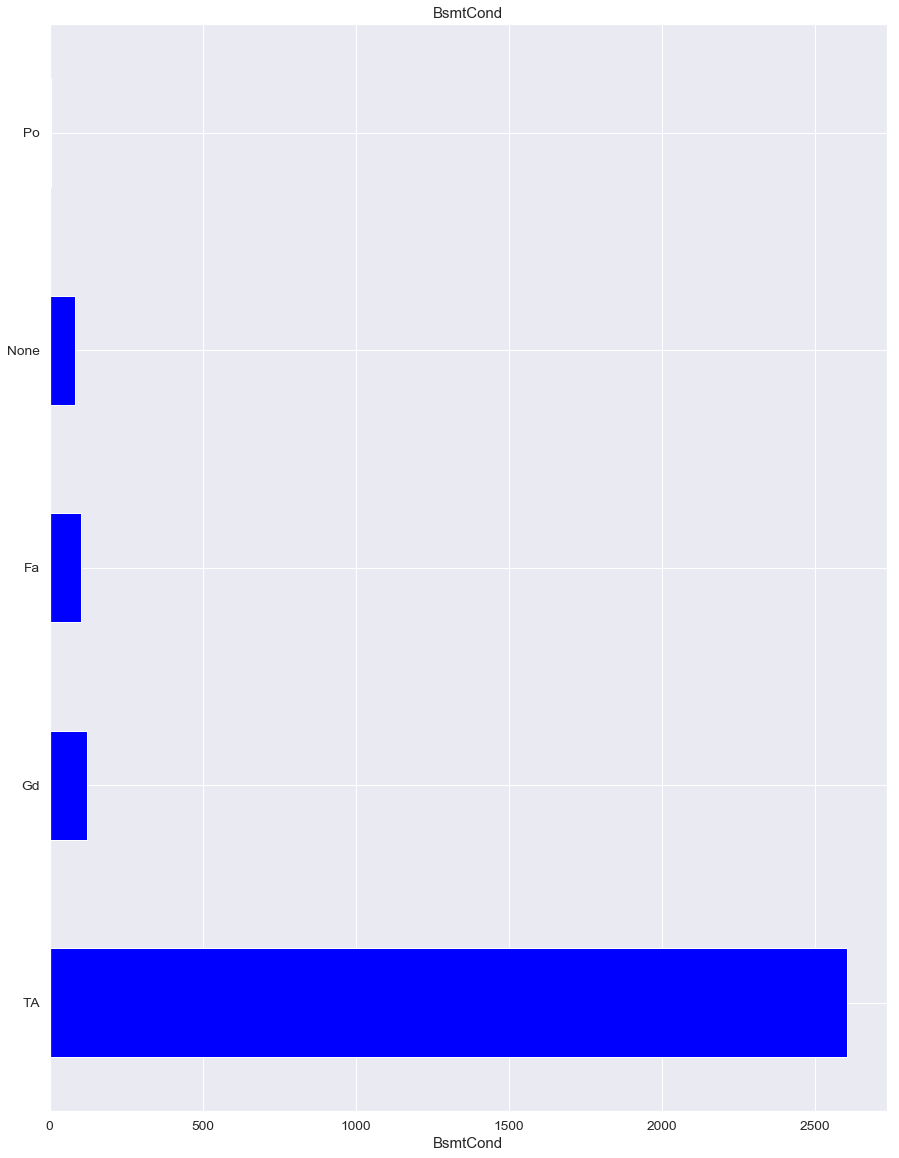

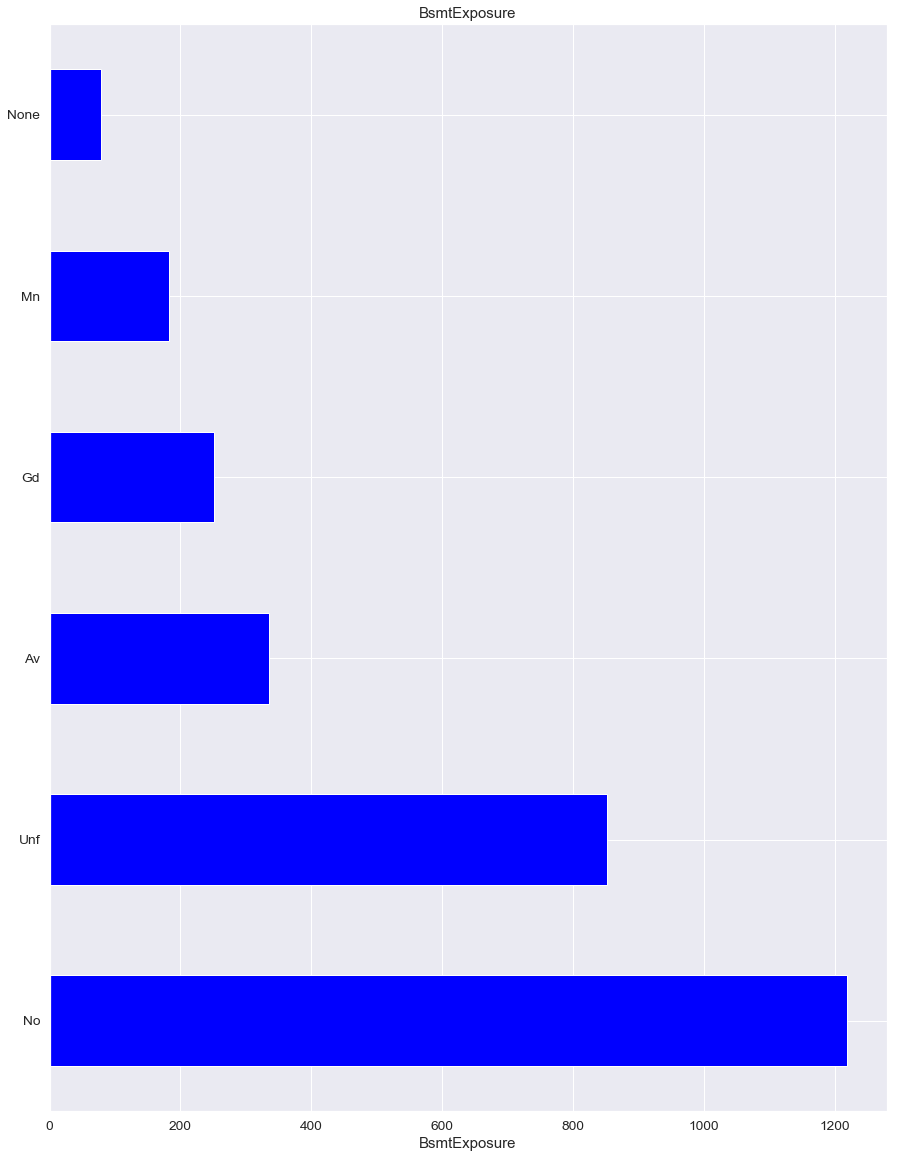

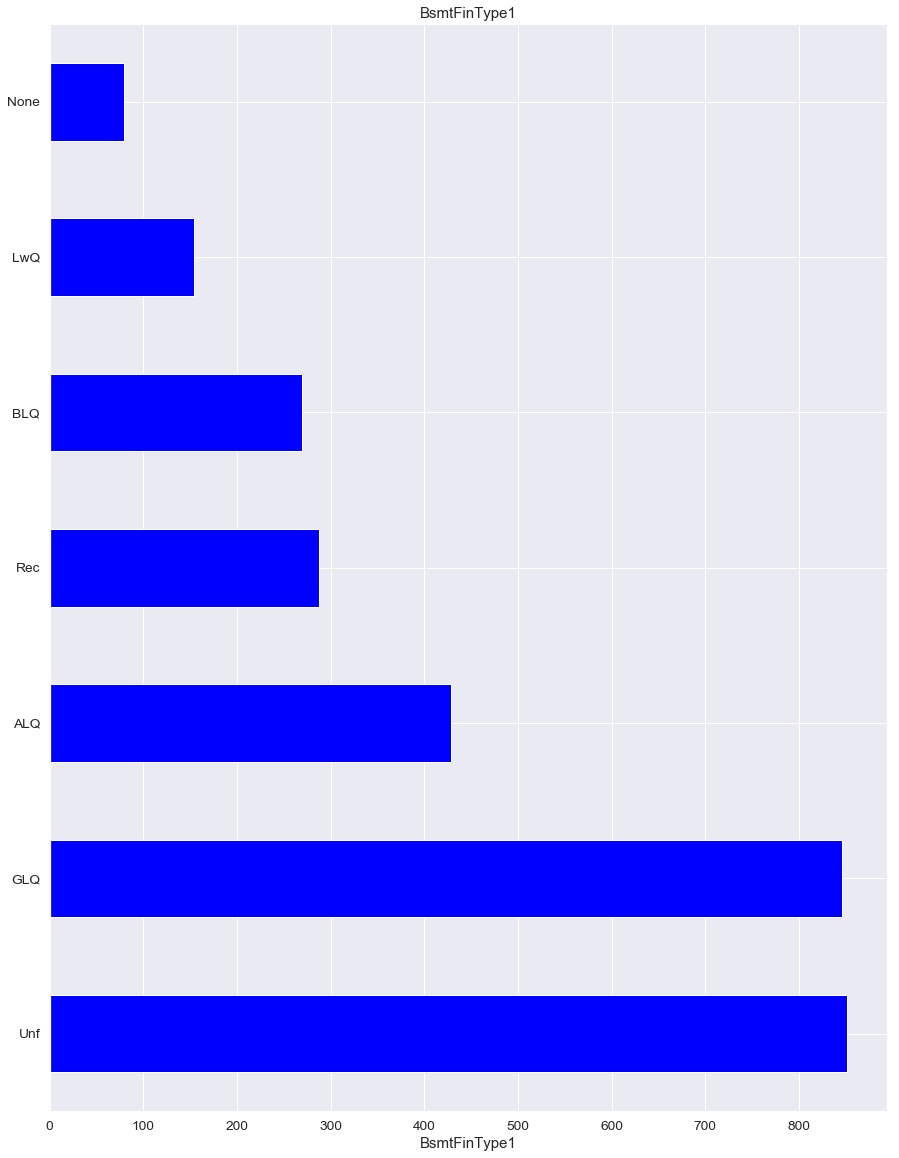

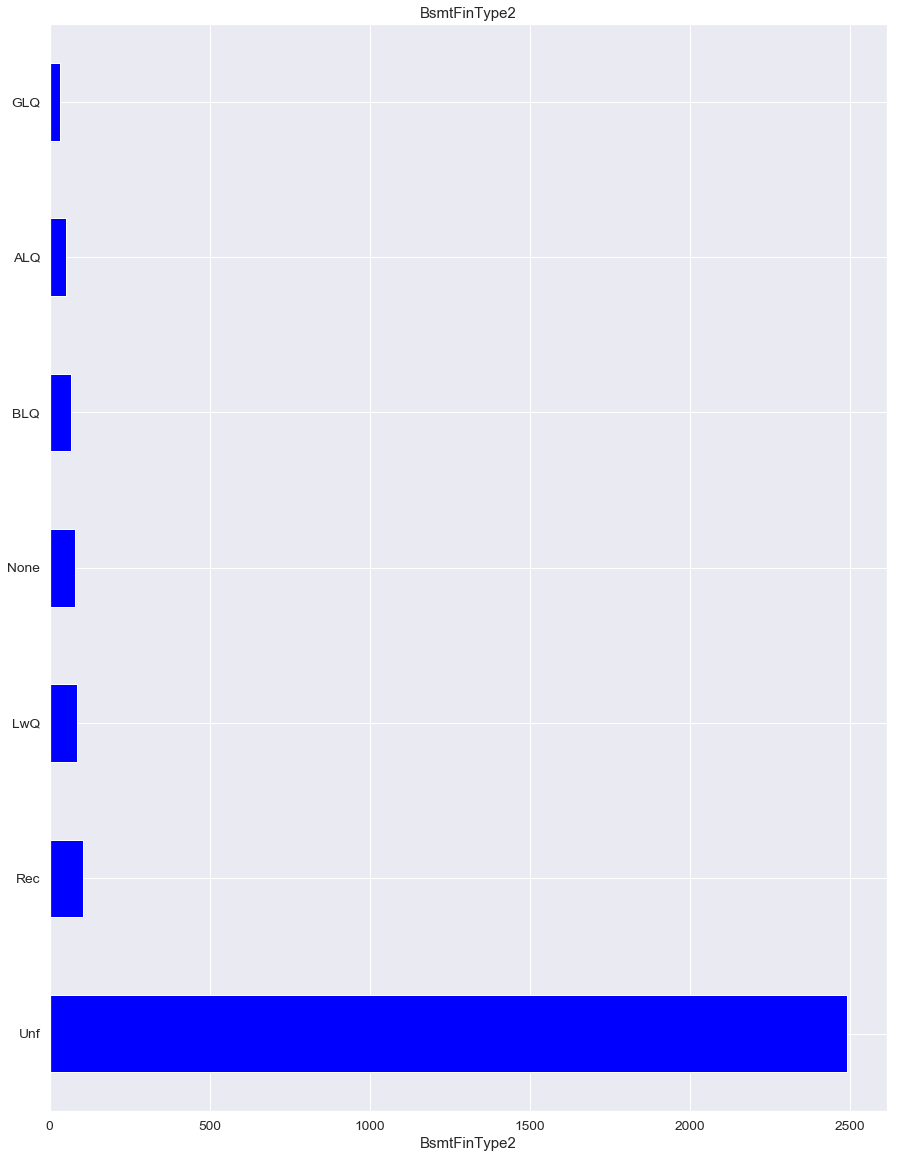

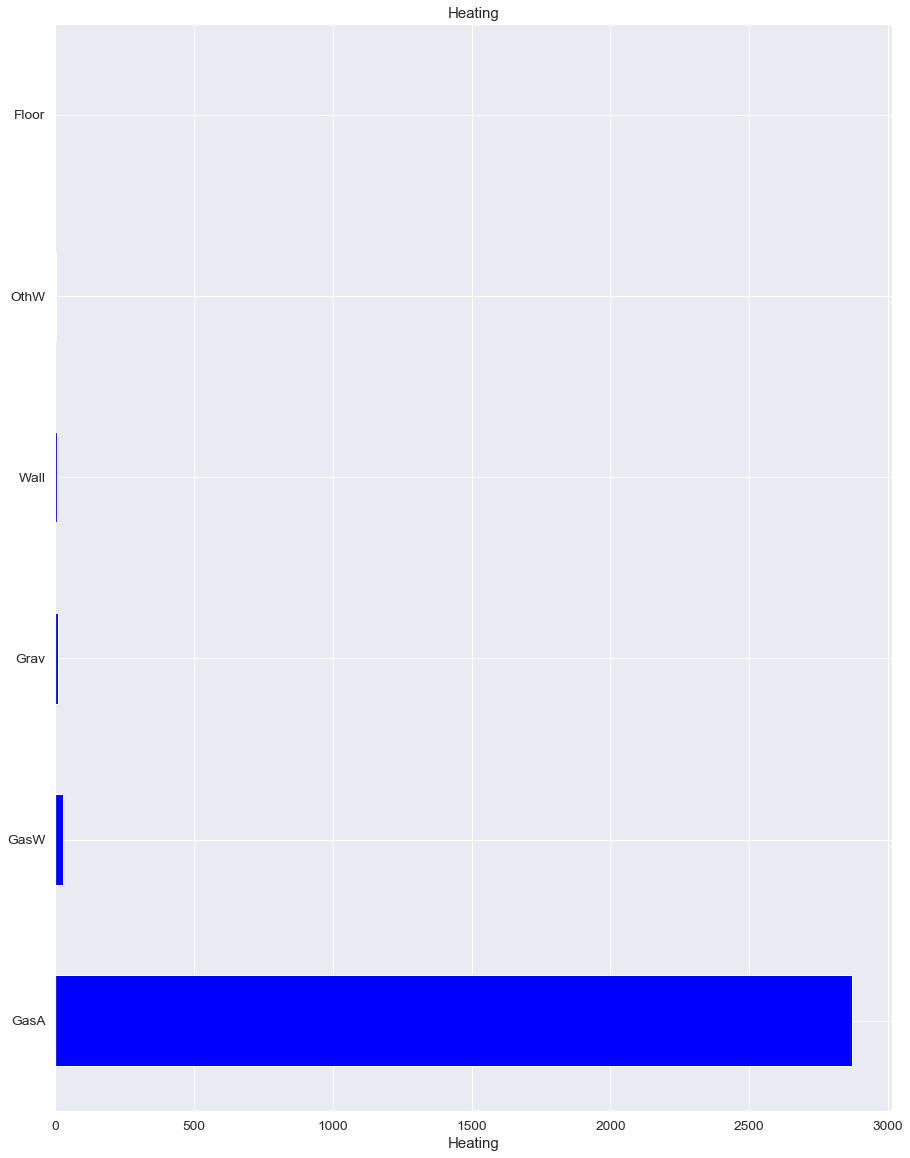

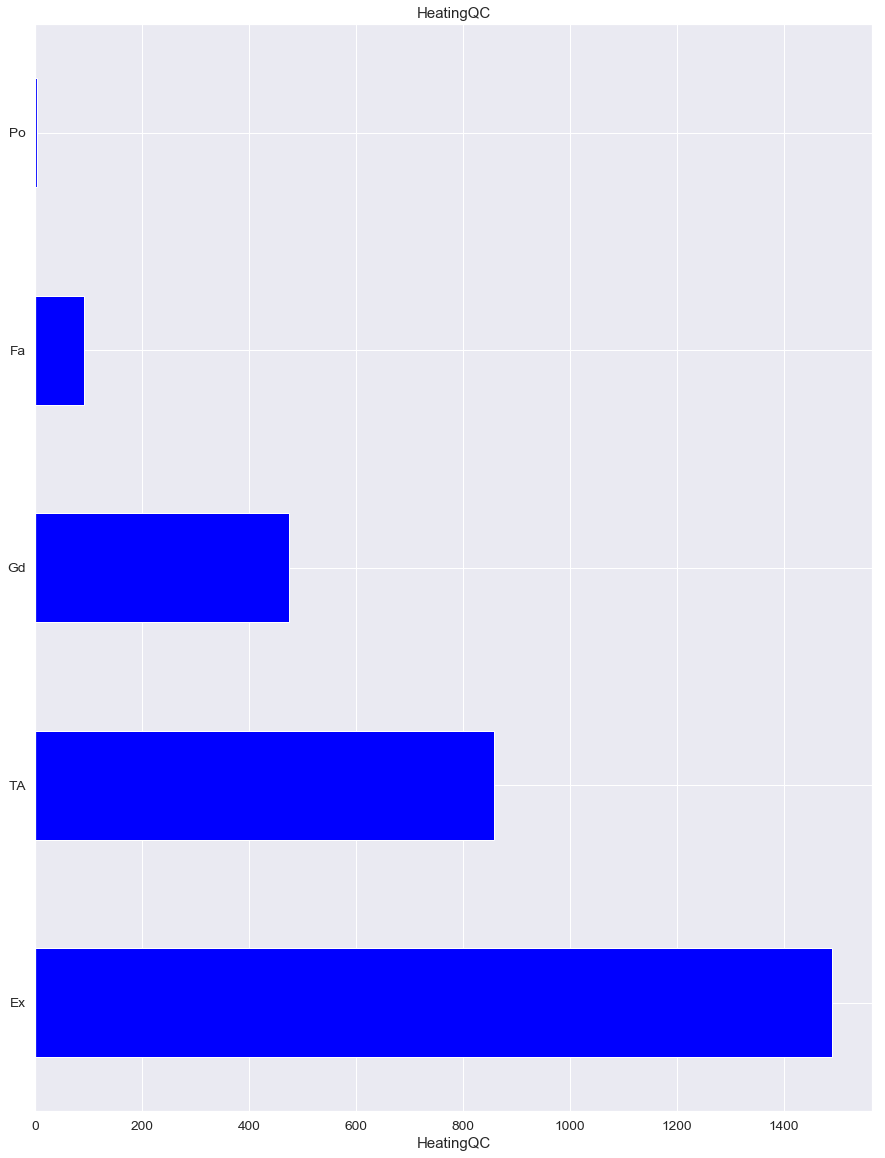

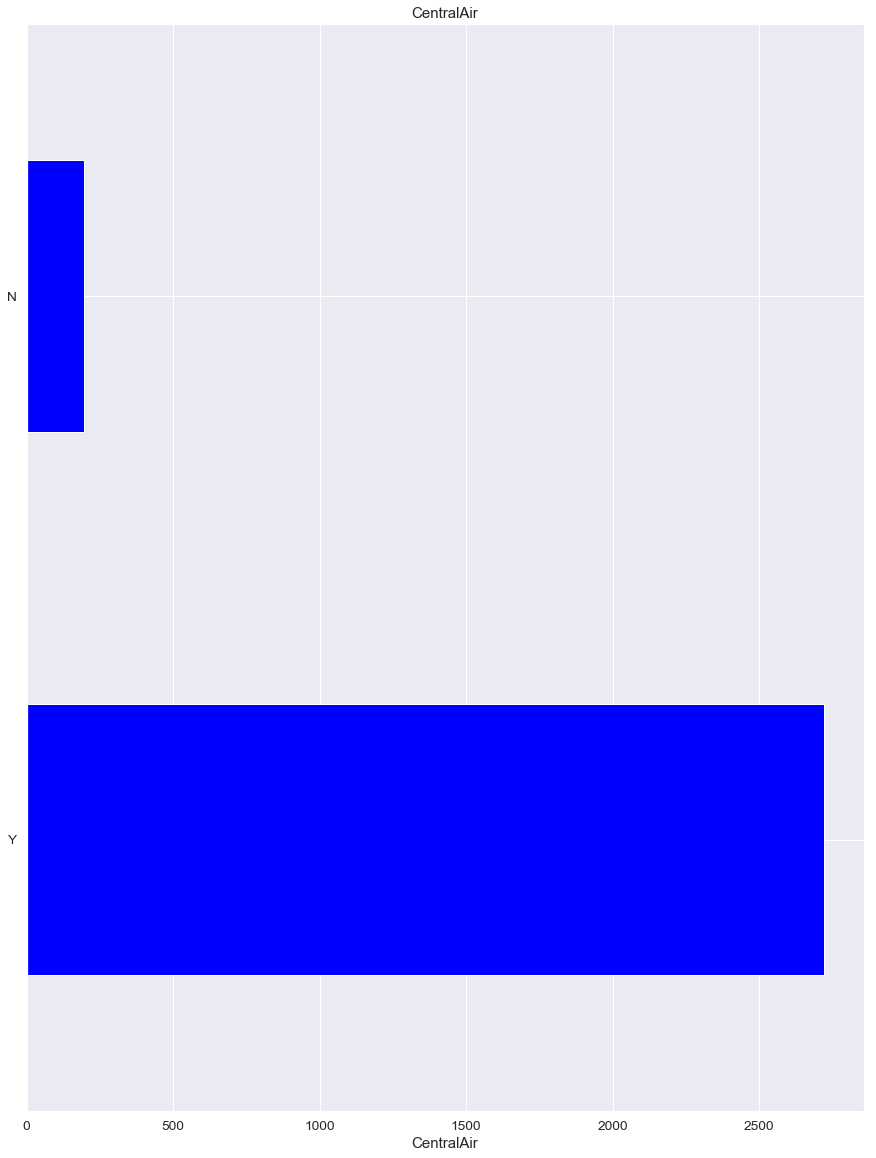

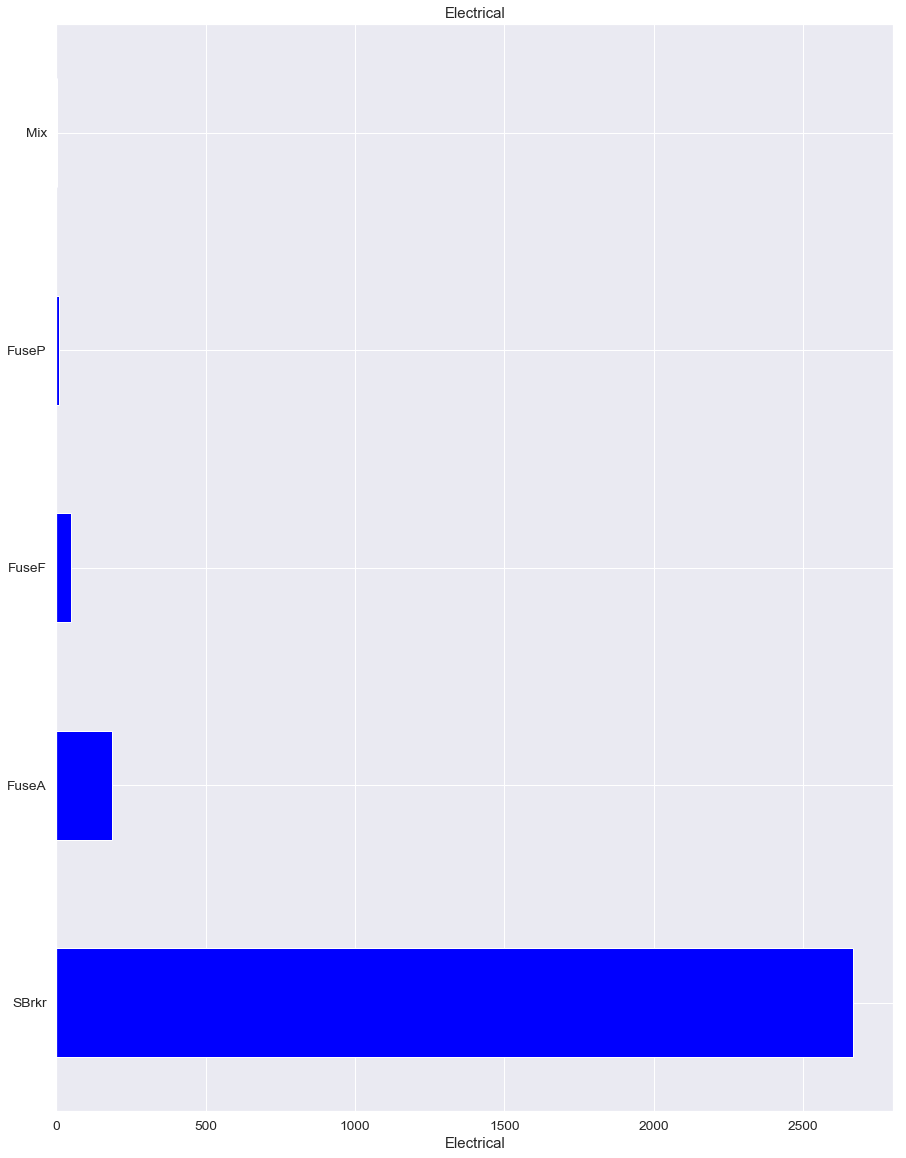

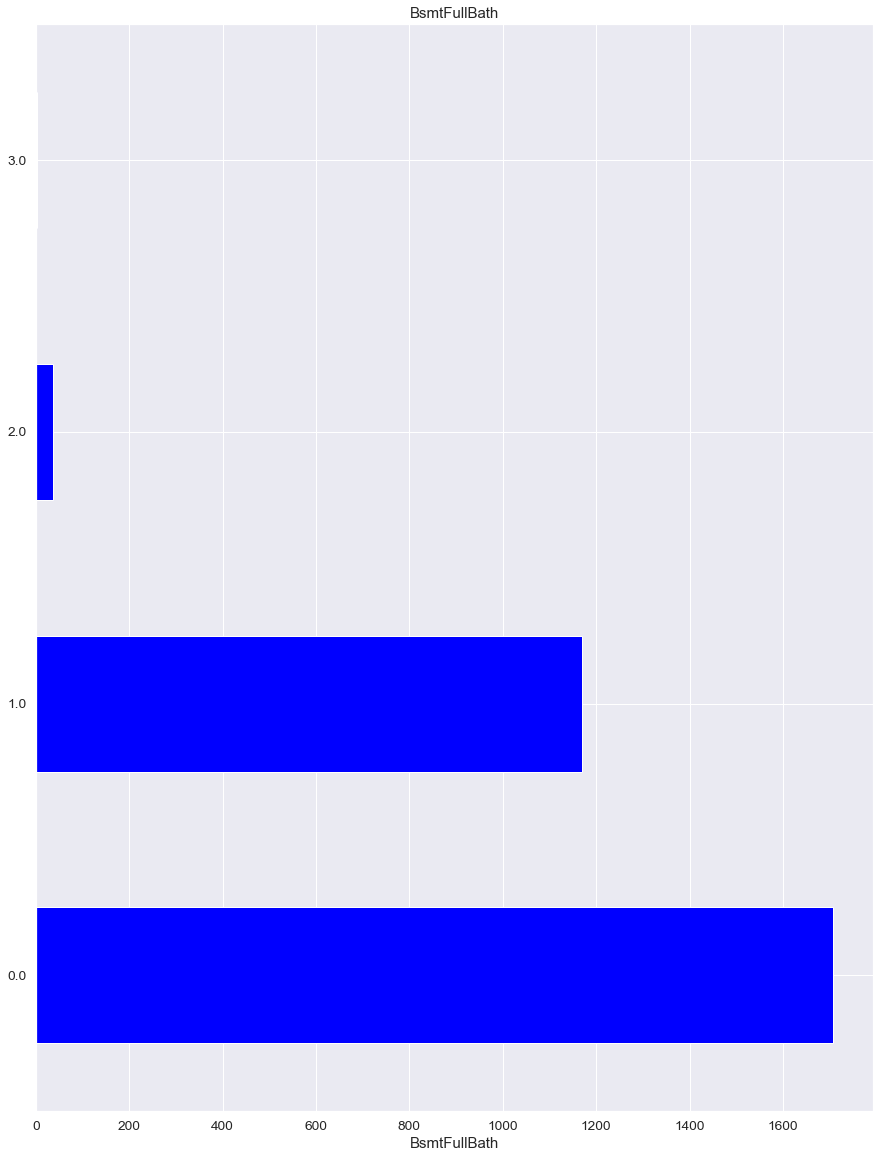

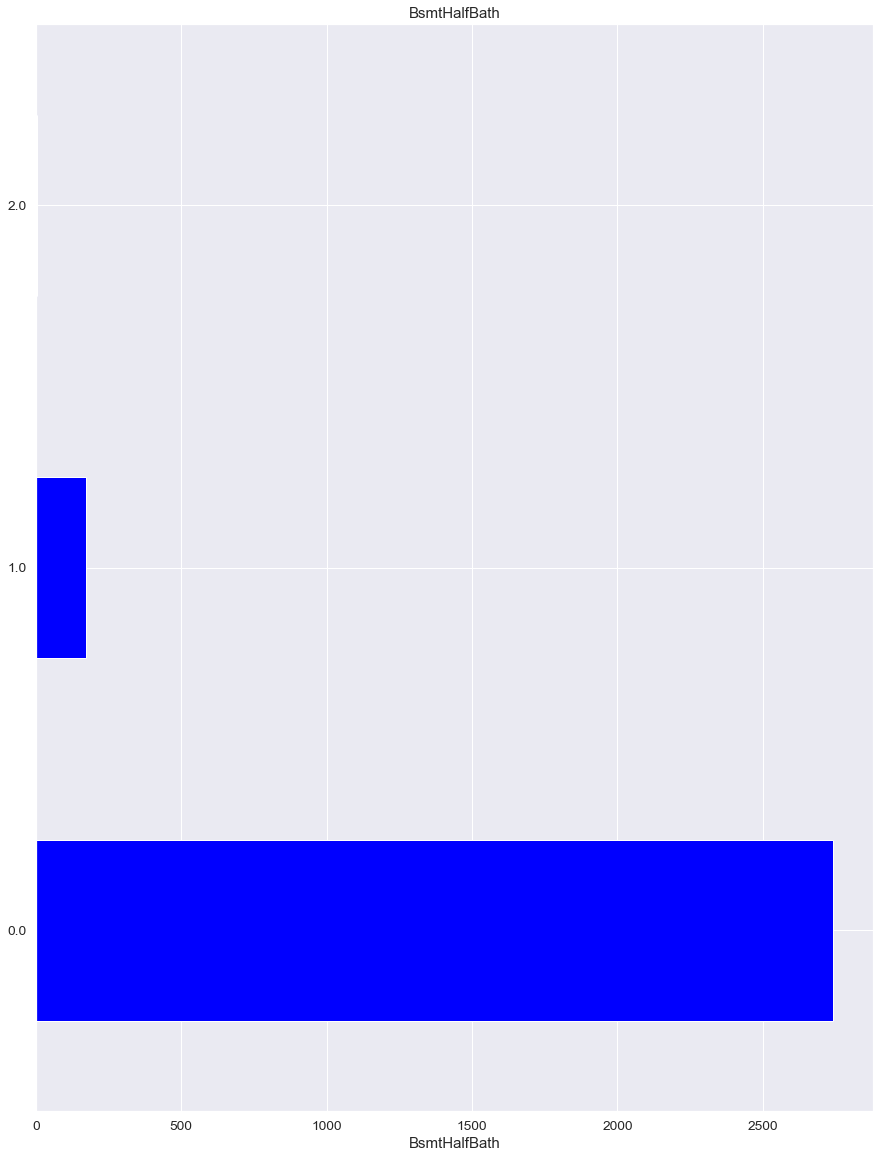

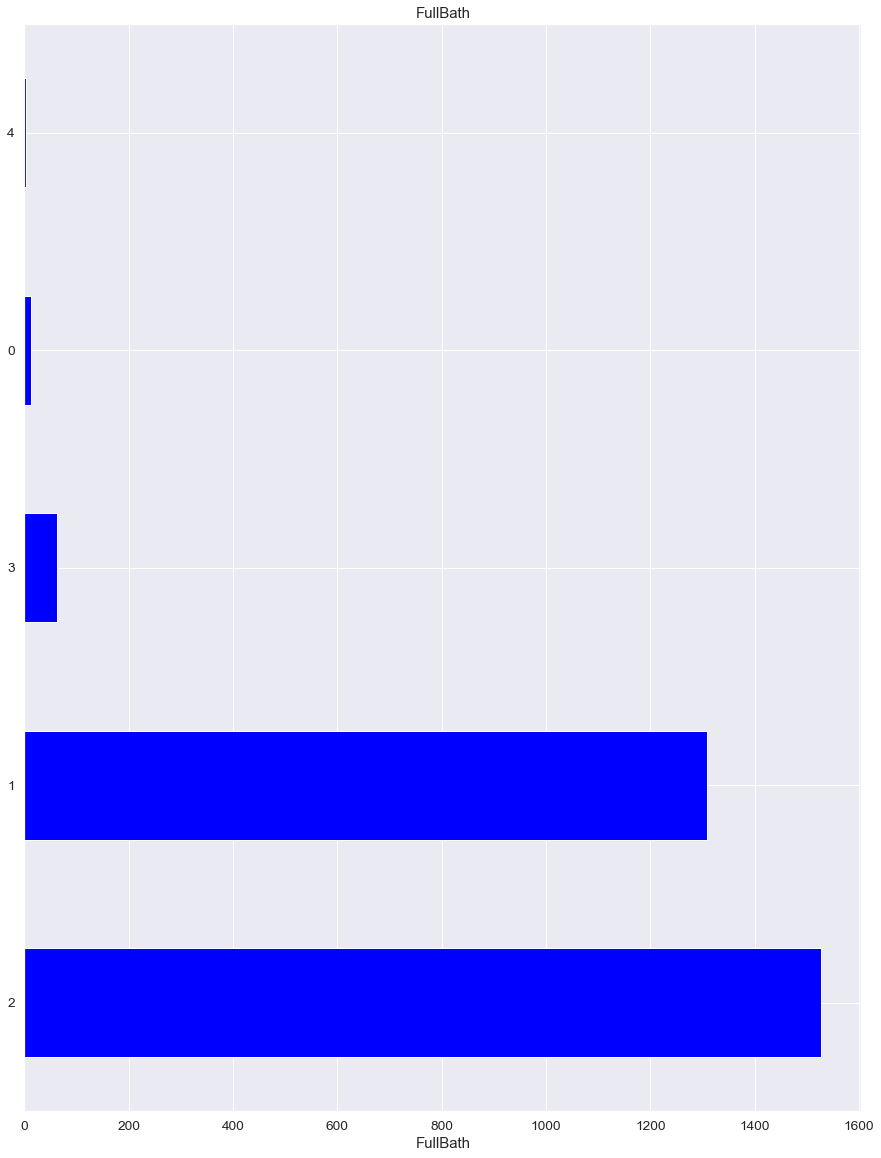

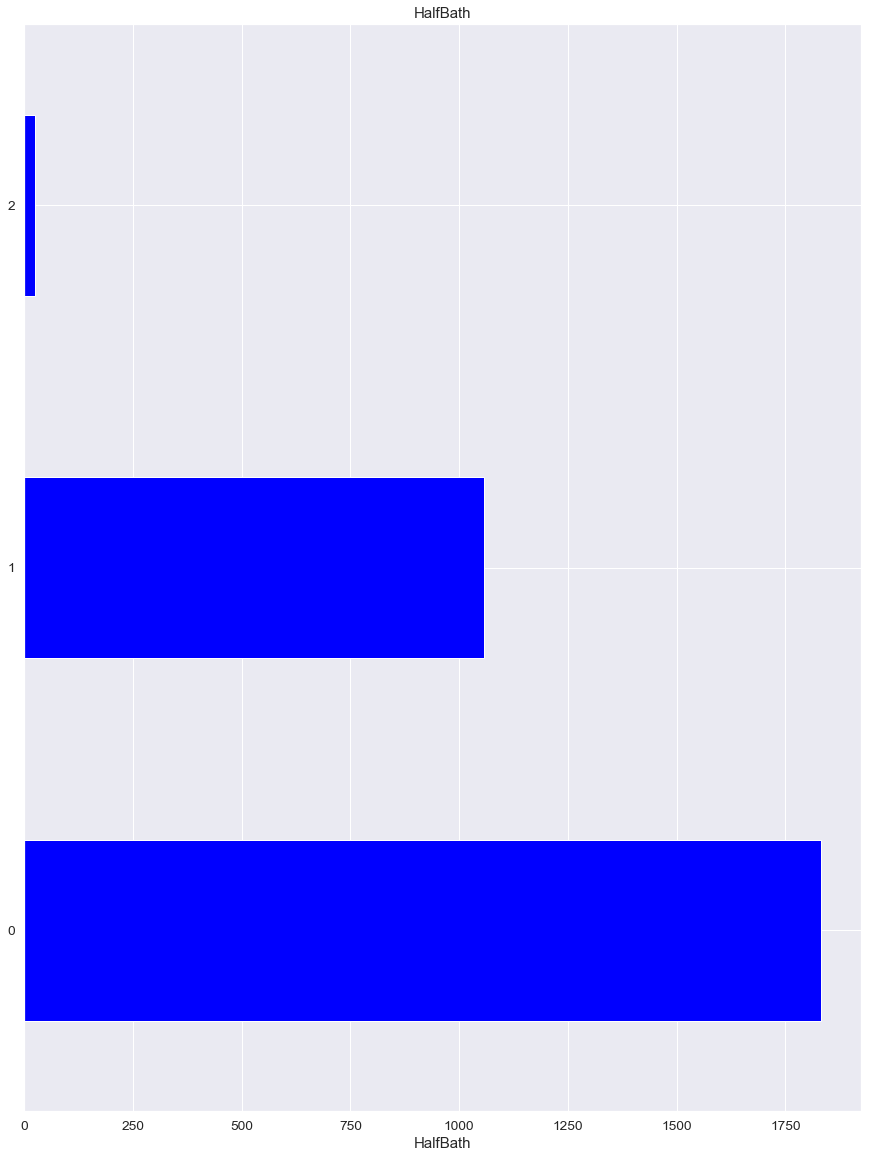

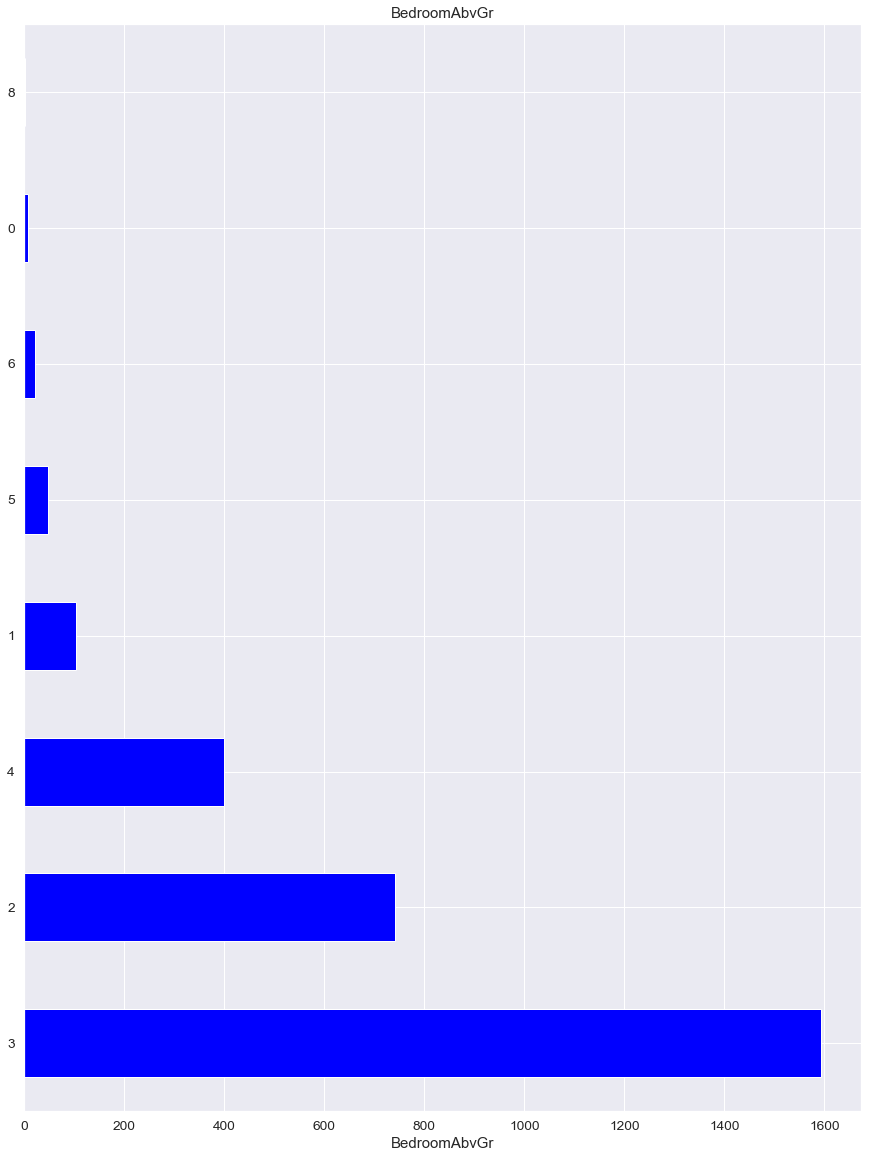

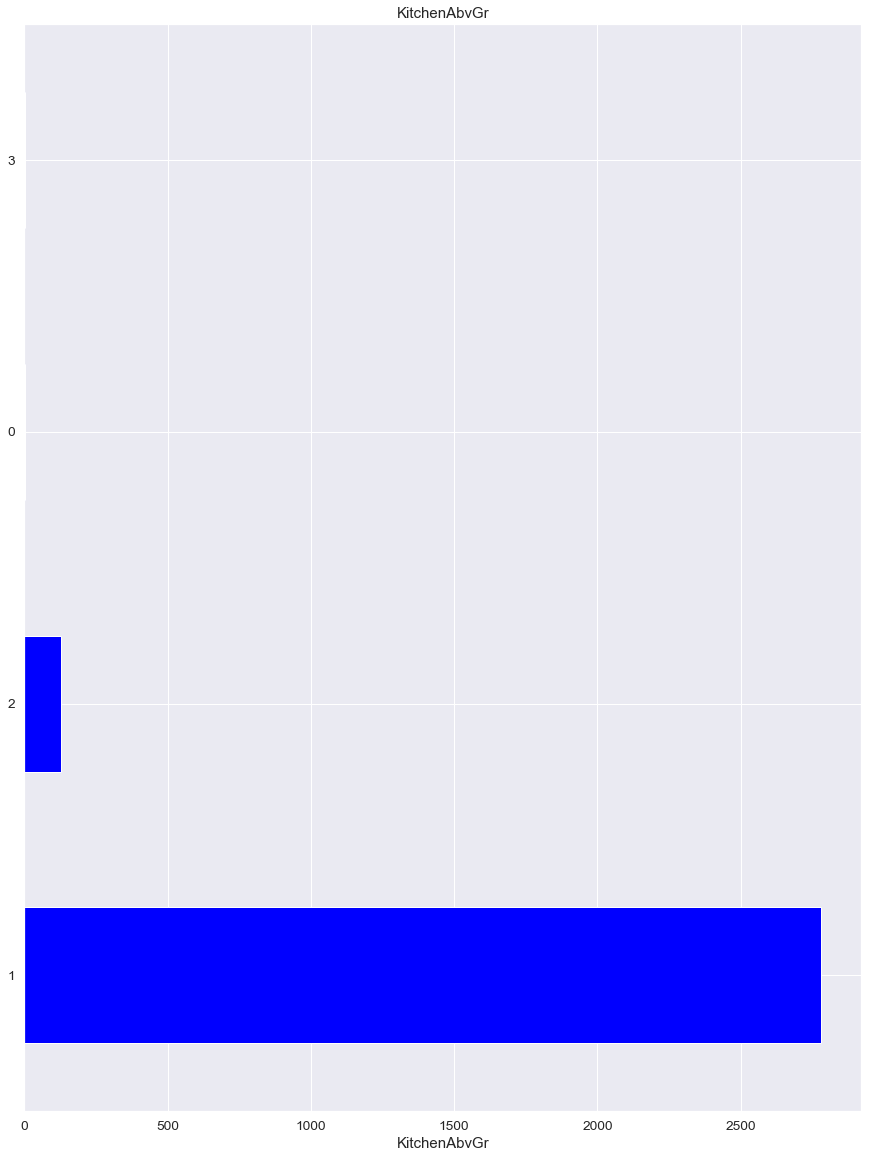

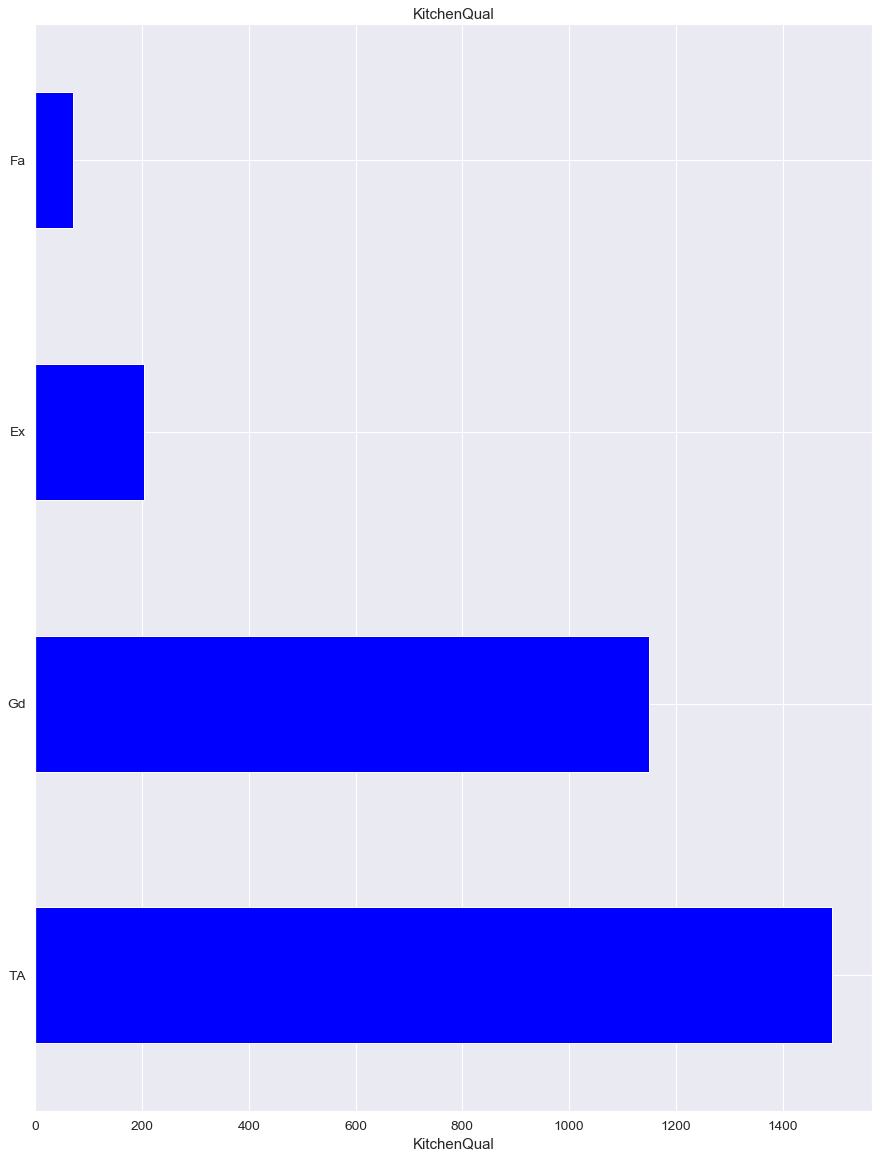

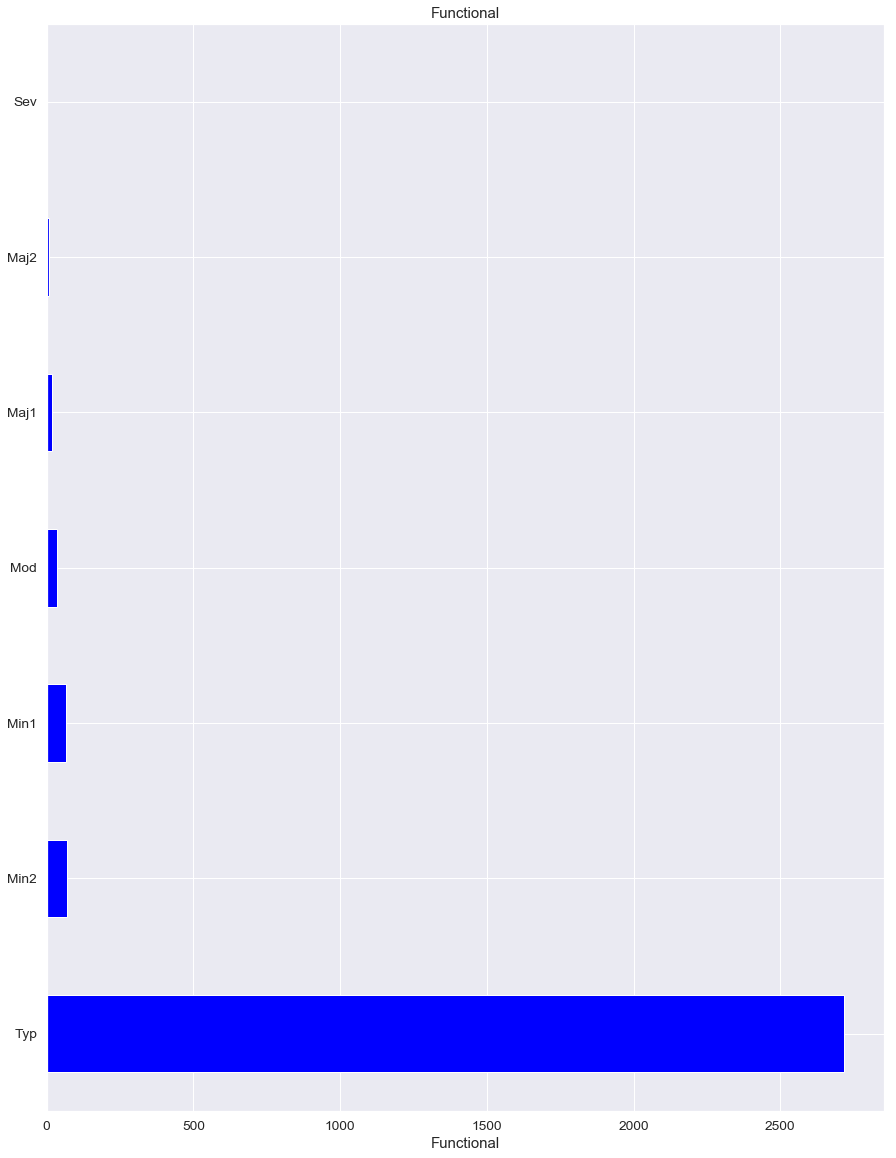

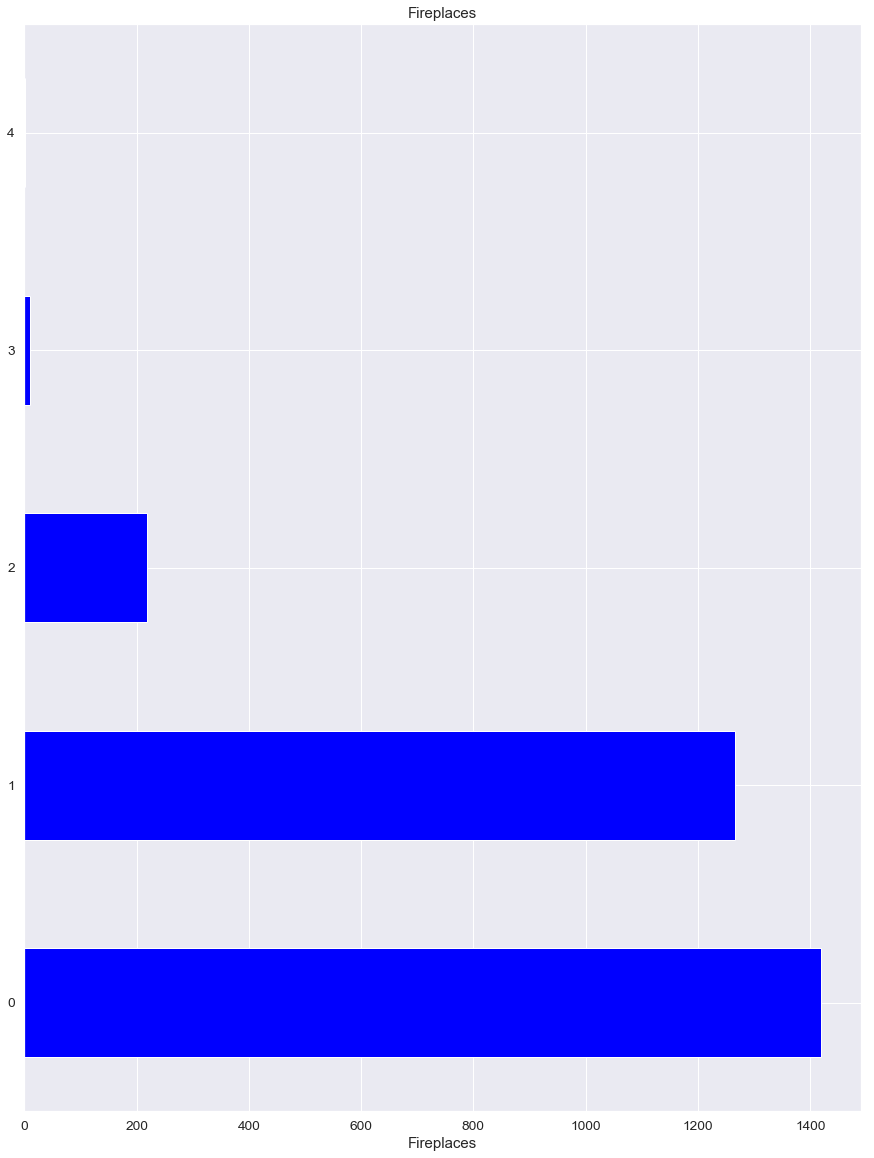

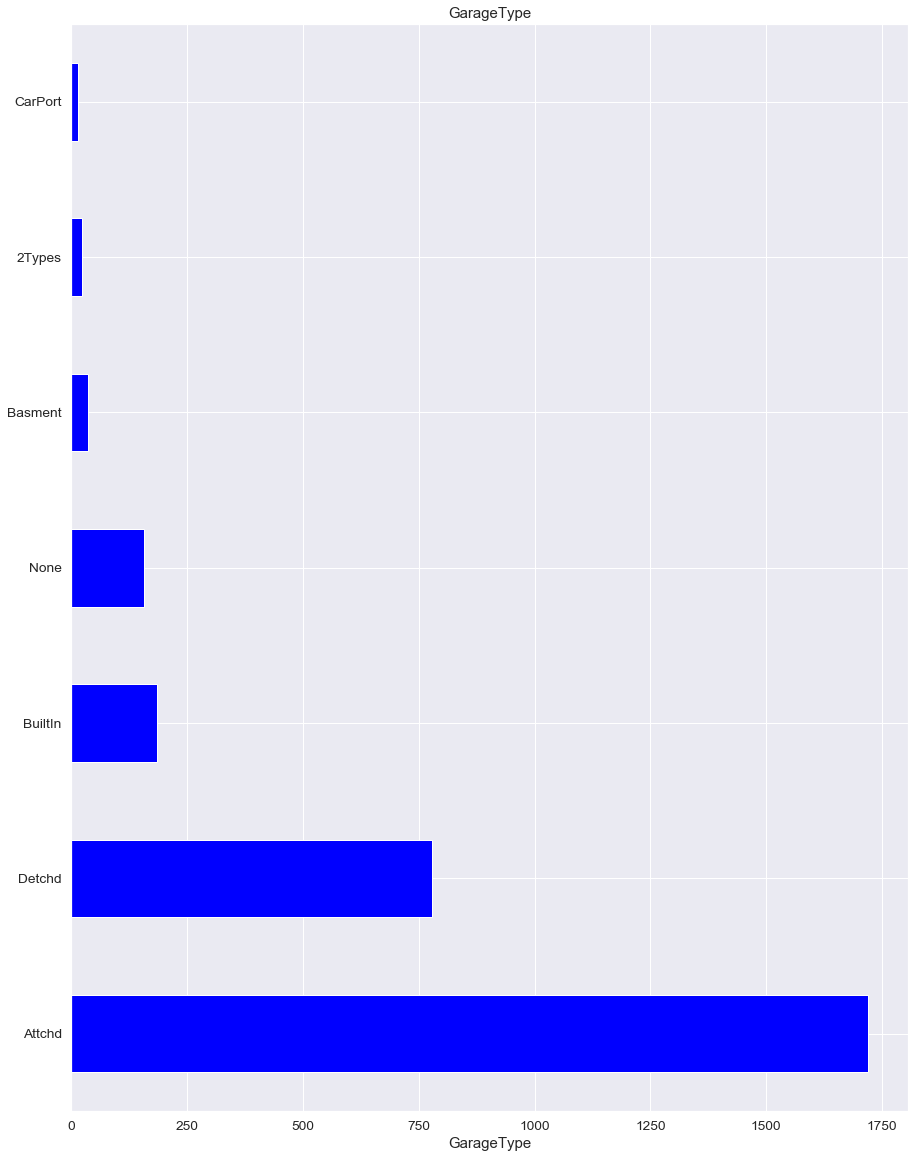

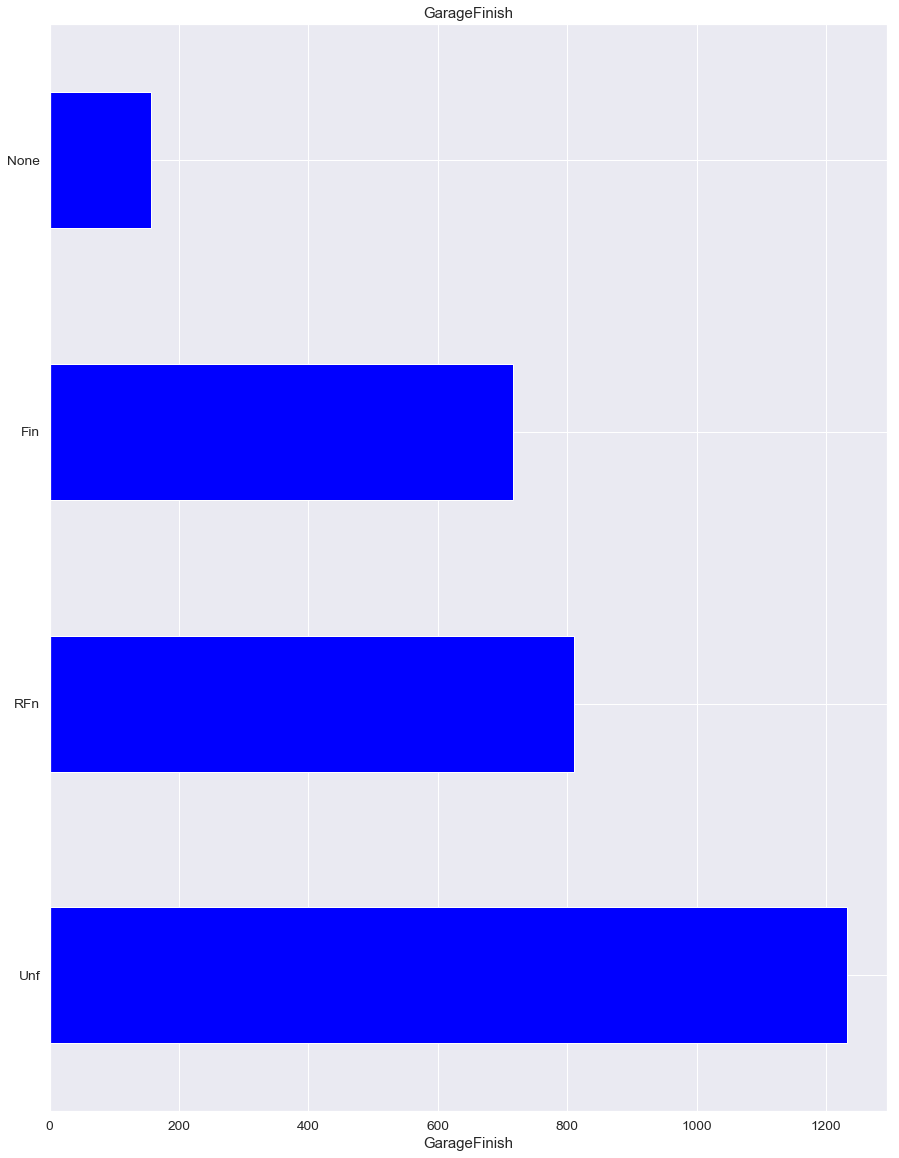

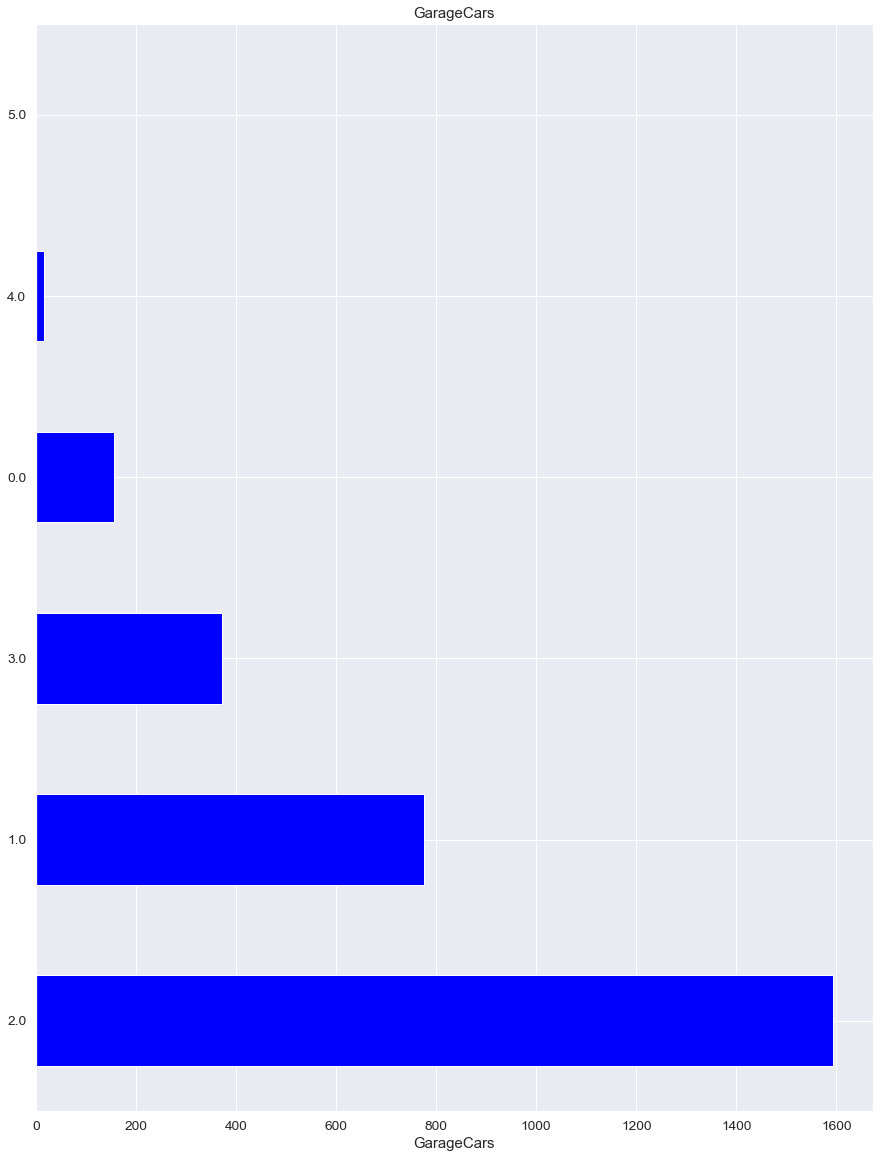

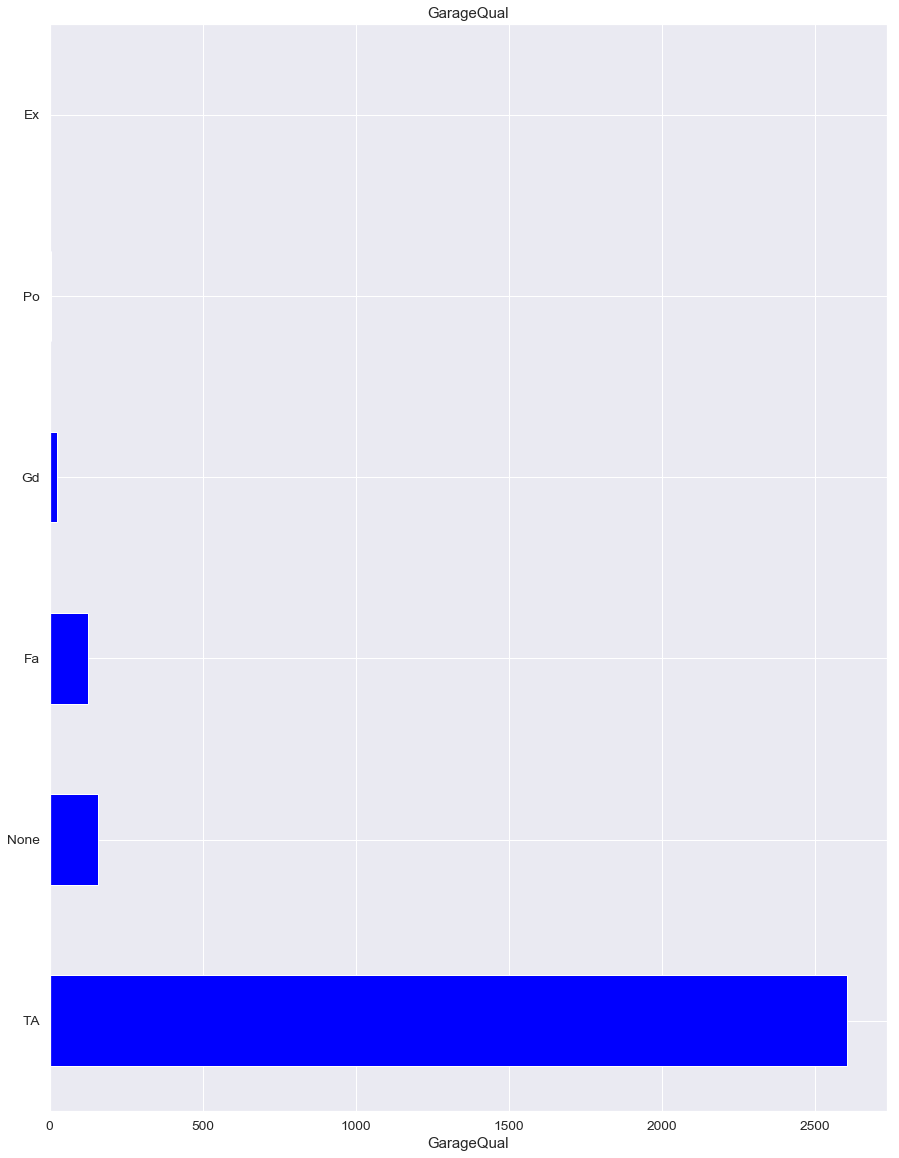

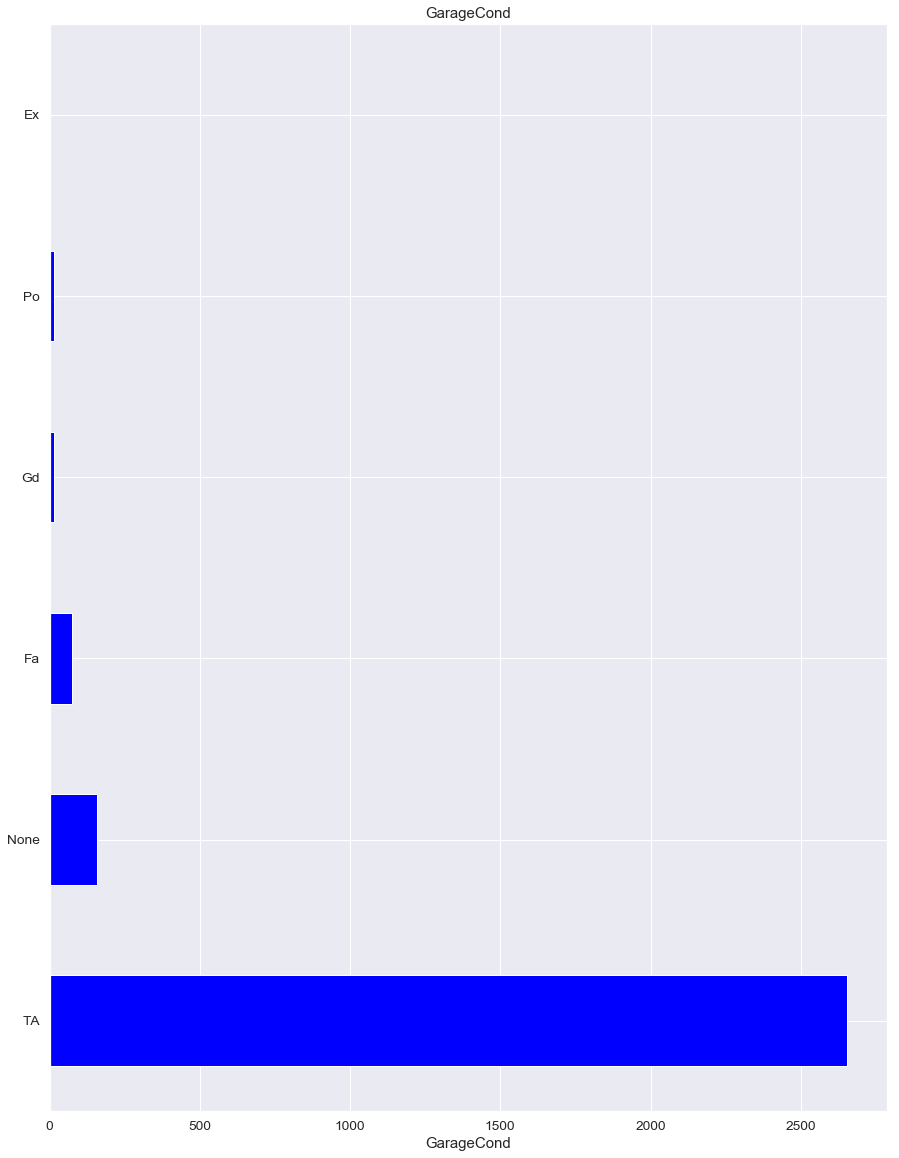

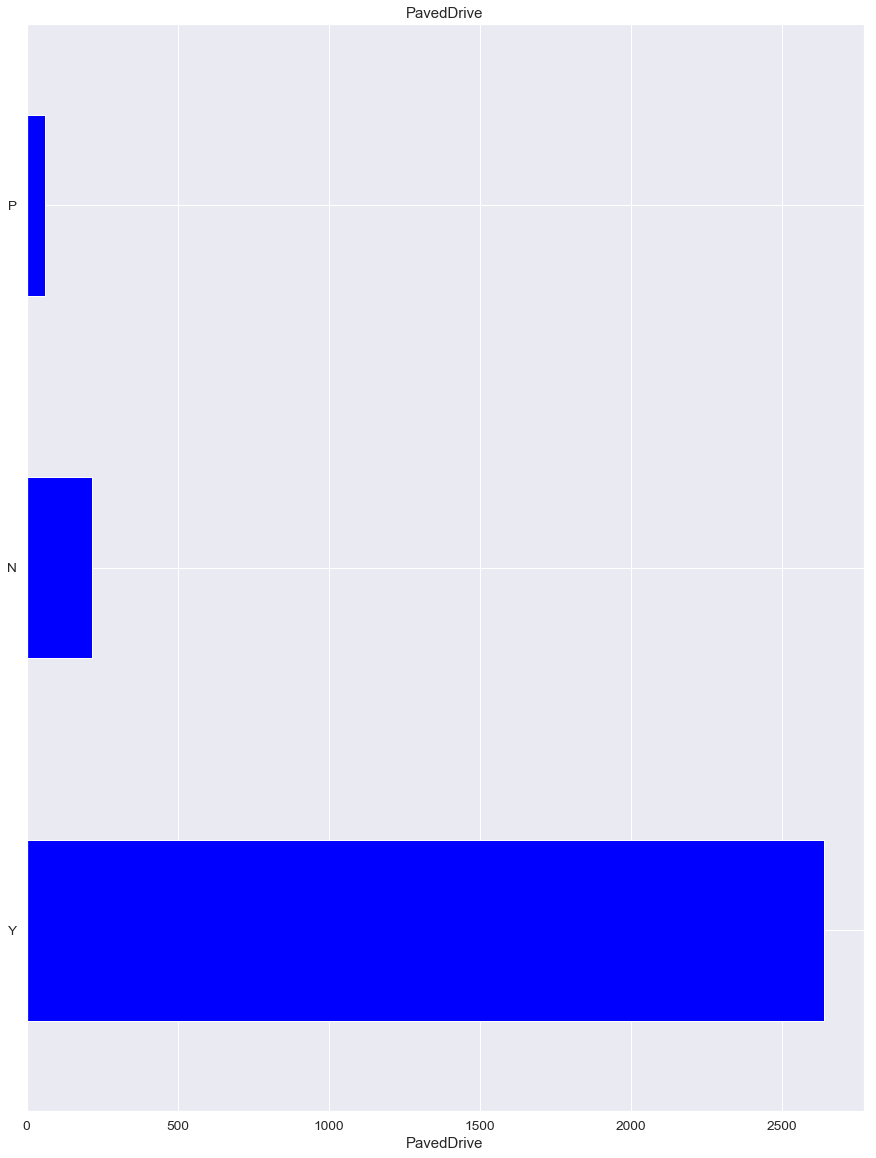

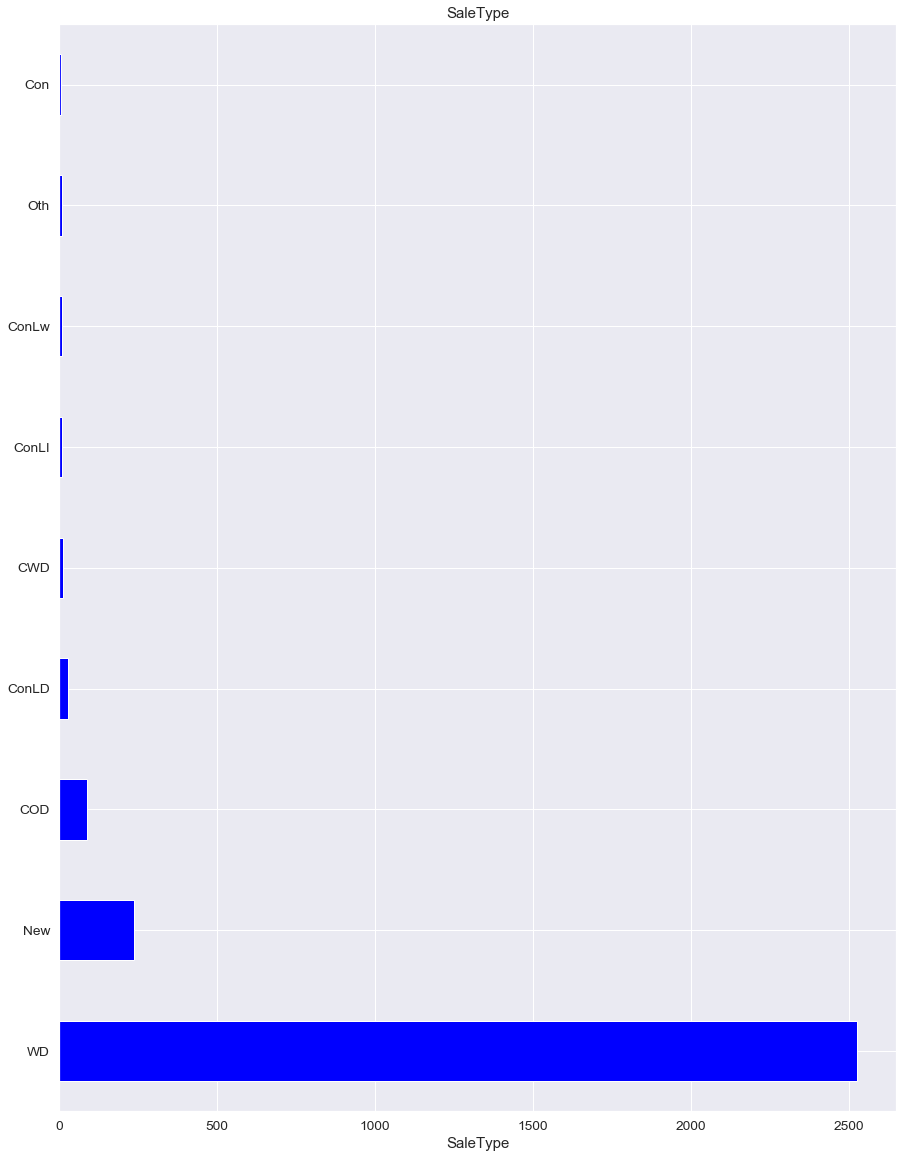

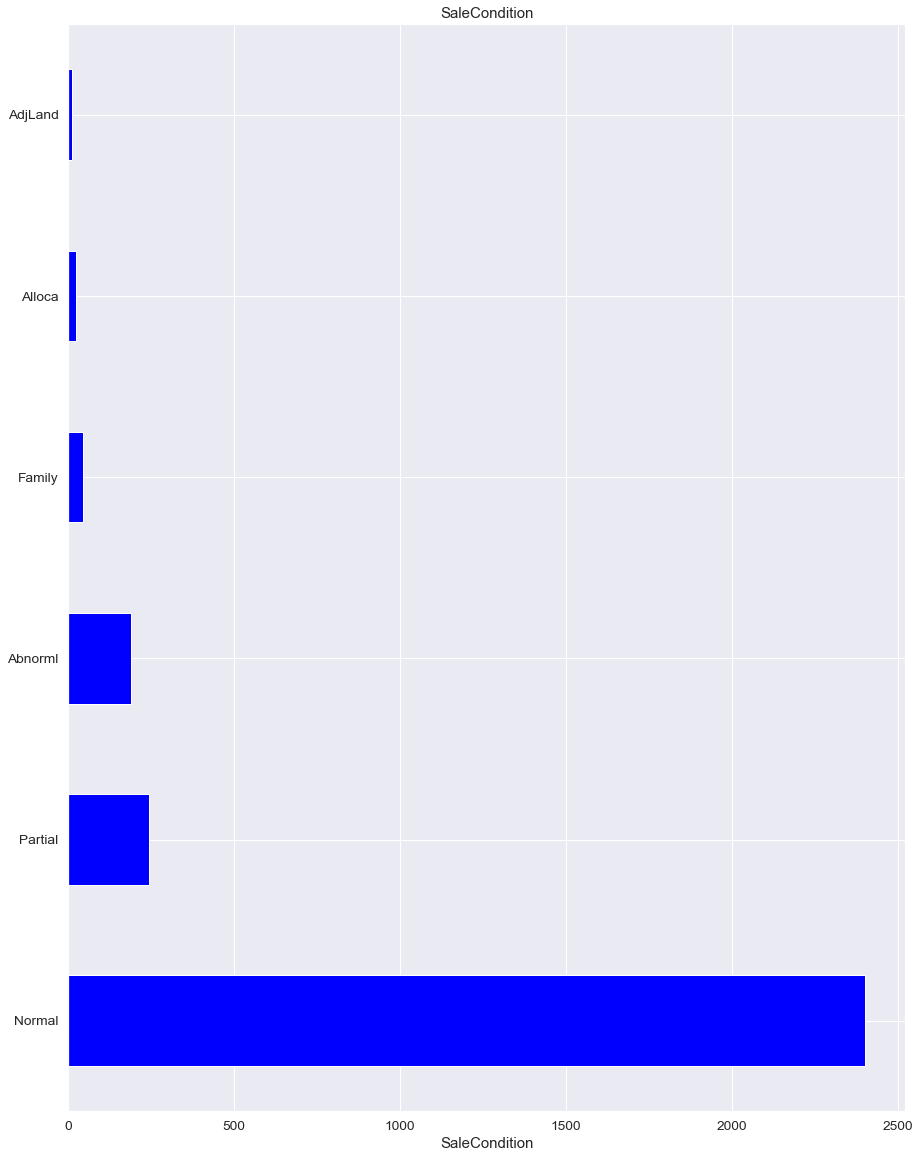

In [36]:
cat_cols = all_data.select_dtypes(include='object').columns
plot_bars(all_data, cat_cols)

**Note** that there's some features have very low variation, it won't be helpful for the model to learn from so we will drop them. 

In [37]:
all_data.drop(['MSZoning', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2',
               'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir',
               'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual',
               'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'LandContour',
               'OverallCond', 'RoofStyle', 'ExterCond',], axis=1, inplace=True)

we will use box plots to explore the relation between categorical features and SalePrice, first we will make some categories names more readable.

In [38]:
MSSubClass = {
        20 : '1-STORY 1946 & NEWER ALL STYLES',
        30 : '1-STORY 1945 & OLDER',
        40 : '1-STORY W/FINISHED ATTIC ALL AGES',
        45 : '1-1/2 STORY - UNFINISHED ALL AGES',
        50 : '1-1/2 STORY FINISHED ALL AGES',
        60 : '2-STORY 1946 & NEWER',
        70 : '2-STORY 1945 & OLDER',
        75 : '2-1/2 STORY ALL AGES',
        80 : 'SPLIT OR MULTI-LEVEL',
        85 : 'SPLIT FOYER',
        90 : 'DUPLEX - ALL STYLES AND AGES',
       120 : '1-STORY PUD - 1946 & NEWER',
       150 : '1-1/2 STORY PUD - ALL AGES',
       160 : '2-STORY PUD - 1946 & NEWER',
       180 : 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190 : '2 FAMILY CONVERSION - ALL STYLES AND AGES'

}

BsmtFinType = {
    'GLQ' : 'Good Living QTRs',
    'ALQ' : 'Average Living QTRs',
    'BLQ' : 'Below Ave Living QTRs',
    'Rec' : 'Ave Rec Room',
    'LwQ' : 'Low Quality',
    'Unf' : 'Unfinshed',
     'None' : 'No Basement'
}

MasVnrType = {
     'BrkCmn' : 'Brick Common',
    'BrkFace' : 'Brick Face',
     'CBlock' : 'Cinder Block',
       'None' : 'None',
      'Stone' : 'Stone'
}

Foundation = {
  'BrkTil' : 'Brick&Tile',
  'CBlock' : 'Cinder Block',
   'PConc' : 'Poured Contrete',
    'Slab' : 'Slab',
   'Stone' : 'Stone',
    'Wood' : 'Wood'
}
       
qual = {
    10 : 'V-Excellent',
     9 : 'Excellent',
     8 : 'V-Good',
     7 : 'Good',
     6 : 'Above Average',
     5 : 'Average',
     4 : 'Below Average',
     3 : 'Fair',
     2 : 'Poor',
     1 : 'Very Poor'
}
GarageFinish = {
    'Fin': 'Finished',
   'RFn' : 'Rough Finished', 
   'Unf' : 'Unfinished',
    'None' : 'No Garage'
}

LotShape = {
    'Reg' : 'Regular',
    'IR1' : 'Slightly irregular',
    'IR2' : 'Moderately Irregular',
    'IR3' : 'Irregular',
}

all_data['LotShape'] = [LotShape[x] for x in all_data['LotShape']]
all_data['GarageFinish'] = [GarageFinish[x] for x in all_data['GarageFinish']]
all_data['OverallQual'] = [qual[x] for x in all_data['OverallQual']]
all_data['Foundation'] = [Foundation[x] for x in all_data['Foundation']]       
all_data['MasVnrType'] = [MasVnrType[x] for x in all_data['MasVnrType']]      
all_data['BsmtFinType1'] = [BsmtFinType[x] for x in all_data['BsmtFinType1']]
all_data['MSSubClass'] = [MSSubClass[x] for x in all_data['MSSubClass']]

In [39]:
def plot_box(dataset, cols, y_col='SalePrice'):
    for col in cols:
        plt.figure(figsize=(10,7))
        sns.set_style('whitegrid')
        sns.boxplot(col, y_col, data=dataset.sort_values(by=y_col))
        plt.xlabel(col)
        plt.ylabel(y_col)
        plt.xticks(rotation=90)
        plt.show()

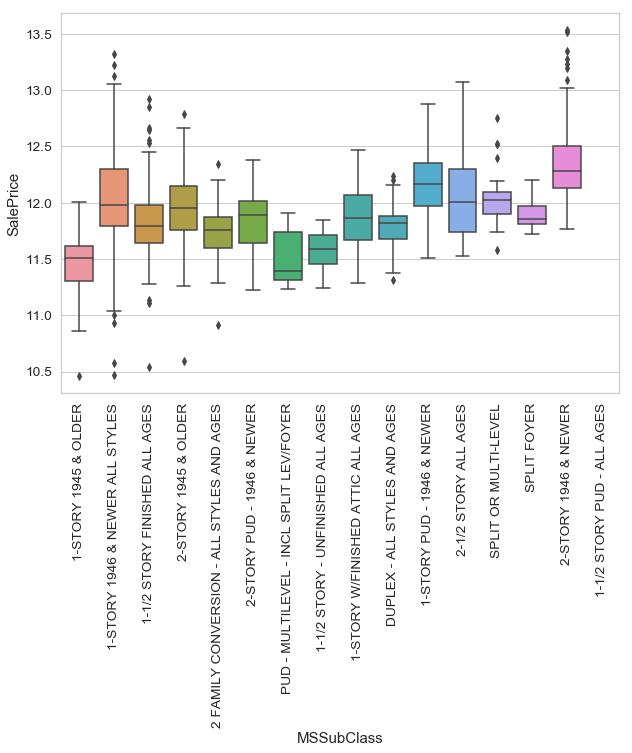

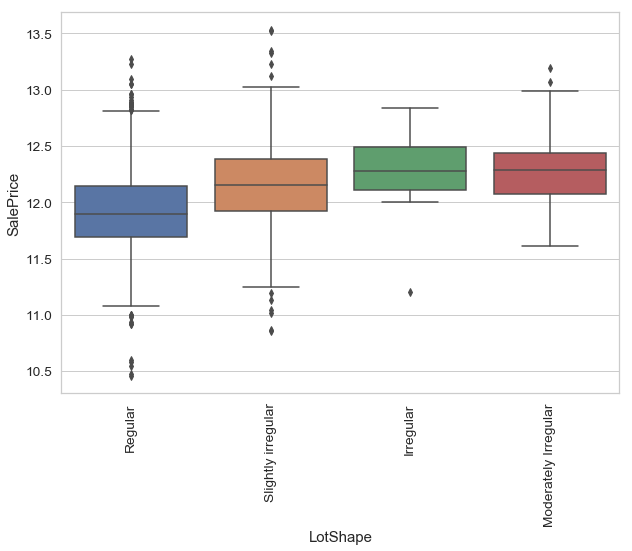

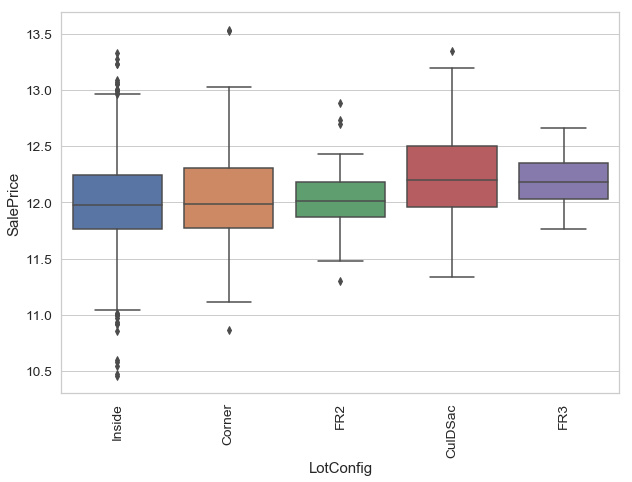

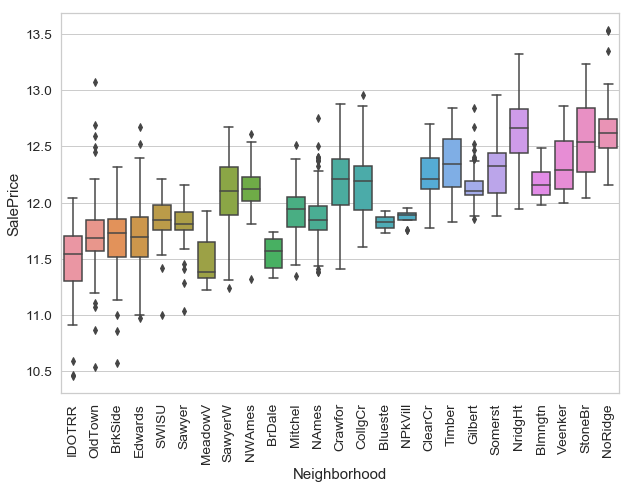

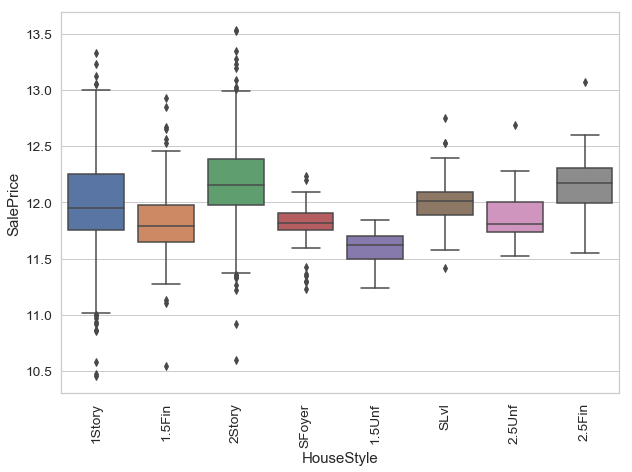

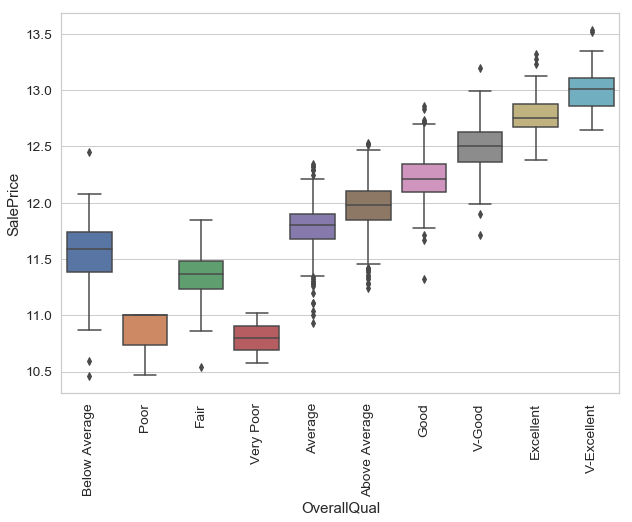

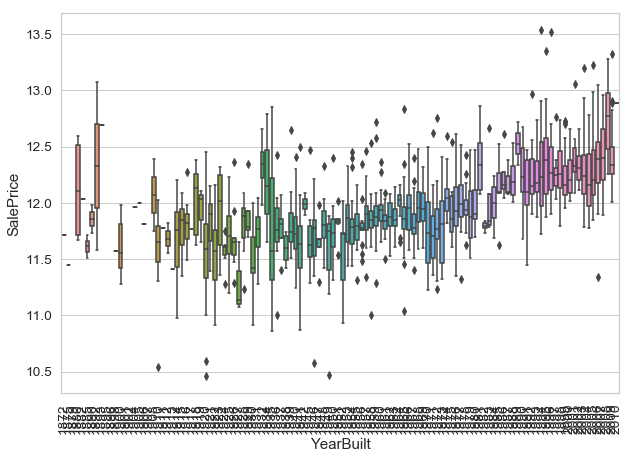

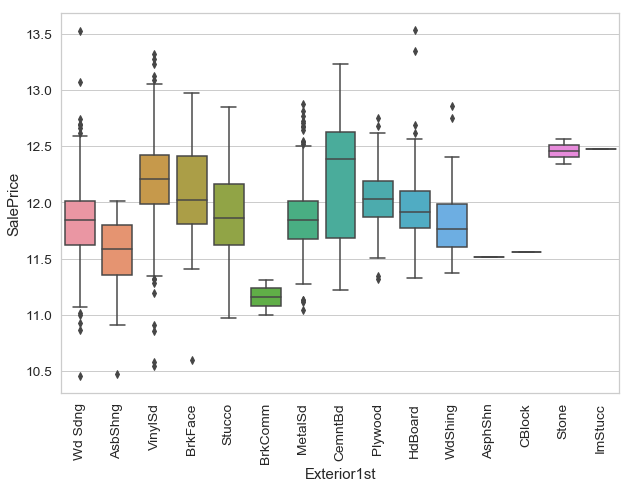

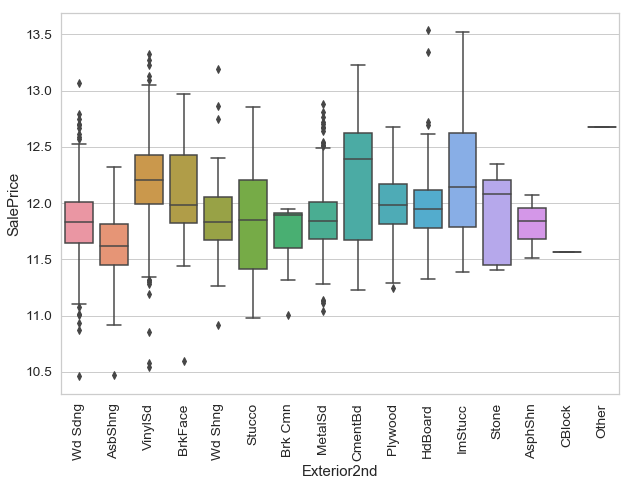

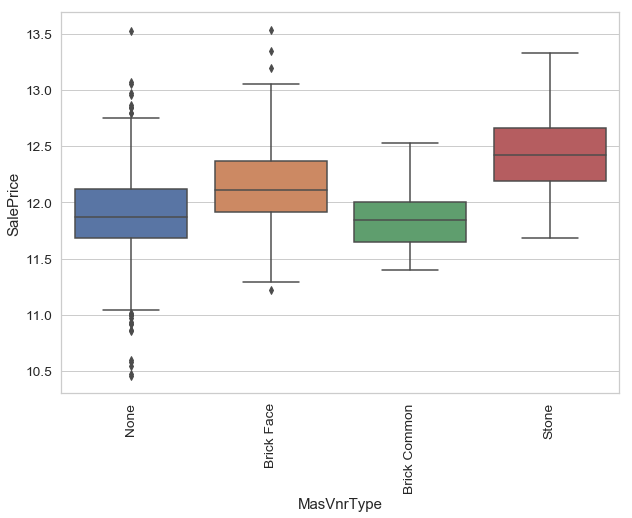

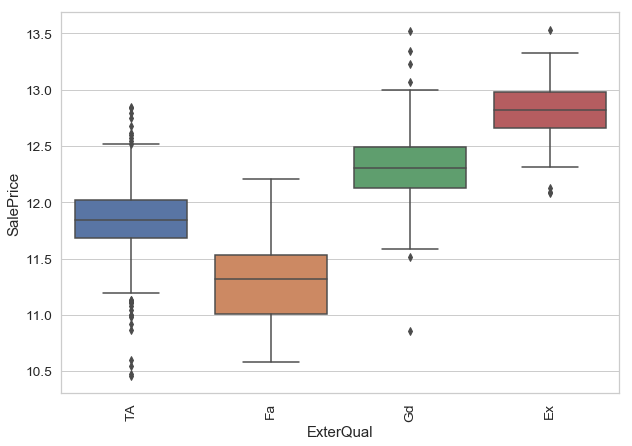

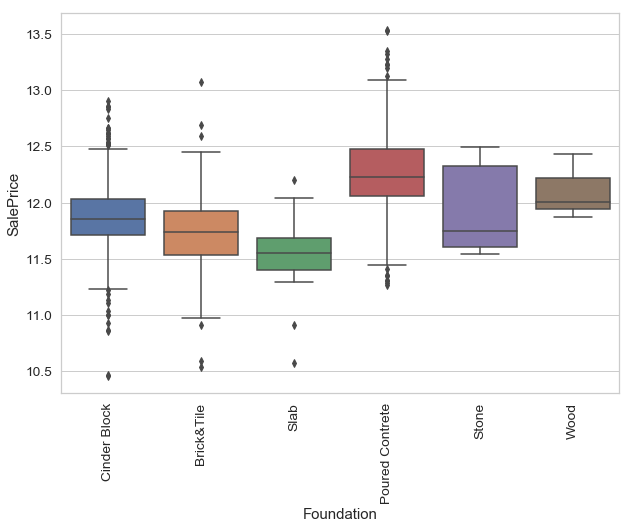

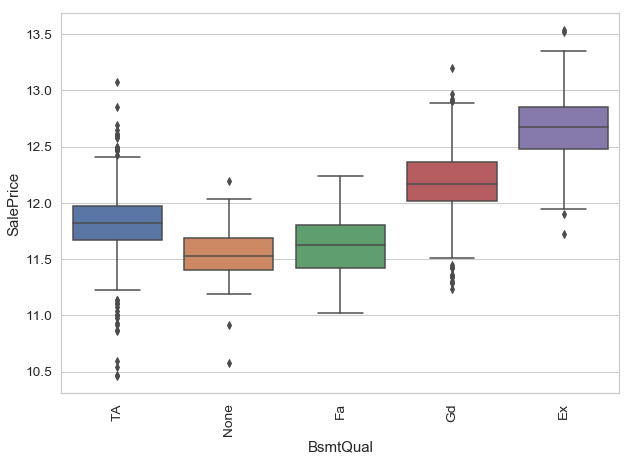

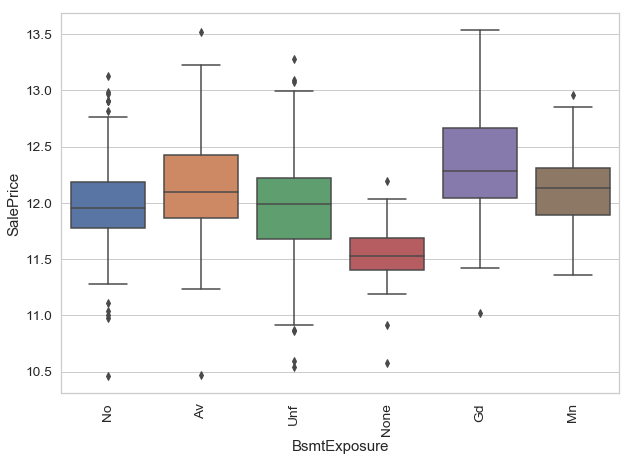

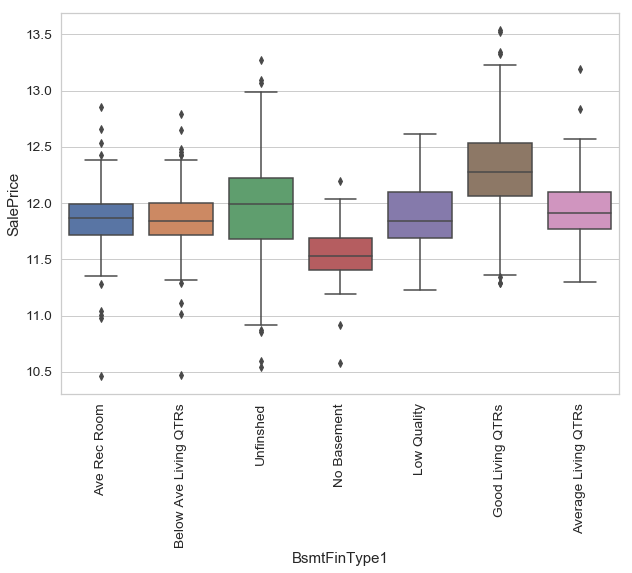

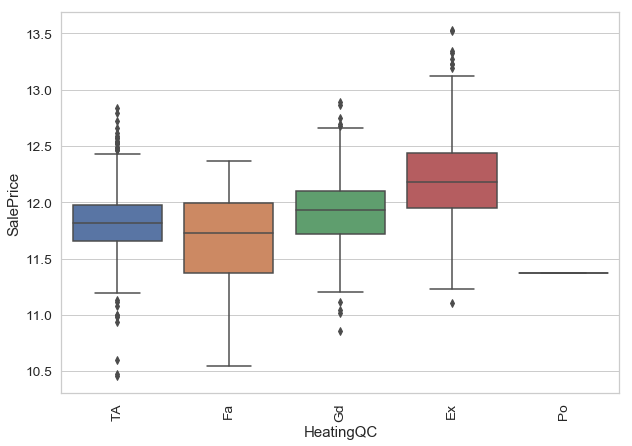

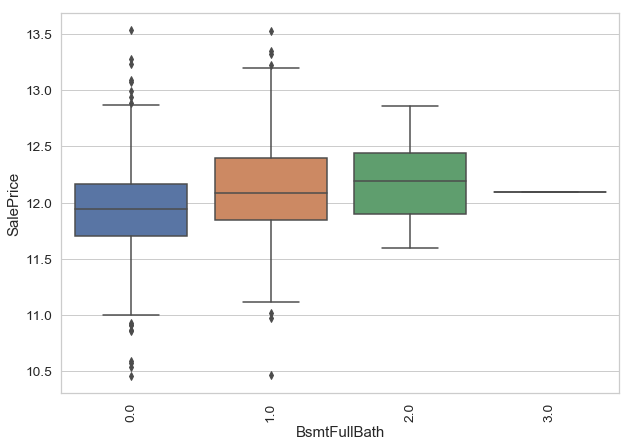

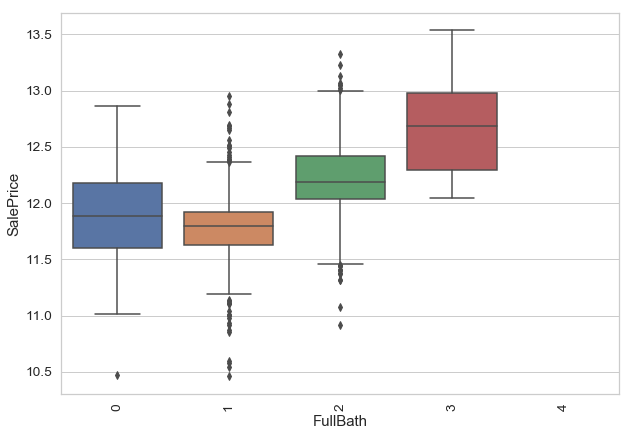

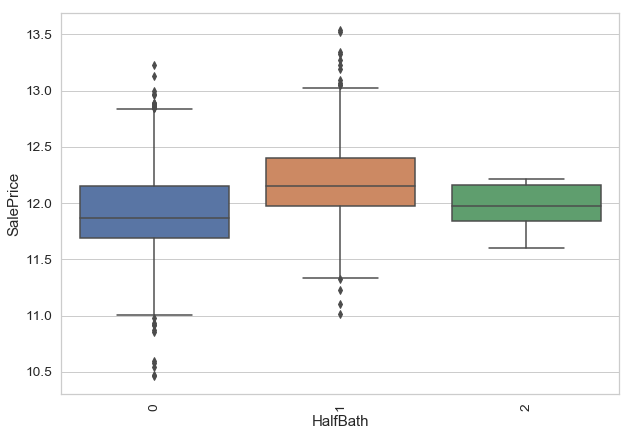

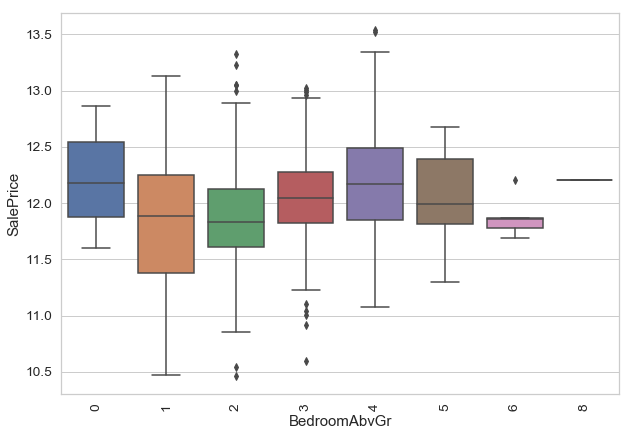

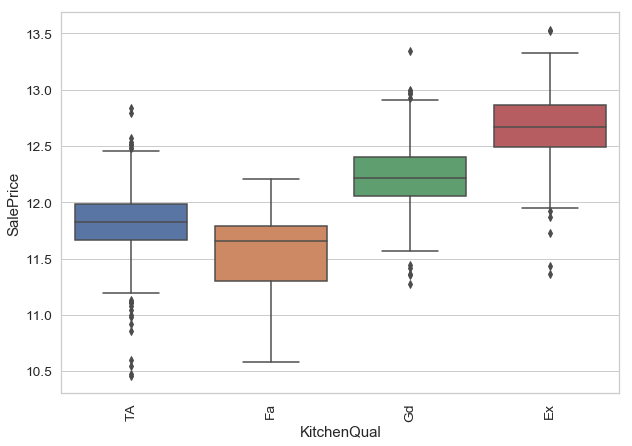

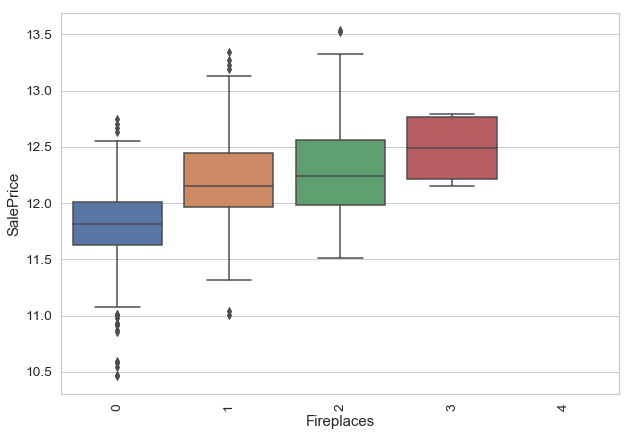

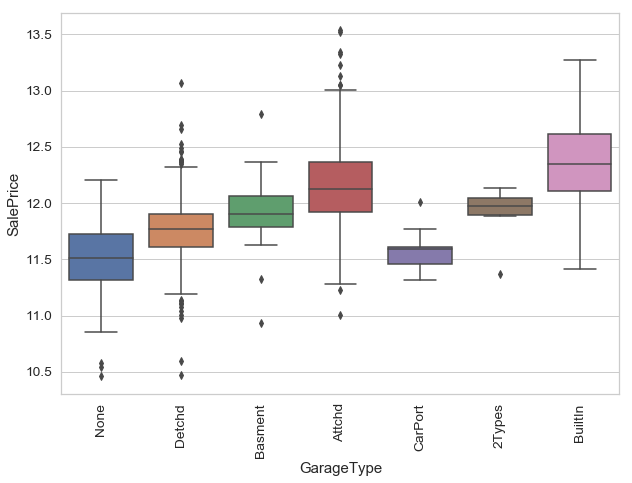

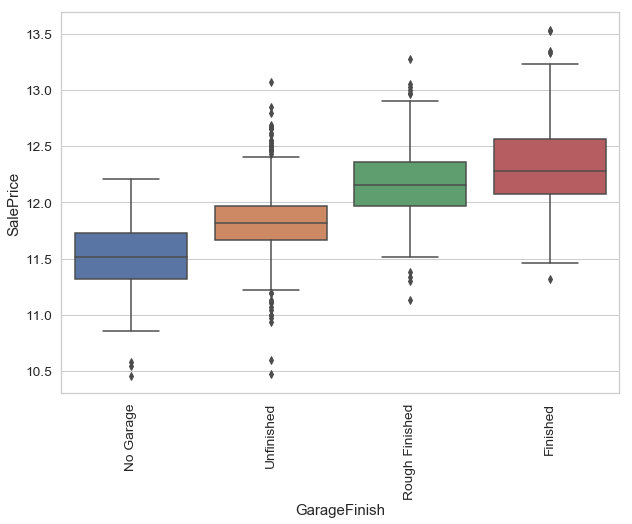

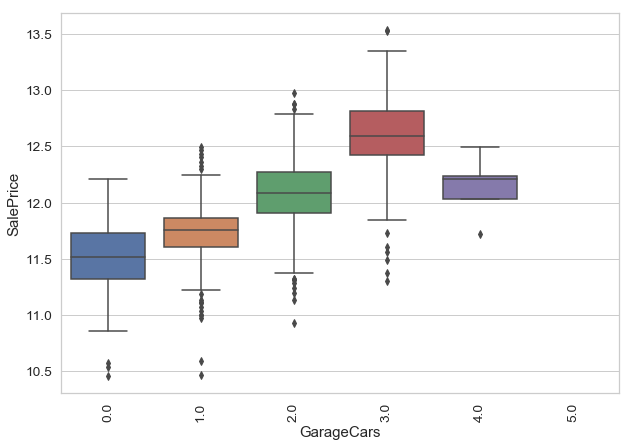

In [40]:
cat_cols = all_data.select_dtypes(include='object').columns
plot_box(all_data, cat_cols)

we will drop columns with same *SalePrice* range for most categories and will apply some categories aggregation. 

In [41]:
all_data.drop(['BedroomAbvGr', 'BsmtFullBath', 'BsmtFinType1', 'BsmtExposure', 'Exterior1st',
               'Exterior2nd', 'LotConfig', 'FullBath'], axis=1, inplace=True)

In [42]:
lotshape = {'Regular' : 'Regular', 'Slightly irregular': 'Irregular', 'Moderately Irregular': 'Irregular',
            'Irregular': 'Irregular'}

all_data['LotShape'] = [lotshape[x] for x in all_data['LotShape']]


In [43]:
overallqual = {
    'V-Excellent' : 'V-Excellent',
    'Excellent' : 'Excellent',
    'V-Good' : 'V-Good',
    'Good' : 'Good',
    'Above Average' : 'Above Average',
    'Average' : 'Average',
    'Below Average' : 'Fair',
    'Fair' : 'Fair',
    'Poor' : 'poor',
    'Very Poor' : 'poor'
}

all_data['OverallQual'] = [overallqual[x] for x in all_data['OverallQual']]


In [44]:
foundation = {'Cinder Block' : 'CinderBlock',
              'Brick&Tile' : 'Slab \ Brick&Tile',
              'Poured Contrete' : 'Poured Contrete',
              'Slab' : 'Slab \ Brick&Tile',
              'Stone' : 'Stone \ Wood',
              'Wood' : 'Stone \ Wood'
}

all_data['Foundation'] = [foundation[x] for x in all_data['Foundation']]

In [45]:
bsmtqual = {
    'Ex' : 'Ex',
    'Gd' : 'Gd',
    'TA' : 'TA',
    'Fa' : 'Fa-None',
  'None' : 'Fa-None'
}
       
all_data['BsmtQual'] = [bsmtqual[x] for x in all_data['BsmtQual']]

In [46]:
heatingqc = {
   'Ex' : 'Ex',
   'Gd' : 'Gd',
   'TA' : 'TA - Fa',
   'Fa' : 'TA - Fa',
   'Po' : 'TA - Fa'
}
       
all_data['HeatingQC'] = [heatingqc[x] for x in all_data['HeatingQC']]

In [47]:
garage_cars = {
    0 : '0',
    1 : '1',
    2 : '2',
    3 : '3-4',
    4 : '3-4',
    5 : '3-4'
}

fireplaces = {
     0 : '0',
     1 : '1',
     2 : '2-3',
     3 : '2-3',
     4 : '2-3',
}

all_data['Fireplaces'] = [fireplaces[x] for x in all_data['Fireplaces']]
all_data['GarageCars'] = [garage_cars[x] for x in all_data['GarageCars']]


In [48]:
cat_cols = all_data.select_dtypes(include='object').columns
num_cols = all_data.select_dtypes(exclude='object').columns

print('Dataset have {} features, {} are categorical and {} are numerical'.format(all_data.shape[1]-1,
                                                                               len(cat_cols),
                                                                               len(num_cols)-1))

Dataset have 19 features, 17 are categorical and 2 are numerical


now we will create *dummy variables* from categorical features.

In [49]:
def encode_string(cat_feature):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()

Features = encode_string(all_data['MSSubClass'])

for col in cat_cols[1:]:
    temp = encode_string(all_data[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    


(2916, 221)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 

 add *numerical features* :

In [50]:
Features = np.concatenate([Features, np.array(all_data[num_cols[:-1]])], axis = 1)
Features.shape

(2916, 223)

Scale numerical features:

In [51]:
scaler = preprocessing.MinMaxScaler().fit(Features[:, 221:])
Features[:, 221:] = scaler.transform(Features[:, 221:])


at this point we will split data to labeled data to use in training and evaluating our model, unlabeled data which we need to predict its *SalePrice*.

In [52]:
Labels = np.array(all_data[:1457]['SalePrice'])
train_features = np.array(Features[:1457])
test_features = np.array(Features[1457:])
print(Labels.shape)
print(train_features.shape)
test_features.shape

(1457,)
(1457, 223)


(1459, 223)

# Model 

**First** we will split our training data to train set and test set:

In [53]:
nr.seed(9988)
indx = range(train_features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
X_train = train_features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = train_features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [54]:
X_train.shape

(1165, 223)

For our model we will use regularized linear regression, and will perform regularization using **l1 regularization** or **Lasso**  method, it limits the sum of the absolute values of the model coefficients.

We can compute the l1 norm of the model coefficients as follows:

$$||\beta||^1 = \big( |\beta_1| + |\beta_2| + \ldots + |\beta_n| \big) = \Big( \sum_{i=1}^n |\beta_i| \Big)^1$$

where $|\beta_i|$ is the absolute value of $\beta_i$. 

we will use `Lasso` function from scikit-learn `linear_model`, inside loop we will try different l1 parameters, and evaluate it using root mean square error, will choose l1 with smallest RMSE to use in creating our model.

## Choosing parameters:

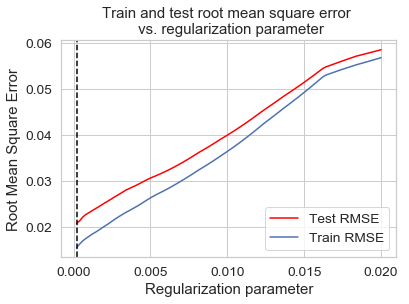

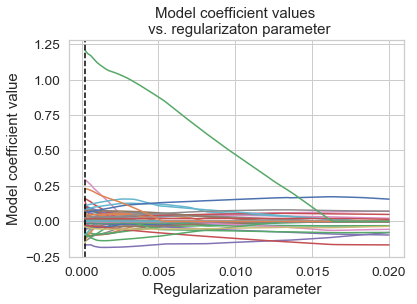

best l1 is 0.0002 , with RMSE = 0.02080535358052044 


In [55]:
def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx, title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l1(x_train, y_train, x_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE
    
l1 = [x/5000 for x in range(1,101)]
out_l1 = test_regularization_l1(X_train, y_train, X_test, y_test, l1)
print('best l1 is {} , with RMSE = {} '.format(out_l1[0], out_l1[1]))

the top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. Notice that there is a minimum where the l1 parameter has a value of 0.0002. 

The bottom plot shows the value of  model coefficients vs. the regularization parameter. we can notice that many of the parameters are being driven to zero as the regularization parameter increases. 

## model evaluation:

In [56]:
model = linear_model.Lasso(alpha = 0.0002)
model.fit(X_train, y_train)
y_score = model.predict(X_test)
print('root mean squared error = {}'.format(sklm.mean_squared_error(y_test, y_score)))

root mean squared error = 0.02080535358052044


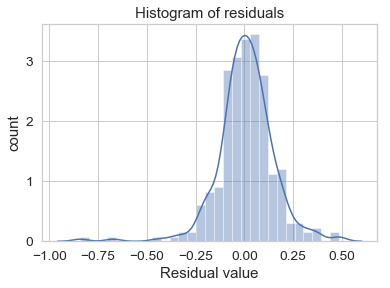

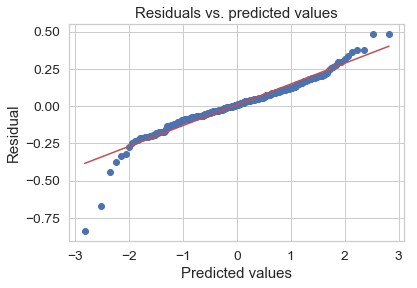

In [57]:
def hist_resids(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()

def resid_qq(y_test, y_score):
    resids = np.subtract(y_test, y_score)
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
    
hist_resids(y_test, y_score)    
resid_qq(y_test, y_score)

we can see that our model fitting reasonably good, though it missed some values, histogram shows the distribution of the residuals is a bit skewed with left tail.

## Making Predictions:

In [58]:
predictions = model.predict(test_features)

**Note** we will need to transform SalePrice values again.

In [59]:
predictions = np.exp(predictions)

## Submission 

In [60]:
submit = pd.read_csv('sample_submission.csv')
submit['SalePrice'] = predictions
submit.head()

,Id,SalePrice
0,1461,113299.250308
1,1462,151895.081532
2,1463,177087.991859
3,1464,181955.665097
4,1465,210707.473459


In [61]:
#submit.to_csv('submition1.csv', index = False, header = True)